# Bottled Gazpacho Market Research

I don't know about you, but I love Gazpacho. In Spain they sell those delicacies bottled in supermarkets. But what about the rest of the world? How sad I am eveytime I go to the supermarket and none of that elixir is available. Here's the wonderful sight that Spaniards take for granted, while everyone else can only dream of:

![gazpacho](./images/spanish_bottled_gazpacho.jpg)

No more! This stops here! Or so I hope. Let's perform some **simulated market research** to find out if there is a market for Gazpacho in the rest of the world.

In [1]:
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.factory import TinyPersonFactory
from tinytroupe.validation import TinyPersonValidator
from tinytroupe import control

from tinytroupe.extraction import ResultsExtractor
from tinytroupe.profiling import Profiler


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: c:\Users\pdasilva\OneDrive - Microsoft\Git repositories\tinytroupe-opensource\TinyTroupe\examples\..\tinytroupe\config.ini
Found custom config on: c:\Users\pdasilva\OneDrive - Microsoft\Git repositories\tinytroupe-opensource\TinyTroupe\examples\config.ini

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2023-05-15
model = gpt-4o-mini
max_tokens = 4000
temperature = 1.5
freq_penalty = 0.3
presence_penalty = 0.0
timeout = 60
max_attempts = 5
waiting_time = 2
exponential_backoff_factor = 5
embedding_model = text-embedding-3-small
cache_api_calls = False
cache_file_name = openai_api_cache.pickle
max_content_display_length = 1024

[Simulation]
rai_harmful_

First of all, we'll use a cached simulation, to avoid having to recompute expensive steps unless really necessary. We accomplish this via the `control.begin()` function. The file it takes as an argument is the cache file that will be created and then updated as needed.

**Tip:** the ".cache." naming convention is used to indicate that the file is a cache file and will not be committed to the repository.

In [ ]:
control.begin("bottled_gazpacho_market_research.cache.json")

## Prepare the survey and auxiliary elements

Main target nationality and population size.

In [ ]:
target_nationality = "American"
population_size = 100

Should we also compute the other nationalities? This might take a while, so we leave it as an option.

In [ ]:
compute_other_nationalities = True

Descriptions and standard questions for the survey.

In [ ]:
def general_context(nationality="American"):
    return  f"""
            We are performing market research, and in that examining the whole of the {nationality} population. Thus we want a **uniform** **random** 
            representative sample of people from this population. We are surveying the market for a new food product, to be sold in supermarkets, 
            so pay special consideration to specify the culinary tastes of people and their shopping habits, which must be as realistic as possible.
            
            The sample must include representative people from the broad population, so for instance ensure that you include people from all walks of life:
              - from the simplest professions to those of the highest ranks;
              - from the youngest to the oldest; 
              - from the kind to the evil;
              - from the happy and joyful to the sad and depressed;
              - from the most conservative, to the most liberal; 
              - from the educated, to the ignorant;
              - from the healthy to the sick;
              - from rich to poor.             
              """

interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please present yourself and also list your top-10 interests?
    """

interviewer_main_question =\
    """ 
    Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or why not? 
    Please be honest, we are not here to judge you, but just to learn from you. 
    We know these choices depend on many factors, but please make your best guess, consider your current 
    situation in life, location, job and interests, and tell us whether you would buy bottled gazpacho 
    or not. To make it easier, start your response with "Yes, ", "No, " or "Maybe, ".
    """

Common mechaniss.

In [ ]:
results_extractor = ResultsExtractor(extraction_objective="Find whether the person would buy the product. A person can say Yes, No or Maybe." ,
                                     situation="Agent was asked to rate their interest in a bottled Gazpacho. They can respond with Yes, No or Maybe.", 
                                     fields=["response", "justification"],
                                     fields_hints={"response": "Must be a string formatted exactly as 'Yes', 'No', 'Maybe' or 'N/A'(if there is no response)."},
                                     verbose=True)

A function that will give us the statistics and then recommend us if we should go ahead and start a Gazpacho business.

In [ ]:
def is_there_a_good_market(df, yes_threshold=0.1, no_threshold=0.5):
    # get the counts for column "response" - values are Yes, No, Maybe or N/A
    counts = df["response"].value_counts()
    # get the total number of responses
    total = counts.sum()

    # get the percentage of each response
    percentage = counts / total

    # get the percentage of "Yes" responses
    percentage_yes = percentage.get("Yes", 0)
    print(f"Percentage of 'Yes' responses: {percentage_yes:.2%}")

    # get the percentage of "No" responses
    percentage_no = percentage.get("No", 0)
    print(f"Percentage of 'No' responses: {percentage_no:.2%}")

    # get the percentage of "Maybe" responses
    percentage_maybe = percentage.get("Maybe", 0)
    print(f"Percentage of 'Maybe' responses: {percentage_maybe:.2%}")

    # get the percentage of "N/A" responses
    percentage_na = percentage.get("N/A", 0)
    print(f"Percentage of 'N/A' responses: {percentage_na:.2%}")

    # some reasonable logic to determine whether to invest or not
    if percentage_yes > yes_threshold and percentage_no < no_threshold:
        print("VERDICT: There is a good market for bottled gazpacho.")
        return True
    else:
        print("VERDICT: There is not a good market for bottled gazpacho.")
        return False



## Build the audience

Summon an audience out of thin simulated air. To do so, we build a factory whose context defines our problem and target audience. Actual agents will be later sampled from this factory.

In [ ]:
factory = TinyPersonFactory(general_context(target_nationality))

We can request a specific number of people.

In [ ]:
people = factory.generate_people(population_size, verbose=True)

Generated person 1/100: Marcus Thompson is a 29 year old Warehouse Worker, American, currently living in United States. Marcus Thompson is not only a dedicated warehouse worker but also a friendly and approachable individual who values his relationships. He enjoys unwinding with friends at a local bar after work, where he often shares his passion for basketball and video games. With a laid-back attitude, he embraces life's challenges with optimism, always seeking the silver lining. On weekends, he indulges in his love for cooking by experimenting with new recipes, while also nurturing his interest in logistics and supply chain management as he looks toward future career advancement.
Generated person 2/100: Linda Carter is a 52 year old Nurse, American, currently living in United States. Linda Carter is not only dedicated to her nursing career but also embodies a compassionate and empathetic spirit that extends beyond her professional life. She finds joy in gardening, which serves as a 

A quick look into the folks that were created:

In [ ]:
factory.generated_minibios

["Marcus Thompson is a 29 year old Warehouse Worker, American, currently living in United States. Marcus Thompson is not only a dedicated warehouse worker but also a friendly and approachable individual who values his relationships. He enjoys unwinding with friends at a local bar after work, where he often shares his passion for basketball and video games. With a laid-back attitude, he embraces life's challenges with optimism, always seeking the silver lining. On weekends, he indulges in his love for cooking by experimenting with new recipes, while also nurturing his interest in logistics and supply chain management as he looks toward future career advancement.",
 'Linda Carter is a 52 year old Nurse, American, currently living in United States. Linda Carter is not only dedicated to her nursing career but also embodies a compassionate and empathetic spirit that extends beyond her professional life. She finds joy in gardening, which serves as a therapeutic escape from the high-stress en

Checkpoint the simulation state to disk, to avoid having to re-run the expensive agent sampling process, unless really necessary.

In [ ]:
control.checkpoint()

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [ ]:
market = TinyWorld(f"Target audience ({target_nationality})", people, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [ ]:
market.broadcast(interviewer_introduction)
market.broadcast(interviewer_main_question)

USER --> Marcus Thompson: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please present yourself and also list your top-10 interests?

       + --> Linda Carter

       + --> Evelyn Martinez

       + --> ...others...

USER --> Marcus Thompson: [CONVERSATION] 
          >       Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or
          > why not?      Please be honest, we are not here to judge you, but just to learn from
          > you.      We know these choices depend on many factors, but please make your best guess,
          > consider your current      situation in life, location, job and interests, and tell us
          > whether you would buy bottled gazpacho      or not. To make it easier, start your
          > response with "Yes, ", "No, " or "Maybe, ".

       + --> Linda Carter

       + --> Evelyn Martinez

       + --> ...others...

In [ ]:
market.run(1)

───────────────────────────────────── Target audience (American) step 1 of 1 ──────────────────────────────────────

Marcus Thompson acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation.

Marcus Thompson acts: [TALK] 
                     > Hello! My name is Marcus Thompson, I'm 29 years old and I work as a warehouse
                     > worker. I enjoy spending time with friends, playing video games, and
                     > following basketball. Here are my top-10 interests: 1. Playing video games 2.
                     > Cooking new recipes 3. Basketball 4. Learning about logistics 5. Exploring
                     > career advancement opportunities 6. Discussing workplace safety practices 7.
                     > Hiking in nearby parks 8. Spending time with friends at the bar 9. Watching
                     > movies 10. Traveling when I can.

Marcus Thompson acts: [THINK] 
                     > Considering my current situation, I think I would probably not buy bottled
                     > gazpacho. While it sounds refreshing, I usually prefer making my own meals
                     > and might not want to spend extra on something pre-made. Plus, I might be
                     > looking to save money for a car right now.

Marcus Thompson acts: [TALK] 
                     > No, I probably wouldn't buy bottled gazpacho if I went to the supermarket
                     > today. I usually prefer making my own meals and might not want to spend extra
                     > on something pre-made. Plus, I'm trying to save money for a car right now.

Marcus Thompson acts: [DONE] 

Linda Carter acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation, location,
                  > job, and interests.

Linda Carter acts: [THINK] 
                  > I need to present myself clearly and list my top-10 interests. I should also
                  > think about my response to the bottled gazpacho question, considering my
                  > lifestyle and preferences.

Linda Carter acts: [TALK] 
                  > Hello! My name is Linda Carter, I'm 52 years old, and I work as a nurse in
                  > Chicago. I have a passion for helping others and I enjoy spending time with my
                  > family. Here are my top-10 interests: 1. Gardening, 2. Cooking healthy meals, 3.
                  > Reading, 4. Patient advocacy, 5. Continuing education in geriatric care, 6.
                  > Watching TV shows, 7. Spending time outdoors, 8. Learning Spanish, 9.
                  > Volunteering in the community, and 10. Exploring new recipes.

Linda Carter acts: [THINK] 
                  > Now that I've introduced myself and shared my interests, I need to consider my
                  > response to the bottled gazpacho question. I should think about whether I would
                  > buy it based on my current lifestyle and preferences.

Linda Carter acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > I enjoy cooking and trying new recipes, but I also prefer fresh ingredients. If
                  > the bottled gazpacho is made with quality ingredients and is convenient for a
                  > quick meal, it could be a good option for me, especially on busy days after
                  > work.

Linda Carter acts: [DONE] 

Evelyn Martinez acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation.

Evelyn Martinez acts: [TALK] 
                     > Hello! My name is Evelyn Martinez, I'm 34 years old, and I live in Phoenix,
                     > Arizona. I'm a single mother of two wonderful kids and work part-time as a
                     > barista. I enjoy connecting with customers and learning about coffee. Here
                     > are my top-10 interests: 1. Social work, 2. Sustainable coffee practices, 3.
                     > Community engagement, 4. Reading novels, 5. Cooking new recipes with my kids,
                     > 6. Attending local events, 7. Developing customer service skills, 8. Spending
                     > time outdoors, 9. Volunteering, and 10. Personal growth.

Evelyn Martinez acts: [THINK] 
                     > Now that I've introduced myself and listed my interests, I need to consider
                     > whether I would buy bottled gazpacho. Given my current situation, I might be
                     > inclined to think about convenience and health.

Evelyn Martinez acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I found it to be a
                     > convenient option for a quick meal. As a busy single mother, I often look for
                     > easy solutions that are also healthy for my kids and me. However, I would
                     > also weigh the price and whether it fits into my budget at the moment.

Evelyn Martinez acts: [DONE] 

James Anderson acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

James Anderson acts: [TALK] 
                    > Hello, I'm James Anderson, a 41-year-old construction foreman from Phoenix,
                    > Arizona. I oversee various building projects and take pride in my work. My
                    > top-10 interests include: 1. Fishing, 2. Barbecuing with family and friends,
                    > 3. Classic rock music, 4. Learning about new construction technologies, 5.
                    > Mentoring younger workers, 6. Following trends in sustainable building
                    > practices, 7. Attending local concerts, 8. Spending time outdoors, 9. Watching
                    > sports, and 10. Traveling when I can.

James Anderson acts: [THINK] 
                    > Considering my current situation, I think I would be open to buying bottled
                    > gazpacho. It's a refreshing option, especially in the warmer climate of
                    > Phoenix. However, I would also consider factors like price and quality before
                    > making a decision.

James Anderson acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. It's a convenient and refreshing option, especially in the warmer
                    > weather here in Phoenix. I appreciate that it can be a quick meal or snack,
                    > but I would also check the price and quality before making a final decision.

James Anderson acts: [DONE] 

Olivia Johnson acts: [TALK] 
                    > Hello! I'm Olivia Johnson, a 27-year-old marketing specialist based in
                    > Chicago. I have a passion for culinary trends and digital marketing
                    > strategies. Here are my top-10 interests: 1. Digital marketing strategies, 2.
                    > Consumer psychology, 3. Sustainable food practices, 4. Trying new recipes from
                    > different cultures, 5. Food photography, 6. Attending food festivals, 7.
                    > Culinary workshops, 8. Networking with industry professionals, 9. Analyzing
                    > consumer behavior, and 10. Exploring local food trucks.

Olivia Johnson acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new culinary experiences, and gazpacho is a
                    > refreshing option, especially in warmer weather. However, it would depend on
                    > the brand and ingredients. If it aligns with my interest in sustainable food
                    > practices and has quality ingredients, I might be more inclined to purchase
                    > it.

Olivia Johnson acts: [DONE] 

Henry Caldwell acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Henry Caldwell acts: [TALK] 
                    > Hello! My name is Henry Caldwell, I'm 58 years old, and I work as a truck
                    > driver. I enjoy the freedom of the open road and spending time with my family
                    > on weekends. Here are my top-10 interests: 1. Fishing, 2. Woodworking, 3.
                    > Classic movies, 4. Logistics and supply chain management, 5. Transportation
                    > technology, 6. Safety regulations in trucking, 7. Exploring local diners, 8.
                    > Listening to audiobooks, 9. Grilling in the backyard, and 10. Spending time
                    > with my family.

Henry Caldwell acts: [THINK] 
                    > Considering my current situation, I think about whether I would buy bottled
                    > gazpacho. I enjoy fresh food, but I'm often on the road and have limited
                    > access to it. Bottled gazpacho could be a convenient option, but I also prefer
                    > homemade when possible.

Henry Caldwell acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. It could be a convenient option for a quick meal while I'm on the
                    > road, especially since I often have limited access to fresh food. However, I
                    > do prefer homemade when I can get it.

Henry Caldwell acts: [DONE] 

Natalie Brooks acts: [TALK] 
                    > Hello! I'm Natalie Brooks, a 38-year-old high school English literature
                    > teacher living in Seattle. I have a passion for inspiring my students to
                    > appreciate literature and critical thinking. My top-10 interests include: 1.
                    > Reading novels, 2. Writing poetry, 3. Hiking and exploring nature, 4. Cooking
                    > healthy meals, 5. Educational technology, 6. Attending workshops on teaching
                    > methods, 7. Advocating for mental health awareness in schools, 8. Engaging in
                    > classroom discussions, 9. Helping students with extra assistance, and 10.
                    > Spending quality time with my family.

Natalie Brooks acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I enjoy trying new healthy foods, and gazpacho sounds refreshing,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether I have time to make it from scratch at home. If it's reasonably priced
                    > and looks appealing, I might give it a try!

Natalie Brooks acts: [DONE] 

Samuel Grant acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation and
                  > preferences.

Samuel Grant acts: [TALK] 
                  > Hello, my name is Samuel Grant. I'm 46 years old and I work as a factory worker
                  > in Detroit. I take pride in my job, as I help produce automotive parts. Here are
                  > my top-10 interests: 1. Fishing, 2. Watching football, 3. Barbecuing, 4.
                  > Learning about machinery, 5. Exploring workplace safety protocols, 6. Spending
                  > time with my family, 7. Helping my son with car projects, 8. Visiting diners for
                  > dinner, 9. Engaging in DIY home improvement projects, and 10. Reading about
                  > automotive technology.

Samuel Grant acts: [THINK] 
                  > Now I need to respond to the question about whether I would buy bottled
                  > gazpacho. I should consider my current situation, preferences, and the context
                  > of my life.

Samuel Grant acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > It depends on a few factors like price and whether it looks fresh. I enjoy
                  > trying new foods, but I also have to think about my budget and what my family
                  > likes to eat. If it seems like a good option for a quick meal, I might go for
                  > it.

Samuel Grant acts: [DONE] 

Chloe Simmons acts: [TALK] 
                   > Hello! I'm Chloe Simmons, a 24-year-old barista living in Seattle. I love
                   > coffee and enjoy painting in my free time. My top-10 interests include: 1.
                   > Coffee brewing techniques, 2. Latte art, 3. Painting, 4. Exploring new
                   > restaurants, 5. Trying different cuisines, 6. Social media marketing, 7. Art
                   > classes, 8. Meeting friends at the park, 9. Poetry writing, and 10. Managing my
                   > own café one day.

Chloe Simmons acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new foods, and gazpacho sounds refreshing, especially since it's
                   > often served cold. However, it would depend on the brand and ingredients. If it
                   > looks appealing and healthy, I might give it a try!

Chloe Simmons acts: [DONE] 

Derek Mitchell acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Derek Mitchell acts: [TALK] 
                    > Hello, I'm Derek Mitchell, a 50-year-old warehouse supervisor living in
                    > Chicago. I oversee daily operations in a large distribution center and enjoy
                    > mentoring younger employees. My top-10 interests include: 1. Improving
                    > warehouse efficiency through technology, 2. Learning about supply chain
                    > management trends, 3. Developing leadership skills, 4. Fishing on weekends, 5.
                    > Cooking and experimenting with grilling techniques, 6. Classic rock music, 7.
                    > Attending local concerts, 8. Reading novels, 9. Watching sports, and 10.
                    > Spending time with my family.

Derek Mitchell acts: [THINK] 
                    > Now I need to respond to the question about bottled gazpacho. I should
                    > consider my current situation and preferences before making a decision.

Derek Mitchell acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho. It depends on a few factors
                    > like how busy I am and whether I feel like cooking. If I'm looking for
                    > something quick and refreshing, it could be a good option. However, I also
                    > enjoy making my own gazpacho at home, so it might not be my first choice.

Derek Mitchell acts: [DONE] 

Maya Thompson acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Maya Thompson acts: [THINK] 
                   > I need to present myself clearly and list my top-10 interests. I also need to
                   > consider my current situation regarding the gazpacho question. I should be
                   > honest about whether I would buy bottled gazpacho or not, based on my lifestyle
                   > and preferences.

Maya Thompson acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Maya Thompson acts: [TALK] 
                   > Hello! My name is Maya Thompson, I'm 33 years old and I work as a social worker
                   > in Seattle. I’m passionate about helping families in crisis and advocating for
                   > mental health. Here are my top-10 interests: 1. Mental health advocacy, 2.
                   > Community outreach programs, 3. Trauma-informed care workshops, 4. Policy
                   > reform related to social services, 5. Hiking and exploring nature trails, 6.
                   > Reading fiction about human relationships, 7. Cooking and experimenting with
                   > new recipes, 8. Watching documentaries, 9. Attending workshops on social
                   > issues, and 10. Engaging in discussions about social justice.

Maya Thompson acts: [THINK] 
                   > Considering my current situation, I think I would buy bottled gazpacho. It's a
                   > healthy option, and I enjoy trying different flavors. Plus, it would be
                   > convenient for a quick meal after a long day at work.

Maya Thompson acts: [TALK] 
                   > Yes, I would buy bottled gazpacho if I went to the supermarket today. It's a
                   > healthy option, and I appreciate the convenience it offers for a quick meal
                   > after a long day at work.

Maya Thompson acts: [DONE] 

Gabriel Foster acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Gabriel Foster acts: [TALK] 
                    > Hello, I'm Gabriel Foster, a 39-year-old construction worker from Phoenix,
                    > Arizona. I take pride in my work and enjoy spending time with my family and
                    > friends. Here are my top-10 interests: 1. Fishing, 2. Cooking, 3. Watching
                    > football, 4. Hiking, 5. Learning about sustainable building practices, 6.
                    > Discussing new tools and technologies in construction, 7. Safety regulations
                    > in construction, 8. Spending time with my wife Jessica, 9. Going on fishing
                    > trips with my best friend Mike, and 10. Grilling in the backyard.

Gabriel Foster acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to consider
                    > whether I would buy bottled gazpacho. Given my current situation, I think
                    > about my preferences for fresh food and convenience.

Gabriel Foster acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I was looking for a quick
                    > and easy meal option. However, I generally prefer fresh ingredients and making
                    > my own food when I can. It really depends on my mood and how busy I am at the
                    > time.

Gabriel Foster acts: [DONE] 

Isabella Greenfield acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Isabella Greenfield acts: [TALK] 
                         > Hello! My name is Isabella Greenfield, and I'm a 29-year-old freelance
                         > graphic designer based in Austin, Texas. I enjoy expressing my creativity
                         > through design and have a passion for sustainable practices. Here are my
                         > top-10 interests: 1. Painting, 2. Photography, 3. Exploring new coffee
                         > shops, 4. Digital marketing strategies, 5. Attending design workshops, 6.
                         > Networking events, 7. Sustainable design practices, 8. Nature walks, 9.
                         > Listening to music and podcasts while cooking, and 10. Collaborating with
                         > other creatives.

Isabella Greenfield acts: [THINK] 
                         > Now I need to answer the question about whether I would buy bottled
                         > gazpacho. I should consider my current lifestyle, preferences, and the
                         > fact that I'm a freelance graphic designer who enjoys cooking and trying
                         > new foods.

Isabella Greenfield acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I were at the
                         > supermarket today. It really depends on a few factors like my mood, how
                         > busy I am, and whether I'm looking for something quick and refreshing.
                         > Since I enjoy cooking, I might prefer to make my own gazpacho with fresh
                         > ingredients, but if I'm short on time or feeling lazy, bottled gazpacho
                         > could be a convenient option.

Isabella Greenfield acts: [DONE] 

Liam O'Reilly acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Liam O'Reilly acts: [TALK] 
                   > Hello! I'm Liam O'Reilly, a 48-year-old mechanic from Phoenix, Arizona. I enjoy
                   > working on cars and solving mechanical problems. Here are my top-10 interests:
                   > 1. Restoring classic cars, 2. Learning about electric vehicles, 3. Attending
                   > automotive workshops, 4. Fishing on weekends, 5. Barbecuing with friends and
                   > family, 6. DIY home improvement projects, 7. Watching car restoration shows, 8.
                   > Playing sports, 9. Spending time outdoors, and 10. Engaging in community
                   > events.

Liam O'Reilly acts: [THINK] 
                   > Now that I've introduced myself and shared my interests, I need to consider
                   > whether I would buy bottled gazpacho. I should think about my current
                   > lifestyle, preferences, and the context of my location.

Liam O'Reilly acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I was in the mood for
                   > something refreshing and easy to prepare. However, I usually prefer making my
                   > own gazpacho at home with fresh ingredients. It really depends on how busy I am
                   > and what my plans are for the day.

Liam O'Reilly acts: [DONE] 

Ava Reynolds acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation, location,
                  > job, and interests.

Ava Reynolds acts: [TALK] 
                  > Hello! My name is Ava Reynolds, and I'm 31 years old. I work as a customer
                  > service representative. Here are my top-10 interests: 1. Cooking and trying new
                  > recipes, 2. Reading mystery novels, 3. Photography, 4. Learning about consumer
                  > behavior, 5. Improving customer service techniques, 6. Exploring management
                  > opportunities in retail, 7. Attending workshops on communication skills, 8.
                  > Spending time with friends and family, 9. Traveling to new places, and 10.
                  > Watching my favorite TV shows.

Ava Reynolds acts: [THINK] 
                  > Now I need to respond to the question about buying bottled gazpacho. I should
                  > consider my current situation and preferences before making a decision.

Ava Reynolds acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho. It depends on a few factors
                  > like my mood for the day, whether I'm feeling like having something cold and
                  > refreshing, and if I have the budget for it. I enjoy cooking, but sometimes
                  > convenience wins out, especially after a long day at work.

Ava Reynolds acts: [DONE] 

Ethan Caldwell acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Ethan Caldwell acts: [TALK] 
                    > Hello! My name is Ethan Caldwell, I'm 22 years old and currently a college
                    > student majoring in Environmental Science. I have a strong passion for
                    > sustainability and environmental conservation. Here are my top-10 interests:
                    > 1. Renewable energy solutions, 2. Sustainable agriculture, 3. Climate change
                    > policies, 4. Hiking and exploring nature trails, 5. Cooking healthy meals, 6.
                    > Photography of landscapes and wildlife, 7. Participating in ecological
                    > awareness campaigns, 8. Volunteering with non-profits focused on the
                    > environment, 9. Research methods in environmental studies, and 10. Social
                    > media marketing for environmental initiatives.

Ethan Caldwell acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to consider
                    > whether I would buy bottled gazpacho. Given my current situation, I think
                    > about my dietary preferences and the convenience of ready-made meals.

Ethan Caldwell acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I were looking for a quick
                    > and healthy meal option. It could be convenient for my busy schedule as a
                    > student, especially after a long day of classes and work. However, I also
                    > prefer fresh, homemade options when I have the time to prepare them. So it
                    > really depends on my mood and how much time I have today.

Ethan Caldwell acts: [DONE] 

Sophia Mitchell acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and interests.

Sophia Mitchell acts: [TALK] 
                     > Hello! I'm Sophia Mitchell, a 37-year-old freelance writer and single mother
                     > living in Chicago. I enjoy writing about parenting, lifestyle, and food. Here
                     > are my top-10 interests: 1. Parenting trends, 2. Healthy cooking, 3. Family
                     > dynamics, 4. Reading novels, 5. Trying new recipes with my kids, 6. Engaging
                     > in online writing communities, 7. Going for walks in the park, 8. Exploring
                     > new hobbies, 9. Listening to music while working, and 10. Spending quality
                     > time with my children.

Sophia Mitchell acts: [THINK] 
                     > Now I need to respond to the question about whether I would buy bottled
                     > gazpacho. I should consider my current situation, interests, and the context
                     > of being a busy single mother.

Sophia Mitchell acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho. As a busy single mother,
                     > convenience is important to me, and bottled gazpacho could save me time in
                     > meal preparation. However, I also prefer fresh ingredients and homemade meals
                     > when possible. If I find a good brand that uses quality ingredients, I might
                     > go for it, especially if I'm looking for a quick and healthy option for lunch
                     > or dinner.

Sophia Mitchell acts: [DONE] 

Marcus Rivera acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Marcus Rivera acts: [TALK] 
                   > Hello, I'm Marcus Rivera, a 54-year-old warehouse manager from Chicago. I
                   > oversee daily operations at a large distribution center. My top-10 interests
                   > include: 1. Logistics technology, 2. Leadership workshops, 3. Sustainable
                   > practices in warehouse operations, 4. Cooking traditional recipes, 5. Fishing,
                   > 6. Woodworking, 7. Reading books, 8. Watching sports on TV, 9. Mentoring
                   > younger employees, and 10. Ensuring workplace safety.

Marcus Rivera acts: [THINK] 
                   > Now that I've introduced myself and shared my interests, I need to consider
                   > whether I would buy bottled gazpacho. I should think about my current
                   > lifestyle, preferences, and the practicality of buying it.

Marcus Rivera acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy cooking and trying new foods, but I also prefer making things from
                   > scratch when I can. If I'm feeling busy or if the bottled version looks
                   > appealing and convenient, I might go for it. It really depends on my mood and
                   > how much time I have that day.

Marcus Rivera acts: [DONE] 

Tina Rodriguez acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation,
                    > location, job, and interests.

Tina Rodriguez acts: [TALK] 
                    > Hello! My name is Tina Rodriguez, I'm 29 years old and I work as a social
                    > media manager. I enjoy creating engaging content and analyzing trends in
                    > digital marketing. Here are my top-10 interests: 1. Digital marketing trends,
                    > 2. Influencer marketing strategies, 3. Content creation techniques for video
                    > platforms, 4. Trying out new recipes from different cultures, 5. Attending
                    > local art exhibitions, 6. Music festivals, 7. Photography during my travels,
                    > 8. Cooking with my boyfriend David, 9. Learning graphic design skills, and 10.
                    > Exploring entrepreneurship podcasts.

Tina Rodriguez acts: [THINK] 
                    > Now I need to respond to the question about bottled gazpacho. I should
                    > consider my current situation and preferences before making a decision.

Tina Rodriguez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho today. It really depends on my
                    > mood and whether I'm looking for something quick and refreshing. Since I enjoy
                    > trying new recipes, I might be tempted to buy it to see how it compares to my
                    > homemade versions. However, if I have the ingredients at home to make my own,
                    > I might skip it this time.

Tina Rodriguez acts: [DONE] 

Diana Foster acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation, location,
                  > job, and interests.

Diana Foster acts: [TALK] 
                  > Hello! My name is Diana Foster, I'm 44 years old, and I live in Phoenix,
                  > Arizona. I work as an administrative assistant at a small law firm. I enjoy
                  > baking, reading mystery novels, gardening, and I'm interested in improving my
                  > skills in office management and technology. Here are my top-10 interests: 1.
                  > Baking 2. Gardening 3. Reading mystery novels 4. Office management 5. Technology
                  > 6. Networking with professionals 7. Cooking new recipes 8. Family activities 9.
                  > Traveling 10. Learning new skills.

Diana Foster acts: [THINK] 
                  > Now that I've introduced myself and shared my interests, I need to think about
                  > whether I would buy bottled gazpacho. I should consider my current situation,
                  > including my family's preferences and my own tastes.

Diana Foster acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho today. It really depends on a
                  > few factors. For one, if I'm looking for a quick and easy meal option for my
                  > family, it could be a convenient choice. However, I also enjoy making fresh
                  > gazpacho at home, especially since I love gardening and often have fresh
                  > vegetables available. If the bottled option is high quality and fits within my
                  > budget, I might go for it. But if it's too expensive or doesn't taste good, I
                  > would probably skip it.

Diana Foster acts: [DONE] 

Victor Hayes acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation and
                  > preferences.

Victor Hayes acts: [THINK] 
                  > I need to present myself clearly and list my top-10 interests. I should also
                  > think about my response to the bottled gazpacho question, considering my current
                  > situation and preferences.

Victor Hayes acts: [TALK] 
                  > Hello, my name is Victor Hayes. I'm 60 years old and I live in Cleveland, Ohio.
                  > I am a retired factory worker, having spent over 30 years on the assembly line.
                  > In my retirement, I enjoy woodworking, gardening, and spending time with my wife
                  > and friends. Here are my top-10 interests: 1. Woodworking 2. Gardening 3.
                  > Fishing 4. Reading historical novels 5. Learning about new manufacturing
                  > technologies 6. Discussing labor rights 7. Watching classic movies 8. Playing
                  > cards with friends 9. Volunteering at local schools 10. Spending time with
                  > family.

Victor Hayes acts: [THINK] 
                  > Now that I've introduced myself and listed my interests, I need to consider
                  > whether I would buy bottled gazpacho. I should think about my current situation,
                  > preferences, and the factors that influence my decision.

Victor Hayes acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > I enjoy trying new foods, and it could be a refreshing option, especially since
                  > I like gardening and fresh vegetables. However, it would depend on the price and
                  > whether it looks appealing. If it's too expensive or doesn't seem fresh, I might
                  > skip it.

Victor Hayes acts: [DONE] 

Lila Thompson acts: [TALK] 
                   > Hi! I'm Lila Thompson, a 26-year-old waitress living in Chicago. I love meeting
                   > new people and enjoy the fast-paced environment of my job. My top-10 interests
                   > include: 1. Trying out new recipes, 2. Attending local music festivals, 3.
                   > Learning about food trends, 4. Exploring different cuisines, 5. Spending time
                   > with friends, 6. Jogging to unwind, 7. Reading about hospitality management, 8.
                   > Visiting art shows, 9. Experimenting with customer service techniques, and 10.
                   > Enjoying a good cup of coffee.

Lila Thompson acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new foods, and gazpacho sounds refreshing, especially since it's
                   > getting warmer. However, I might hesitate if it seems too expensive or if I
                   > have other meals planned that don't include it.

Lila Thompson acts: [DONE] 

Jasmine Patel acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Jasmine Patel acts: [TALK] 
                   > Hello! I'm Jasmine Patel, a 39-year-old Customer Service Manager living in San
                   > Diego, California. I enjoy cooking, hiking with my family, and reading mystery
                   > novels. Here are my top-10 interests: 1. Customer experience strategies, 2.
                   > Employee training and development, 3. Cooking new recipes, especially Indian
                   > and Mediterranean cuisines, 4. Hiking and exploring local trails, 5. Reading
                   > mystery novels, 6. Learning about new technologies in customer service, 7.
                   > Conflict resolution techniques, 8. Mentoring others in my team, 9. Spending
                   > quality time with my family, and 10. Engaging in community service activities.

Jasmine Patel acts: [THINK] 
                   > Now that I've introduced myself and shared my interests, I need to consider
                   > whether I would buy bottled gazpacho. I enjoy cooking and trying new foods, but
                   > I also think about convenience and health. Bottled gazpacho could be a quick
                   > meal option, especially if I'm busy with work and family.

Jasmine Patel acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and bottled gazpacho could be a convenient
                   > option for a quick meal, especially on busy days. It aligns with my interest in
                   > cooking and exploring different cuisines, so it sounds appealing!

Jasmine Patel acts: [DONE] 

Ethan Blackwood acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and preferences.

Ethan Blackwood acts: [THINK] 
                     > I need to present myself clearly. My name is Ethan Blackwood, I'm 50 years
                     > old, and I'm currently unemployed. I live in Cleveland, Ohio. My top
                     > interests include cooking, reading mystery novels, gardening, exploring
                     > logistics management opportunities, considering digital marketing courses,
                     > networking with former colleagues, and staying active through walks. Now I
                     > need to think about the gazpacho question.

Ethan Blackwood acts: [TALK] 
                     > Hello, my name is Ethan Blackwood. I'm 50 years old and currently unemployed.
                     > I live in Cleveland, Ohio. My top interests include cooking, reading mystery
                     > novels, gardening, exploring opportunities in logistics management,
                     > considering digital marketing courses, networking with former colleagues, and
                     > staying active through walks.

Ethan Blackwood acts: [THINK] 
                     > Now I need to respond to the gazpacho question. I should consider my current
                     > situation and preferences before answering.

Ethan Blackwood acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. I enjoy cooking and experimenting with new recipes, and gazpacho
                     > could be a refreshing option. However, it would depend on the price and
                     > whether I feel like making it from scratch at home.

Ethan Blackwood acts: [DONE] 

Cynthia Harper acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Cynthia Harper acts: [TALK] 
                    > Hello! My name is Cynthia Harper, I'm 42 years old, and I live in Phoenix,
                    > Arizona. I'm a single mother and work part-time in retail. I enjoy spending
                    > time with my kids and finding ways to make our lives enjoyable despite the
                    > challenges we face. Here are my top-10 interests: 1. Cooking, especially kid-
                    > friendly recipes; 2. Crafting and DIY projects; 3. Reading novels; 4. Learning
                    > about early childhood development; 5. Customer service techniques; 6. Opening
                    > a small business focused on children's products; 7. Spending time outdoors
                    > with my kids; 8. Organizing family movie nights; 9. Exploring new parks; 10.
                    > Finding creative ways to save money.

Cynthia Harper acts: [THINK] 
                    > Now I need to answer the question about bottled gazpacho. I should consider my
                    > current situation and preferences before responding.

Cynthia Harper acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. As a busy single mother, convenience is important to me, and
                    > having a quick meal option like gazpacho could be appealing. However, I would
                    > also think about the price and whether it fits into my budget. If it's
                    > affordable and looks tasty, I might give it a try!

Cynthia Harper acts: [DONE] 

Mason Caldwell acts: [TALK] 
                    > Hello! I'm Mason Caldwell, a 30-year-old delivery driver from Phoenix,
                    > Arizona. I enjoy cooking, hiking, and playing video games with my friends.
                    > Here are my top-10 interests: 1. Cooking 2. Hiking 3. Video games 4. Sports 5.
                    > Technology 6. Logistics 7. Traveling 8. Reading 9. Music 10. Photography.

Mason Caldwell acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy cooking and trying new foods, but it would depend on the
                    > price and whether it looks fresh. If it's a good deal and seems tasty, I might
                    > give it a try!

Mason Caldwell acts: [DONE] 

Rita Caldwell acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation.

Rita Caldwell acts: [THINK] 
                   > I need to present myself clearly and list my interests. I also need to think
                   > about whether I would buy bottled gazpacho. My current situation includes being
                   > a busy administrative assistant and a mother, which might influence my
                   > decision.

Rita Caldwell acts: [TALK] 
                   > Hello! My name is Rita Caldwell, and I'm 47 years old. I work as an
                   > administrative assistant at a small law firm. I take pride in keeping the
                   > office organized and running smoothly. Here are my top-10 interests: 1. Baking,
                   > especially experimenting with new dessert recipes; 2. Reading mystery novels;
                   > 3. Gardening; 4. Improving office efficiency; 5. Learning more about legal
                   > procedures; 6. Networking with other administrative professionals; 7. Spending
                   > time with my children; 8. Cooking healthy meals for my family; 9. Volunteering
                   > at local charities; 10. Traveling when I can.

Rita Caldwell acts: [THINK] 
                   > Now that I've introduced myself and listed my interests, I need to answer the
                   > question about bottled gazpacho. I should consider my current situation and
                   > preferences before responding.

Rita Caldwell acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > It depends on a few factors like the price, ingredients, and whether it looks
                   > fresh. Since I enjoy cooking and making healthy meals for my family, I might be
                   > tempted to try it as a quick option for lunch or dinner. However, if it's too
                   > expensive or has preservatives, I might skip it and make my own instead.

Rita Caldwell acts: [DONE] 

Oliver Bennett acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Oliver Bennett acts: [TALK] 
                    > Hello, my name is Oliver Bennett. I'm 55 years old and I live in Phoenix,
                    > Arizona. I am a retired police officer with over 30 years of service. In my
                    > free time, I enjoy volunteering at a local youth center, mentoring kids and
                    > organizing activities. My top-10 interests include: 1. Community safety
                    > initiatives, 2. Youth mentorship programs, 3. Public speaking about law
                    > enforcement experiences, 4. Fishing with friends, 5. Gardening, 6. Reading
                    > crime novels, 7. Cooking for my family, 8. Watching classic movies, 9.
                    > Spending time with my wife Sarah and son Jake, and 10. Engaging in community
                    > events.

Oliver Bennett acts: [THINK] 
                    > Now that I've introduced myself and listed my interests, I need to consider
                    > whether I would buy bottled gazpacho. Given my current lifestyle, I might be
                    > inclined to try it if it's healthy and convenient.

Oliver Bennett acts: [TALK] 
                    > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                    > today. I appreciate healthy and convenient options, especially since I enjoy
                    > cooking and trying new things. Gazpacho is refreshing and fits well with my
                    > interest in healthy eating, particularly during warmer months. However, it
                    > would depend on the brand and ingredients; I'd want to ensure it's made with
                    > quality produce.

Oliver Bennett acts: [DONE] 

Clara Whitman acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Clara Whitman acts: [THINK] 
                   > I need to present myself clearly and list my top-10 interests. I should also
                   > think about my response to the gazpacho question, considering my lifestyle and
                   > preferences.

Clara Whitman acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Clara Whitman acts: [TALK] 
                   > Hello! I'm Clara Whitman, a 39-year-old real estate agent based in Austin,
                   > Texas. I specialize in residential properties and enjoy helping clients
                   > navigate the buying and selling process. Here are my top-10 interests: 1.
                   > Sustainable housing practices, 2. Cooking and experimenting with new recipes,
                   > 3. Traveling and exploring new cultures, 4. Attending real estate seminars, 5.
                   > Volunteering at local shelters, 6. Networking events in real estate, 7.
                   > Gardening, 8. Reading about market trends, 9. Fitness and outdoor activities,
                   > 10. Spending time with friends and family.

Clara Whitman acts: [THINK] 
                   > I have introduced myself and listed my interests. Now I need to respond to the
                   > question about buying bottled gazpacho, considering my current situation and
                   > preferences.

Clara Whitman acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. I enjoy trying new foods, and gazpacho is a refreshing option,
                   > especially in the warmer months. It fits well with my interest in healthy
                   > eating and sustainable practices, as many brands offer organic options.
                   > However, I would also think about whether I have the time to make it from
                   > scratch or if I prefer to buy it ready-made.

Clara Whitman acts: [DONE] 

Nina Patel acts: [THINK] 
                > I need to introduce myself and list my top-10 interests. I should also consider
                > whether I would buy bottled gazpacho based on my current situation and
                > preferences.

Nina Patel acts: [TALK] 
                > Hello! My name is Nina Patel, I'm 34 years old, and I work as a data analyst in
                > San Francisco. I enjoy analyzing data and finding insights that can help guide
                > business decisions. Here are my top-10 interests: 1. Machine learning applications
                > in data analysis, 2. Data visualization techniques, 3. Big data's influence on
                > consumer behavior, 4. Experimenting with new recipes, especially Indian cuisine,
                > 5. Reading mystery novels, 6. Practicing yoga for stress management, 7. Attending
                > workshops to enhance my skills, 8. Spending time with family and friends, 9.
                > Exploring new cultures through food, and 10. Watching my favorite shows to unwind.

Nina Patel acts: [THINK] 
                > Now that I've introduced myself and shared my interests, I need to consider
                > whether I would buy bottled gazpacho. I should think about my current situation,
                > preferences, and the context of being in a supermarket.

Nina Patel acts: [TALK] 
                > Maybe, I would consider buying bottled gazpacho if I were in the mood for
                > something refreshing and easy to prepare. However, I usually prefer making my own
                > gazpacho at home with fresh ingredients, especially since I enjoy experimenting
                > with recipes. It really depends on my schedule and whether I have time to cook or
                > not.

Nina Patel acts: [DONE] 

Liam Foster acts: [THINK] 
                 > I need to introduce myself and list my top-10 interests. I should also consider
                 > whether I would buy bottled gazpacho based on my current situation and
                 > preferences.

Liam Foster acts: [TALK] 
                 > Hello! My name is Liam Foster, I'm 45 years old, and I work as a construction
                 > worker in Phoenix, Arizona. I take pride in my work and enjoy spending time with
                 > my family and friends. Here are my top-10 interests: 1. Fishing, 2. Cooking, 3.
                 > Watching football, 4. Home improvement projects, 5. Learning about sustainable
                 > building practices, 6. Attending workshops on new construction technologies, 7.
                 > Improving workplace safety regulations, 8. Grilling in the backyard, 9. Spending
                 > time with my wife and kids, and 10. Going out for drinks with friends.

Liam Foster acts: [THINK] 
                 > Now I need to respond to the question about bottled gazpacho. I should consider
                 > my current situation, preferences, and whether I would buy it or not.

Liam Foster acts: [TALK] 
                 > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket. I
                 > enjoy trying new foods, and it could be a refreshing option, especially in the
                 > warmer weather here in Phoenix. However, it would depend on the price and whether
                 > I have other meals planned for the week. If it's affordable and looks good, I
                 > might give it a try!

Liam Foster acts: [DONE] 

Angela Whitaker acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and preferences.

Angela Whitaker acts: [TALK] 
                     > Hello! I'm Angela Whitaker, a 29-year-old bartender living in Austin, Texas.
                     > I love mixing drinks and creating a lively atmosphere at the bar. Here are my
                     > top-10 interests: 1. Craft cocktails and mixology techniques, 2. Bar
                     > management and entrepreneurship, 3. Live music events, 4. Exploring local
                     > food festivals, 5. Trying new restaurants and cuisines, 6. Spending time with
                     > friends, 7. Traveling to new places, 8. Attending art exhibitions, 9.
                     > Watching movies and TV shows, and 10. Engaging in spontaneous adventures.

Angela Whitaker acts: [THINK] 
                     > Now that I've introduced myself and shared my interests, I need to answer the
                     > gazpacho question. I should consider my current lifestyle and preferences
                     > before responding.

Angela Whitaker acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. I enjoy trying new foods and flavors, and gazpacho sounds
                     > refreshing, especially in this warm climate. However, it would depend on the
                     > brand and ingredients. If it looks high-quality and has fresh ingredients, I
                     > might go for it!

Angela Whitaker acts: [DONE] 

Derek Sullivan acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Derek Sullivan acts: [TALK] 
                    > Hello! My name is Derek Sullivan, I'm 39 years old, and I work as a warehouse
                    > worker in Chicago. I enjoy cooking, playing basketball, and spending time with
                    > my girlfriend Sarah and my best friend Tom. Here are my top-10 interests: 1.
                    > Cooking new recipes, 2. Playing basketball, 3. Video games, 4. Watching
                    > sports, 5. Learning about logistics and supply chain management, 6. Discussing
                    > workplace safety practices, 7. Spending time with friends and family, 8.
                    > Exploring new restaurants, 9. Traveling when I can, and 10. Reading about
                    > different cuisines.

Derek Sullivan acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to consider
                    > whether I would buy bottled gazpacho. Given my current situation, I think
                    > about my lifestyle and preferences.

Derek Sullivan acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy cooking and trying new things, but I also like to make my
                    > own dishes from scratch. If I'm feeling lazy or pressed for time, having a
                    > convenient option like bottled gazpacho could be appealing. However, it would
                    > depend on the price and whether it looks fresh and tasty.

Derek Sullivan acts: [DONE] 

Megan O'Sullivan acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation.

Megan O'Sullivan acts: [TALK] 
                      > Hello! My name is Megan O'Sullivan. I'm 36 years old and I live in
                      > Springfield, Illinois. I'm a single mother of two wonderful kids, Jake and
                      > Lily. I work part-time as a waitress at a local diner. My interests include
                      > cooking, reading novels, attending community events with my children,
                      > learning about customer service techniques, and exploring further education
                      > in hospitality management. I also enjoy spending time outdoors with my kids
                      > and experimenting with new recipes at home.

Megan O'Sullivan acts: [THINK] 
                      > Now that I've introduced myself, I need to consider whether I would buy
                      > bottled gazpacho. Given my current situation as a single mother with limited
                      > time and resources, I should think about the convenience and cost of bottled
                      > gazpacho.

Megan O'Sullivan acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if it were on sale or if I
                      > was in a hurry. As a busy single mother, convenience is important to me, and
                      > if it saves me time in the kitchen, it could be a good option. However, I
                      > also have to think about the cost and whether I can make a similar dish at
                      > home for less. So, it really depends on my budget and how much time I have
                      > that day.

Megan O'Sullivan acts: [DONE] 

Felicia Grant acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Felicia Grant acts: [TALK] 
                   > Hello! My name is Felicia Grant, and I'm a retired teacher. I dedicated over 30
                   > years to educating students in English and literature. Now, I spend my time
                   > volunteering at the library and tutoring children in my neighborhood. Here are
                   > my top-10 interests: 1. Literacy programs, 2. Gardening, 3. Attending theater
                   > performances, 4. Traveling to historical sites, 5. Creative writing, 6.
                   > Educational reforms, 7. Organizing reading programs for children, 8. Hosting
                   > book club meetings, 9. Learning new teaching methodologies, and 10. Supporting
                   > local arts.

Felicia Grant acts: [THINK] 
                   > Now that I've introduced myself and shared my interests, I need to consider
                   > whether I would buy bottled gazpacho. I enjoy fresh ingredients and healthy
                   > options, but I also appreciate homemade meals. Bottled gazpacho could be
                   > convenient, but I wonder about its taste compared to homemade. Given my current
                   > lifestyle and preferences, I'll make a decision.

Felicia Grant acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I were in a hurry or wanted
                   > something convenient. However, I generally prefer homemade options because I
                   > enjoy the freshness and control over the ingredients. It really depends on my
                   > mood and the time I have available.

Felicia Grant acts: [DONE] 

Rafael Mendoza acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Rafael Mendoza acts: [TALK] 
                    > Hello! My name is Rafael Mendoza, I'm 37 years old, and I work as a
                    > construction worker in Phoenix, Arizona. I take pride in my job, as I help
                    > build homes for families. Here are my top-10 interests: 1. Cooking traditional
                    > Mexican dishes, 2. Playing soccer on weekends, 3. Learning about sustainable
                    > building practices, 4. Discussing new construction technologies with
                    > colleagues, 5. Spending time with friends at barbecues, 6. Watching local
                    > sports games, 7. Exploring architecture through my sister's studies, 8.
                    > Engaging in community projects, 9. Traveling to new places, and 10. Enjoying
                    > outdoor activities.

Rafael Mendoza acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to consider
                    > whether I would buy bottled gazpacho. I should think about my current
                    > lifestyle, preferences, and the context of my job.

Rafael Mendoza acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy cooking and trying new foods, but I also prefer making
                    > things from scratch when I can. If I'm feeling tired after a long day at work,
                    > though, having a convenient option like bottled gazpacho could be appealing.
                    > It really depends on my mood and how busy I am at the time.

Rafael Mendoza acts: [DONE] 

Charlotte Hayes acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation,
                     > location, job, and interests.

Charlotte Hayes acts: [THINK] 
                     > I need to present myself clearly and list my top-10 interests. I also need to
                     > think about whether I would buy bottled gazpacho or not. My interests include
                     > baking, gardening, reading historical fiction, improving office efficiency,
                     > learning new software, and customer service. I should also consider my
                     > current life situation when answering the gazpacho question.

Charlotte Hayes acts: [TALK] 
                     > Hello! My name is Charlotte Hayes, I'm 49 years old, and I live in Chicago,
                     > Illinois. I work as an administrative assistant at a busy law firm. I take
                     > pride in my organizational skills and enjoy helping others. Here are my
                     > top-10 interests: 1. Baking, 2. Gardening, 3. Reading historical fiction, 4.
                     > Improving office efficiency, 5. Learning new software, 6. Customer service,
                     > 7. Cooking, 8. Spending time with family and friends, 9. Walking to clear my
                     > mind, and 10. Listening to music while cooking.

Charlotte Hayes acts: [THINK] 
                     > Now that I've introduced myself and shared my interests, I need to answer the
                     > gazpacho question. I should consider my current situation and preferences
                     > before responding.

Charlotte Hayes acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                     > looking for a quick meal option. However, I usually prefer making my own
                     > gazpacho at home because I enjoy cooking and experimenting with fresh
                     > ingredients from my garden. It really depends on my mood and how much time I
                     > have that day.

Charlotte Hayes acts: [DONE] 

Diana McAllister acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences.

Diana McAllister acts: [TALK] 
                      > Hello! I'm Diana McAllister, a 40-year-old single mother living in Phoenix,
                      > Arizona. I work part-time in retail and enjoy spending time with my kids. My
                      > top-10 interests include cooking, reading novels about family and
                      > resilience, gardening, learning about early childhood development, improving
                      > customer service skills, exploring community outreach programs for children,
                      > experimenting with new recipes with my kids, spending quality time outdoors,
                      > watching movies together as a family, and finding creative solutions to
                      > everyday challenges.

Diana McAllister acts: [THINK] 
                      > Now that I've introduced myself and shared my interests, I need to consider
                      > whether I would buy bottled gazpacho. Given my current situation, I might be
                      > inclined to buy it if it's convenient and healthy for my family.

Diana McAllister acts: [TALK] 
                      > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                      > today. It seems like a convenient option for a quick meal, especially since
                      > I enjoy cooking and trying new flavors. Plus, it can be a healthy choice for
                      > my family, which is important to me as a single mother.

Diana McAllister acts: [DONE] 

Miriam Caldwell acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and preferences.

Miriam Caldwell acts: [TALK] 
                     > Hello! My name is Miriam Caldwell, and I am a retired school principal. I
                     > dedicated over 30 years to education, focusing on innovative teaching methods
                     > and advocating for educational equity. My top-10 interests include: 1.
                     > Educational policy reform, 2. Mentoring new teachers, 3. Innovative teaching
                     > methods, 4. Gardening, 5. Reading historical fiction, 6. Cooking traditional
                     > family recipes, 7. Volunteering at community centers, 8. Supporting after-
                     > school programs, 9. Engaging in discussions about education with my daughter
                     > Emily, and 10. Spending time with my husband Tom.

Miriam Caldwell acts: [THINK] 
                     > Considering my current situation, I think about whether I would buy bottled
                     > gazpacho. I enjoy cooking and trying new foods, but I also value fresh
                     > ingredients. Bottled gazpacho might not be as appealing as homemade, but it
                     > could be convenient.

Miriam Caldwell acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I were looking for
                     > convenience and a quick meal option. However, I generally prefer fresh
                     > ingredients and making my own dishes at home. It really depends on my mood
                     > and how much time I have to prepare food.

Miriam Caldwell acts: [DONE] 

Liam Carter acts: [THINK] 
                 > I need to introduce myself and list my top-10 interests. I should also consider
                 > whether I would buy bottled gazpacho based on my current situation and
                 > preferences.

Liam Carter acts: [TALK] 
                 > Hello! My name is Liam Carter, I'm 34 years old, and I work as a warehouse worker
                 > in Chicago. I enjoy cooking, playing basketball, and I'm interested in logistics
                 > management. Here are my top-10 interests: 1. Cooking new recipes, 2. Playing
                 > basketball, 3. Learning about supply chain optimization, 4. Discussing workplace
                 > safety practices, 5. Spending time with friends, 6. Exploring new restaurants, 7.
                 > Watching sports, 8. Reading about personal development, 9. Traveling when I can,
                 > and 10. Volunteering in my community.

Liam Carter acts: [THINK] 
                 > Considering my current situation, I think I would probably not buy bottled
                 > gazpacho today. While it sounds refreshing, I prefer making my own recipes at
                 > home, and I might not find it as satisfying as a homemade version. Plus, I'm not
                 > sure if it's worth the price compared to the ingredients I could use to make it
                 > myself.

Liam Carter acts: [TALK] 
                 > No, I probably wouldn't buy bottled gazpacho today. I prefer making my own
                 > recipes at home, and I find that more satisfying than store-bought options. Plus,
                 > it feels more rewarding to cook from scratch with fresh ingredients.

Liam Carter acts: [DONE] 

Julia Ramirez acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > my thoughts on buying bottled gazpacho based on my current situation and
                   > preferences.

Julia Ramirez acts: [THINK] 
                   > I need to present myself and list my top-10 interests. I should also think
                   > about whether I would buy bottled gazpacho or not, considering my current
                   > situation and preferences.

Julia Ramirez acts: [TALK] 
                   > Hello! My name is Julia Ramirez, and I'm a 29-year-old food scientist based in
                   > San Francisco. I work in research and development, focusing on creating healthy
                   > and innovative food products. Here are my top-10 interests: 1. Exploring
                   > sustainable food practices, 2. Experimenting with international cuisines, 3.
                   > Conducting research on flavor profiles, 4. Attending cooking classes, 5.
                   > Hosting dinner parties, 6. Hiking and exploring farmers' markets, 7. Staying
                   > updated on health food trends, 8. Photography, especially of food, 9.
                   > Collaborating with colleagues on culinary projects, and 10. Reducing waste in
                   > the food industry.

Julia Ramirez acts: [THINK] 
                   > Now that I've introduced myself and shared my interests, I need to consider my
                   > response to the gazpacho question. I should think about whether I would buy
                   > bottled gazpacho based on my current situation and preferences.

Julia Ramirez acts: [TALK] 
                   > Considering my current situation and preferences, I would say "Maybe" I would
                   > buy bottled gazpacho. While I appreciate the convenience of ready-made options,
                   > I often prefer making my own fresh gazpacho at home using seasonal ingredients
                   > from local farmers' markets. However, if I'm short on time or looking for a
                   > quick meal option, I might consider it.

Julia Ramirez acts: [DONE] 

Evelyn Parker acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation.

Evelyn Parker acts: [TALK] 
                   > Hello! My name is Evelyn Parker, and I'm a 39-year-old single mother living in
                   > Chicago. I work part-time as a cleaner, which allows me to spend time with my
                   > two children. Here are my top-10 interests: 1. Cooking, especially budget-
                   > friendly recipes; 2. Reading novels that inspire hope; 3. Gardening for
                   > relaxation; 4. Learning about early childhood development; 5. Exploring
                   > community service opportunities; 6. Improving cleaning techniques; 7. Spending
                   > quality time with my kids; 8. Engaging in fun activities at home; 9. Connecting
                   > with friends and neighbors; 10. Finding ways to manage financial stability.

Evelyn Parker acts: [THINK] 
                   > Now I need to respond to the gazpacho question. I should consider my current
                   > situation and preferences before making a decision.

Evelyn Parker acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if it were available. I enjoy
                   > cooking and making fresh meals, but sometimes convenience is key, especially
                   > with my busy schedule as a single mother. If I found a good brand that tastes
                   > great and is reasonably priced, I might go for it. However, I usually prefer
                   > making things from scratch when I can.

Evelyn Parker acts: [DONE] 

Marcus Jenkins acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Marcus Jenkins acts: [TALK] 
                    > Hello! My name is Marcus Jenkins, I'm 45 years old, and I'm currently
                    > unemployed after being laid off from my job as a factory supervisor six months
                    > ago. I'm actively seeking new opportunities in management or logistics. Here
                    > are my top-10 interests: 1. Logistics management, 2. Learning about new
                    > technologies in manufacturing, 3. Attending workshops to enhance leadership
                    > skills, 4. Cooking and experimenting with recipes, 5. Woodworking, 6. Watching
                    > classic films, 7. Networking with professionals, 8. Quality control processes,
                    > 9. Exploring different cultures through food, and 10. Staying updated on
                    > industry trends.

Marcus Jenkins acts: [THINK] 
                    > Considering my current situation, I need to decide if I would buy bottled
                    > gazpacho. I enjoy cooking and trying new recipes, but I'm also mindful of my
                    > budget since I'm currently unemployed. Bottled gazpacho could be convenient,
                    > but I might prefer making it fresh if I have the ingredients at home.

Marcus Jenkins acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I find it convenient and
                    > within my budget. However, I enjoy cooking and might prefer to make it fresh
                    > if I have the ingredients at home. It really depends on how I'm feeling that
                    > day and what my cooking plans are.

Marcus Jenkins acts: [DONE] 

Angela Martinez acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and interests.

Angela Martinez acts: [TALK] 
                     > Hello! I'm Angela Martinez, a 31-year-old food truck owner specializing in
                     > gourmet tacos. I love experimenting with flavors and incorporating seasonal
                     > ingredients into my menu. Here are my top-10 interests: 1. Food
                     > sustainability, 2. Attending food festivals, 3. Exploring different cuisines,
                     > 4. Hosting dinner parties, 5. Networking with other vendors, 6. Experimenting
                     > with new recipes, 7. Traveling to try new foods, 8. Learning about culinary
                     > trends, 9. Reducing waste in my business, and 10. Engaging with customers.

Angela Martinez acts: [THINK] 
                     > Now that I've introduced myself and shared my interests, I need to consider
                     > my response to the gazpacho question. Given my current situation as a food
                     > truck owner and my love for fresh ingredients, I should think about whether
                     > bottled gazpacho aligns with my values and preferences.

Angela Martinez acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I were in a hurry and
                     > needed a quick meal option. However, I prefer fresh ingredients and making my
                     > own recipes, so it would depend on the quality and flavor of the bottled
                     > version. If it aligns with my culinary standards, I might give it a try!

Angela Martinez acts: [DONE] 

Thomas Whitaker acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and preferences.

Thomas Whitaker acts: [TALK] 
                     > Hello! My name is Thomas Whitaker, and I'm a retired firefighter. I dedicated
                     > over 30 years to serving my community. Here are my top-10 interests: 1. Fire
                     > safety education, 2. Mentoring young firefighters, 3. Volunteering at
                     > community centers, 4. Fishing with friends, 5. Gardening, 6. Cooking, 7.
                     > Attending local music festivals, 8. Advocating for mental health support for
                     > first responders, 9. Reading about history, and 10. Spending time with my
                     > family.

Thomas Whitaker acts: [THINK] 
                     > Now that I've introduced myself and shared my interests, I need to consider
                     > whether I would buy bottled gazpacho. I enjoy cooking and trying new foods,
                     > but I also think about practicality and health.

Thomas Whitaker acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. I enjoy cooking and trying new foods, but I also prefer making
                     > things from scratch when I can. If the bottled version is healthy and
                     > convenient, it might be a good option for a quick meal, especially on busy
                     > days.

Thomas Whitaker acts: [DONE] 

Carmen Delgado acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation,
                    > location, job, and interests.

Carmen Delgado acts: [THINK] 
                    > I need to present myself and list my top-10 interests. I should mention my
                    > name, age, nationality, and occupation first. Then, I can list my interests
                    > which include cooking, exploring new cuisines, attending food festivals,
                    > hiking, and learning about food sustainability practices. After that, I will
                    > respond to the gazpacho question based on my current situation.

Carmen Delgado acts: [TALK] 
                    > Hello! My name is Carmen Delgado, I'm 29 years old, and I'm from the United
                    > States. I work as a food delivery driver here in Los Angeles. I love cooking
                    > and experimenting with recipes from different cultures. Here are my top-10
                    > interests: 1. Cooking, 2. Exploring new cuisines, 3. Attending food festivals,
                    > 4. Hiking, 5. Learning about food sustainability practices, 6. Trying out new
                    > recipes, 7. Visiting local food trucks, 8. Listening to podcasts about food,
                    > 9. Meeting new people through my job, and 10. Dreaming of starting my own
                    > food-related business.

Carmen Delgado acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to answer the
                    > question about bottled gazpacho. I should consider my current situation and
                    > preferences before responding.

Carmen Delgado acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                    > especially in this warm weather. However, I might also prefer to make it fresh
                    > at home since I love cooking and experimenting with recipes. It really depends
                    > on my mood and how much time I have to prepare something myself.

Carmen Delgado acts: [DONE] 

Rosa Martinez-Smith acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation.

Rosa Martinez-Smith acts: [TALK] 
                         > Hello! My name is Rosa Martinez-Smith, I'm 48 years old, and I work as a
                         > home health aide. I live in Phoenix, Arizona, and I love helping others.
                         > Here are my top-10 interests: 1. Gardening, 2. Cooking, 3. Reading novels
                         > about family and resilience, 4. Learning about geriatric care, 5.
                         > Exploring new healthcare technologies, 6. Spending time with my family,
                         > 7. Volunteering in my community, 8. Traveling to new places, 9. Attending
                         > local events and festivals, and 10. Practicing mindfulness and self-care.

Rosa Martinez-Smith acts: [THINK] 
                         > Now I need to answer the question about bottled gazpacho. I should
                         > consider my current situation and preferences before responding.

Rosa Martinez-Smith acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I found a brand that
                         > uses fresh ingredients and has a good flavor. I enjoy cooking and making
                         > my own gazpacho, but sometimes convenience is key, especially after a
                         > long day at work. If it fits my dietary preferences and tastes good, I
                         > might go for it!

Rosa Martinez-Smith acts: [DONE] 

Felix Anderson acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Felix Anderson acts: [TALK] 
                    > Hello! My name is Felix Anderson. I'm 62 years old and I live in Springfield,
                    > Illinois. I am a retired factory worker with over 30 years of experience on
                    > the assembly line. I enjoy sharing my stories and experiences with younger
                    > generations. Here are my top-10 interests: 1. Gardening, 2. Fishing, 3.
                    > Woodworking, 4. Advocating for workers' rights, 5. Learning about new
                    > manufacturing technologies, 6. Spending time with my family, especially my
                    > grandson Jake, 7. Watching classic movies, 8. Playing cards with friends, 9.
                    > Volunteering at community centers, and 10. Teaching practical skills.

Felix Anderson acts: [THINK] 
                    > Now I need to respond to the question about whether I would buy bottled
                    > gazpacho. I should consider my current situation, interests, and preferences.

Felix Anderson acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                    > especially since I like vegetables. However, it would depend on the price and
                    > whether I have the time to make my own version at home. I often prefer fresh
                    > ingredients from my garden, but sometimes convenience wins out.

Felix Anderson acts: [DONE] 

Martha Jenkins acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Martha Jenkins acts: [TALK] 
                    > Hello! My name is Martha Jenkins, and I'm a part-time librarian living in
                    > Springfield, Illinois. I have a deep love for literature and enjoy sharing my
                    > passion with others. Here are my top-10 interests: 1. Promoting literacy in
                    > the community, 2. Organizing cultural events, 3. Exploring new technologies
                    > for library services, 4. Reading historical fiction, 5. Gardening, 6. Cooking
                    > traditional family recipes, 7. Volunteering at community events, 8. Leading
                    > book clubs, 9. Spending time with my children, and 10. Learning about diverse
                    > cultures.

Martha Jenkins acts: [THINK] 
                    > Now I need to respond to the gazpacho question. I should consider my current
                    > situation, location, and interests before making a decision.

Martha Jenkins acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                    > especially since I like cooking and experimenting with different recipes.
                    > However, it would depend on the price and whether I have time to make it from
                    > scratch at home.

Martha Jenkins acts: [DONE] 

Gabriella Torres acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation,
                      > location, job, and interests.

Gabriella Torres acts: [TALK] 
                      > Hello! I'm Gabriella Torres, a 29-year-old food blogger based in Austin,
                      > Texas. I love exploring diverse cuisines and sharing healthy recipes with my
                      > audience. Here are my top-10 interests: 1. Food sustainability practices, 2.
                      > Food photography techniques, 3. Networking with other food bloggers, 4.
                      > Traveling to experience culinary traditions, 5. Community cooking classes,
                      > 6. Volunteering at food banks, 7. Experimenting with new recipes, 8. Hosting
                      > dinner parties, 9. Engaging with my followers on social media, and 10.
                      > Learning about nutrition and healthy eating.

Gabriella Torres acts: [THINK] 
                      > Now I need to respond to the question about bottled gazpacho. I should
                      > consider my current lifestyle, location, and interests to formulate a
                      > thoughtful answer.

Gabriella Torres acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                      > looking for a quick meal option. However, I prefer making my own gazpacho
                      > with fresh ingredients when I have the time, as it allows me to control the
                      > flavors and use seasonal produce. Since I'm a food blogger, I enjoy
                      > experimenting with recipes and showcasing my culinary creations, so I'd
                      > likely lean towards making it myself.

Gabriella Torres acts: [DONE] 

Diana Reynolds acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Diana Reynolds acts: [THINK] 
                    > I need to present myself clearly. My name is Diana Reynolds, I'm 41 years old,
                    > and I live in Phoenix, Arizona. As a single mother and part-time waitress, I
                    > balance my job with raising my kids. Now, I should list my top-10 interests:
                    > cooking, reading novels, improving customer service skills, exploring
                    > hospitality management, spending time with my children, experimenting with new
                    > recipes, connecting with friends, learning about different cultures,
                    > gardening, and volunteering.

Diana Reynolds acts: [TALK] 
                    > Hello! My name is Diana Reynolds, I'm 41 years old, and I live in Phoenix,
                    > Arizona. I'm a single mother and work part-time as a waitress. Here are my
                    > top-10 interests: cooking, reading novels, improving customer service skills,
                    > exploring hospitality management, spending time with my children,
                    > experimenting with new recipes, connecting with friends, learning about
                    > different cultures, gardening, and volunteering.

Diana Reynolds acts: [THINK] 
                    > Now I need to respond to the gazpacho question. I should consider my current
                    > situation and preferences regarding bottled gazpacho.

Diana Reynolds acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. It depends on a few factors like price, ingredients, and whether
                    > it looks fresh. Since I enjoy cooking and experimenting with recipes, I might
                    > prefer making my own gazpacho at home. However, if I'm short on time or
                    > looking for convenience, bottled gazpacho could be a good option for a quick
                    > meal.

Diana Reynolds acts: [DONE] 

Liam McKenzie acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Liam McKenzie acts: [TALK] 
                   > Hello! My name is Liam McKenzie, I'm 43 years old and currently living in
                   > Cleveland, Ohio. I'm unemployed after being laid off from my job as a warehouse
                   > supervisor. I have a strong work ethic and years of experience in logistics.
                   > Here are my top-10 interests: 1. Supply chain management, 2. Emerging
                   > technologies in warehousing, 3. Networking with former colleagues, 4. Cooking
                   > and experimenting with different cuisines, 5. Reading mystery novels, 6.
                   > Gardening as a therapeutic hobby, 7. Staying active through walks, 8. Learning
                   > new recipes from online cooking shows, 9. Exploring job opportunities, and 10.
                   > Spending quality time with my partner Sarah.

Liam McKenzie acts: [THINK] 
                   > Considering my current situation, I would say: Maybe, I might buy bottled
                   > gazpacho. It depends on a few factors like my mood, whether I'm looking for
                   > something quick and refreshing, and if I feel like trying something new. I
                   > enjoy cooking, but sometimes convenience wins out.

Liam McKenzie acts: [TALK] 
                   > Maybe, I might buy bottled gazpacho. It depends on a few factors like my mood,
                   > whether I'm looking for something quick and refreshing, and if I feel like
                   > trying something new. I enjoy cooking, but sometimes convenience wins out.

Liam McKenzie acts: [DONE] 

Aiden Brooks acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation and
                  > preferences.

Aiden Brooks acts: [TALK] 
                  > Hello! My name is Aiden Brooks, I'm 28 years old and I work as a delivery driver
                  > in Chicago. I enjoy exploring new neighborhoods and meeting people through my
                  > job. Here are my top-10 interests: 1. Cooking, especially international
                  > cuisines; 2. Hiking and exploring nature; 3. Learning about logistics and
                  > delivery efficiency; 4. Customer service techniques; 5. Playing video games; 6.
                  > Watching movies; 7. Listening to podcasts; 8. Trying out new cafes; 9. Spending
                  > time with my girlfriend Sarah; 10. Hanging out with my best friend Mike.

Aiden Brooks acts: [THINK] 
                  > Now I need to respond to the gazpacho question. I should consider my current
                  > situation, preferences, and whether I would buy bottled gazpacho or not.

Aiden Brooks acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > I enjoy trying new foods, and gazpacho sounds refreshing, especially since I
                  > like cooking and experimenting with different flavors. However, it would depend
                  > on the price and whether I feel like making my own version at home. If it's
                  > reasonably priced and looks good, I might go for it!

Aiden Brooks acts: [DONE] 

Samantha Rivera acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation.

Samantha Rivera acts: [TALK] 
                     > Hello! My name is Samantha Rivera, I'm 36 years old, and I work as an
                     > administrative assistant at a law firm. I live in Phoenix, Arizona with my
                     > husband and two children. Here are my top-10 interests: 1. Cooking,
                     > especially experimenting with new recipes; 2. Reading novels, particularly
                     > mysteries and thrillers; 3. Gardening, which helps me relax; 4. Learning
                     > about legal processes to assist my colleagues better; 5. Improving my skills
                     > in office management and technology; 6. Spending quality time with my family;
                     > 7. Taking walks during lunch breaks to clear my mind; 8. Watching movies,
                     > especially comedies; 9. Volunteering at local community events; 10. Exploring
                     > new places during family trips.

Samantha Rivera acts: [THINK] 
                     > Now that I've introduced myself and listed my interests, I need to consider
                     > whether I would buy bottled gazpacho. I should think about my current
                     > situation, including my family's preferences and my cooking habits.

Samantha Rivera acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if it fits my family's taste
                     > and dietary preferences. I enjoy cooking, and while I love making fresh
                     > gazpacho from scratch, having a bottled option could be convenient for busy
                     > days. However, I would need to check the ingredients to ensure it's healthy
                     > and aligns with our eating habits.

Samantha Rivera acts: [DONE] 

Renee Thompson acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation,
                    > location, job, and interests.

Renee Thompson acts: [TALK] 
                    > Hello! My name is Renee Thompson, and I'm 50 years old. I work as a home
                    > health aide, providing support to elderly and disabled clients. I find
                    > fulfillment in making a positive impact on their lives. Here are my top-10
                    > interests: 1. Cooking, 2. Gardening, 3. Learning about geriatric care, 4.
                    > Attending workshops on mental health support for caregivers, 5. Reading
                    > novels, 6. Watching cooking shows, 7. Spending time with my daughter Emily,
                    > who is studying nursing, 8. Helping friends and family with their problems, 9.
                    > Exploring new recipes, and 10. Engaging in community service.

Renee Thompson acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to answer the
                    > question about bottled gazpacho. I should consider my current situation and
                    > preferences carefully before responding.

Renee Thompson acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw a brand that uses
                    > fresh ingredients and has good reviews. I enjoy cooking and making my own
                    > gazpacho, but sometimes convenience is key, especially after a long day at
                    > work. It would depend on the price and whether it fits into my healthy eating
                    > habits.

Renee Thompson acts: [DONE] 

Liam Torres acts: [THINK] 
                 > I need to introduce myself and list my top-10 interests. I should also consider
                 > whether I would buy bottled gazpacho based on my current situation and
                 > preferences.

Liam Torres acts: [TALK] 
                 > Hello! My name is Liam Torres, I'm 34 years old, and I work as a bartender in
                 > Austin, Texas. I love mixing drinks and creating unique cocktails. Here are my
                 > top-10 interests: 1. Craft cocktails and mixology techniques, 2. Exploring new
                 > restaurants and cuisines, 3. Attending live music events, 4. Traveling to new
                 > places, 5. Hosting gatherings with friends, 6. Watching movies, 7. Trying out new
                 > recipes, 8. Learning about different cultures, 9. Outdoor activities like hiking,
                 > and 10. Engaging in community events.

Liam Torres acts: [THINK] 
                 > Now I need to answer the question about bottled gazpacho. I should consider my
                 > current lifestyle, location, and preferences before making a decision.

Liam Torres acts: [TALK] 
                 > Maybe, I would consider buying bottled gazpacho if I was in the mood for
                 > something refreshing and easy. However, I usually prefer making my own fresh
                 > gazpacho at home because I enjoy cooking and experimenting with flavors. It
                 > really depends on my schedule and how busy I am at work. If I'm feeling lazy or
                 > pressed for time, I might grab a bottle instead.

Liam Torres acts: [DONE] 

Natalie Rivera acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Natalie Rivera acts: [TALK] 
                    > Hello! My name is Natalie Rivera. I'm 41 years old and I live in Phoenix,
                    > Arizona. I work part-time as a grocery store clerk, which allows me to
                    > interact with a lot of different people. Here are my top-10 interests: 1.
                    > Cooking and experimenting with new recipes, 2. Gardening, 3. Reading novels
                    > about family and resilience, 4. Learning about sustainable food practices, 5.
                    > Improving my skills in customer service, 6. Spending time with my children, 7.
                    > Visiting local farmers' markets, 8. Engaging with my community, 9. Exploring
                    > new cooking techniques, and 10. Finding ways to create a better life for my
                    > family.

Natalie Rivera acts: [THINK] 
                    > Now I need to respond to the gazpacho question. I should consider my current
                    > situation and preferences before answering.

Natalie Rivera acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I found a brand that uses
                    > fresh, high-quality ingredients. Since I enjoy cooking and experimenting with
                    > recipes, I might prefer making it from scratch, but if I'm short on time or
                    > looking for convenience, bottled gazpacho could be a good option. It really
                    > depends on my schedule and the quality of the product available at the store.

Natalie Rivera acts: [DONE] 

Oliver Grant acts: [TALK] 
                  > Hello! I'm Oliver Grant, a retired construction worker. I dedicated over 30
                  > years to the industry, working in various roles from laborer to foreman. I enjoy
                  > mentoring young workers and advocating for safety regulations in construction.
                  > My top-10 interests include gardening, fishing, woodworking, advocating for
                  > worker safety, sustainable building practices, mentoring aspiring tradespeople,
                  > reading about new construction techniques, spending time with family, enjoying
                  > nature, and volunteering at local trade schools.

Oliver Grant acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I went to the supermarket
                  > today. It really depends on a few factors like my mood, the weather, and whether
                  > I'm looking for something quick and refreshing. I enjoy fresh ingredients, and
                  > if the bottled version has good quality and taste, it could be a convenient
                  > option for me.

Oliver Grant acts: [DONE] 

Maya Johnson acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation and
                  > preferences.

Maya Johnson acts: [THINK] 
                  > I need to present myself clearly and list my top-10 interests. I should also
                  > think about my response to the gazpacho question based on my current lifestyle
                  > and preferences.

Maya Johnson acts: [TALK] 
                  > Hello! My name is Maya Johnson, I'm 29 years old, and I work as a food delivery
                  > driver in Austin, Texas. I love experimenting with international recipes and
                  > often host dinner parties for my friends. Here are my top-10 interests: 1.
                  > Cooking and trying new recipes, 2. Food sustainability, 3. Logistics management,
                  > 4. Hiking and exploring new trails, 5. Watching cooking shows, 6. Hosting dinner
                  > parties, 7. Learning about different cuisines, 8. Meeting new people through my
                  > job, 9. Traveling to experience new cultures, and 10. Volunteering in community
                  > food programs.

Maya Johnson acts: [THINK] 
                  > Now that I've introduced myself and listed my interests, I need to think about
                  > my response to the gazpacho question. I should consider my current lifestyle and
                  > preferences before answering.

Maya Johnson acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > I enjoy trying new foods, and gazpacho is a refreshing option, especially in
                  > warmer weather. However, I would also think about the quality and ingredients.
                  > If it’s made with fresh ingredients and aligns with my interest in food
                  > sustainability, I’d be more inclined to buy it.

Maya Johnson acts: [DONE] 

Evelyn Carter-Smith acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation.

       + --> 

Evelyn Carter-Smith acts: [TALK] 
                         > Hello! My name is Evelyn Carter-Smith. I'm 45 years old and I live in
                         > Phoenix, Arizona. I work part-time as a waitress at a local diner. I
                         > enjoy cooking, gardening, reading novels, and I'm interested in improving
                         > customer service techniques. I also hope to explore opportunities in
                         > restaurant management in the future. Here are my top-10 interests: 1.
                         > Cooking 2. Gardening 3. Reading novels 4. Customer service improvement 5.
                         > Restaurant management 6. Spending time with my kids 7. Trying new recipes
                         > 8. Volunteering at local events 9. Learning about different cuisines 10.
                         > Exploring new hobbies.

Evelyn Carter-Smith acts: [THINK] 
                         > Now that I've introduced myself and listed my interests, I need to
                         > respond to the gazpacho question. I should consider my current situation
                         > and preferences before answering.

Evelyn Carter-Smith acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. It could be a convenient option for a quick meal, especially
                         > on busy days after work. However, I usually prefer making my own at home
                         > since I enjoy cooking and experimenting with recipes. It really depends
                         > on my schedule and how much time I have to prepare meals for my kids.

Evelyn Carter-Smith acts: [DONE] 

Travis Mitchell acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation,
                     > job, and interests.

Travis Mitchell acts: [THINK] 
                     > I need to introduce myself. My name is Travis Mitchell, I'm 39 years old, and
                     > I work as a construction worker in Phoenix, Arizona. I should also list my
                     > top-10 interests: fishing, cooking, learning about sustainable building
                     > practices, discussing new tools and technologies, spending time with family,
                     > barbecuing with friends, watching sports, hiking, traveling, and reading
                     > about construction techniques.

Travis Mitchell acts: [TALK] 
                     > Hello, my name is Travis Mitchell. I'm 39 years old and I work as a
                     > construction worker here in Phoenix, Arizona. Here are my top-10 interests:
                     > fishing, cooking, learning about sustainable building practices, discussing
                     > new tools and technologies, spending time with family, barbecuing with
                     > friends, watching sports, hiking, traveling, and reading about construction
                     > techniques.

Travis Mitchell acts: [THINK] 
                     > Now I need to respond to the question about bottled gazpacho. I should
                     > consider my current situation and interests before making a decision.

Travis Mitchell acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. It could be a refreshing option, especially after a long day at
                     > work. However, I usually prefer making my own soups and sauces at home, so it
                     > would depend on how I feel that day and if I'm looking for something quick
                     > and easy.

Travis Mitchell acts: [DONE] 

Hannah Caldwell acts: [TALK] 
                     > Hello! I'm Hannah Caldwell, a 34-year-old part-time yoga instructor living in
                     > Austin, Texas. I have a passion for health and wellness, and I enjoy helping
                     > others find balance in their lives through yoga. My top-10 interests include:
                     > 1. Yoga, 2. Holistic health practices, 3. Nutrition, 4. Mental health
                     > awareness workshops, 5. Hiking, 6. Nature photography, 7. Cooking healthy
                     > meals, 8. Reading self-help books, 9. Social media marketing for my classes,
                     > and 10. Exploring new wellness trends.

Hannah Caldwell acts: [TALK] 
                     > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                     > today. I enjoy healthy and refreshing foods, especially during warmer months.
                     > Gazpacho is a great option for a quick meal or snack, and it aligns with my
                     > interest in nutrition and healthy eating. However, I would also think about
                     > the ingredients and whether it's made with fresh produce, as that would
                     > influence my decision.

Hannah Caldwell acts: [DONE] 

Diana Brooks acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation, location,
                  > job, and interests.

Diana Brooks acts: [TALK] 
                  > Hello! My name is Diana Brooks, and I'm 48 years old. I work as a home health
                  > aide, providing care to elderly clients. I find fulfillment in making a positive
                  > impact on their lives. Here are my top-10 interests: 1. Geriatric care, 2.
                  > Mental health awareness, 3. Patient advocacy, 4. Gardening, 5. Cooking, 6.
                  > Reading mystery novels, 7. Attending workshops, 8. Spending time with family and
                  > friends, 9. Listening to podcasts, and 10. Volunteering in my community.

Diana Brooks acts: [THINK] 
                  > Considering my current situation, I think about whether I would buy bottled
                  > gazpacho. I enjoy cooking and healthy eating, and gazpacho is a refreshing
                  > option. However, I also consider the availability of fresh ingredients at home
                  > and my preference for homemade meals.

Diana Brooks acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I was short on time or didn't
                  > have the ingredients to make it myself. However, I generally prefer to make my
                  > own meals from scratch when I can. It really depends on my schedule and what I
                  > have at home.

Diana Brooks acts: [DONE] 

Zachary Thompson acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences.

Zachary Thompson acts: [THINK] 
                      > I need to present myself and list my top-10 interests. I should also think
                      > about my opinion on bottled gazpacho, considering my lifestyle and
                      > preferences.

Zachary Thompson acts: [TALK] 
                      > Hello! I'm Zachary Thompson, a 27-year-old food truck owner based in Austin,
                      > Texas. I specialize in fusion cuisine, blending traditional American flavors
                      > with international influences. Here are my top-10 interests: 1. Sustainable
                      > cooking practices, 2. Exploring different cultures through their cuisines,
                      > 3. Photography, especially food photography, 4. Networking with other food
                      > entrepreneurs, 5. Experimenting with new recipes, 6. Participating in local
                      > food festivals, 7. Hosting barbecues with friends, 8. Learning about food
                      > trends, 9. Sourcing local ingredients, and 10. Engaging in lively
                      > conversations about food and cooking.

Zachary Thompson acts: [THINK] 
                      > Now that I've introduced myself and shared my interests, I need to respond
                      > to the question about bottled gazpacho. I should consider my current
                      > lifestyle and preferences before answering.

Zachary Thompson acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                      > wanted something refreshing without the hassle of making it myself. However,
                      > I prefer making my own gazpacho with fresh ingredients when I have the time,
                      > as I enjoy experimenting with flavors and ensuring it's made to my taste.

Zachary Thompson acts: [DONE] 

Cynthia Lawson acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Cynthia Lawson acts: [TALK] 
                    > Hello! My name is Cynthia Lawson, I'm 41 years old, and I work part-time as a
                    > grocery store clerk. I enjoy cooking, gardening, and spending time with my
                    > kids. Here are my top-10 interests: 1. Cooking healthy meals, 2. Gardening, 3.
                    > Improving customer service techniques, 4. Learning about sustainable practices
                    > in retail, 5. Spending time with family, 6. Reading about nutrition, 7.
                    > Exploring new recipes, 8. Volunteering in the community, 9. Attending local
                    > events, and 10. Practicing mindfulness.

Cynthia Lawson acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to answer the
                    > gazpacho question. I should consider my current situation and preferences
                    > before responding.

Cynthia Lawson acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it at the
                    > supermarket. I enjoy healthy meals, and gazpacho is a refreshing option.
                    > However, I might also prefer to make it fresh at home since I love cooking and
                    > experimenting with recipes. It really depends on my mood and how busy I am
                    > that day.

Cynthia Lawson acts: [DONE] 

Liam Foster-Smith acts: [THINK] 
                       > I need to introduce myself and list my top-10 interests. I should also
                       > consider whether I would buy bottled gazpacho based on my current
                       > situation, location, job, and interests.

Liam Foster-Smith acts: [TALK] 
                       > Hello! I'm Liam Foster-Smith, a 40-year-old retail manager living in
                       > Austin, Texas. I take pride in my work and enjoy creating a welcoming
                       > environment for customers. Here are my top-10 interests: 1. Retail
                       > management trends, 2. Customer service strategies, 3. Inventory management
                       > systems, 4. Sustainable practices in retail, 5. Experimenting with new
                       > recipes, 6. Cooking with my partner, 7. Hiking with family, 8. Photography
                       > during family outings, 9. Engaging with customers and staff at work, and
                       > 10. Mentoring my team.

Liam Foster-Smith acts: [THINK] 
                       > Now I need to respond to the question about whether I would buy bottled
                       > gazpacho. I should consider my current situation, location, job, and
                       > interests before making a decision.

Liam Foster-Smith acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I saw it in the
                       > supermarket today. I enjoy trying new foods, and gazpacho is a refreshing
                       > option, especially in warmer weather. However, it would depend on the brand
                       > and ingredients. If it looks appealing and healthy, I might give it a try!

Liam Foster-Smith acts: [DONE] 

Megan Foster-Smith acts: [THINK] 
                        > I need to introduce myself and list my top-10 interests. I should also
                        > consider whether I would buy bottled gazpacho based on my current
                        > situation and preferences.

Megan Foster-Smith acts: [THINK] 
                        > I need to present myself clearly and list my top-10 interests. I should
                        > also think about whether I would buy bottled gazpacho today, considering
                        > my lifestyle and preferences.

Megan Foster-Smith acts: [TALK] 
                        > Hello! I'm Megan Foster-Smith, a 32-year-old part-time yoga instructor
                        > living in Austin, Texas. I’m passionate about promoting physical and
                        > mental well-being through yoga. Here are my top-10 interests: 1. Yoga and
                        > mindfulness, 2. Holistic health practices, 3. Cooking healthy meals, 4.
                        > Hiking and exploring nature, 5. Photography, 6. Family activities, 7.
                        > Learning new yoga techniques, 8. Developing workshops on mental health
                        > awareness, 9. Spending time with friends, and 10. Personal growth.

Megan Foster-Smith acts: [THINK] 
                        > Now that I've introduced myself and shared my interests, I need to
                        > consider the gazpacho question. I should think about whether I would buy
                        > bottled gazpacho today based on my current lifestyle and preferences.

Megan Foster-Smith acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw a brand that
                        > emphasizes fresh ingredients and healthy options. As a busy mom and yoga
                        > instructor, I appreciate convenient meals that are also nutritious.
                        > However, I might also prefer to make my own at home with fresh vegetables
                        > when I have the time.

Megan Foster-Smith acts: [DONE] 

Oliver Ramirez acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Oliver Ramirez acts: [TALK] 
                    > Hello! My name is Oliver Ramirez. I'm 50 years old and currently living in
                    > Phoenix, Arizona. I have a background in logistics and management, having
                    > worked as a warehouse supervisor until recently. I'm actively seeking new job
                    > opportunities in supply chain management and logistics. Here are my top-10
                    > interests: 1. Cooking, especially trying out new recipes; 2. Gardening; 3.
                    > Reading mystery novels; 4. Exploring workplace safety standards; 5. Mentoring
                    > younger professionals; 6. Networking with old colleagues; 7. Going for walks
                    > in the park; 8. Learning about new cuisines; 9. Staying updated on industry
                    > trends; 10. Volunteering for community service.

Oliver Ramirez acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to respond to
                    > the gazpacho question. I should consider my current situation and preferences
                    > before answering.

Oliver Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy cooking and trying new recipes, but I also like to make
                    > things from scratch. If I'm feeling particularly busy or if the weather is
                    > hot, having a convenient option like bottled gazpacho could be appealing.
                    > However, I'd prefer to check the ingredients and ensure it's a quality product
                    > before making a purchase.

Oliver Ramirez acts: [DONE] 

Samantha Lee acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation, location,
                  > job, and interests.

Samantha Lee acts: [TALK] 
                  > Hello! I'm Samantha Lee, a 29-year-old graphic designer based in Austin, Texas.
                  > I love creating visual content and exploring new design trends. Here are my
                  > top-10 interests: 1. User experience (UX) design, 2. Painting, 3. Attending
                  > design workshops, 4. Trying out new vegetarian recipes, 5. Sketching ideas for
                  > personal projects, 6. Networking with other creatives, 7. Exploring art studios,
                  > 8. Learning about marketing strategies, 9. Traveling to art exhibitions, and 10.
                  > Reading about design history.

Samantha Lee acts: [THINK] 
                  > Now I need to answer the question about whether I would buy bottled gazpacho. I
                  > should consider my current situation, location, job, and interests before making
                  > a decision.

Samantha Lee acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I found it appealing and
                  > convenient. Given my busy schedule as a graphic designer, I appreciate quick
                  > meal options. However, I also enjoy making my own recipes, so it would depend on
                  > the quality and taste of the bottled version. If it aligns with my vegetarian
                  > lifestyle and is made with fresh ingredients, I might give it a try!

Samantha Lee acts: [DONE] 

Gabriel Martinez acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation,
                      > location, job, and interests.

Gabriel Martinez acts: [THINK] 
                      > I should start by introducing myself. My name is Gabriel Martinez, I'm 45
                      > years old, and I work as a construction worker in Phoenix, Arizona. I need
                      > to list my top-10 interests next, which include grilling, fishing, learning
                      > about sustainable building practices, discussing safety regulations,
                      > spending time with family and friends, cooking, attending barbecues,
                      > watching sports, hiking, and reading about new construction techniques.

Gabriel Martinez acts: [TALK] 
                      > Hello, my name is Gabriel Martinez. I'm 45 years old and I work as a
                      > construction worker here in Phoenix, Arizona. I have a variety of interests
                      > that keep me engaged outside of work. My top-10 interests are: grilling,
                      > fishing, learning about sustainable building practices, discussing safety
                      > regulations, spending time with family and friends, cooking, attending
                      > barbecues, watching sports, hiking, and reading about new construction
                      > techniques.

Gabriel Martinez acts: [THINK] 
                      > Now I need to respond to the question about whether I would buy bottled
                      > gazpacho. I should consider my current situation, location, job, and
                      > interests before answering.

Gabriel Martinez acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy cooking and trying new things, but I also prefer making
                      > fresh meals at home. If I'm feeling particularly busy or if the weather is
                      > hot, a chilled gazpacho could be a refreshing option. However, it would
                      > depend on the price and quality of the product.

Gabriel Martinez acts: [DONE] 

Avery Collins acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation.

Avery Collins acts: [TALK] 
                   > Hello! My name is Avery Collins, I'm 34 years old, and I live in Phoenix,
                   > Arizona. I work as a data entry clerk at a small insurance company. I have two
                   > children who keep me busy! Here are my top-10 interests: 1. Cooking and
                   > experimenting with new recipes, 2. Reading mystery novels, 3. Learning about
                   > new software for data management, 4. Volunteering at local community events, 5.
                   > Pursuing further education in business administration, 6. Spending quality time
                   > with my kids, 7. Walking during lunch breaks to clear my mind, 8. Exploring
                   > customer service practices to enhance client satisfaction, 9. Enjoying family
                   > dinners on weekends, and 10. Keeping up with parenting tips from my best friend
                   > Jessica.

Avery Collins acts: [THINK] 
                   > Now I need to respond to the question about whether I would buy bottled
                   > gazpacho. I should consider my current situation, including my interests and
                   > lifestyle.

Avery Collins acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket
                   > today. It really depends on a few factors like my mood, whether I'm looking for
                   > something quick and easy for dinner, and if I have the budget for it. Since I
                   > enjoy cooking, I might prefer to make my own gazpacho at home, but if I'm short
                   > on time or ingredients, bottled gazpacho could be a convenient option.

Avery Collins acts: [DONE] 

Liam Foster-Jenkins acts: [TALK] 
                         > Hello! I'm Liam Foster-Jenkins, a 38-year-old high school basketball
                         > coach from Austin, Texas. I love mentoring young athletes and helping
                         > them develop their skills both on and off the court. My top-10 interests
                         > include: 1. Basketball coaching, 2. Sports psychology, 3. Team building,
                         > 4. Physical education, 5. Community service, 6. Healthy cooking, 7.
                         > Attending coaching clinics, 8. Playing pickup games with friends, 9.
                         > Promoting inclusivity in sports, and 10. Reviewing game footage.

Liam Foster-Jenkins acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I went to the
                         > supermarket today. I enjoy healthy meals, and gazpacho is a refreshing
                         > option. However, it would depend on the price and whether I have other
                         > meal plans in mind. If it's affordable and fits my current diet, I'd
                         > likely give it a try!

Liam Foster-Jenkins acts: [DONE] 

Isabella Torres acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation,
                     > location, job, and interests.

Isabella Torres acts: [TALK] 
                     > Hello! I'm Isabella Torres, a 29-year-old food truck owner based in Austin,
                     > Texas. I specialize in fusion cuisine, blending traditional recipes with
                     > modern twists. I love interacting with my customers and bringing diverse
                     > culinary experiences to the community. Here are my top-10 interests: 1.
                     > Sustainable cooking practices, 2. Experimenting with new recipes, 3.
                     > Attending culinary workshops, 4. Exploring different cultures through their
                     > cuisines, 5. Hosting dinner parties for friends, 6. Participating in local
                     > food festivals, 7. Learning about food history, 8. Gardening and growing my
                     > own herbs, 9. Supporting local farmers and producers, and 10. Traveling to
                     > discover new flavors.

Isabella Torres acts: [THINK] 
                     > Considering my current situation, I think about whether I would buy bottled
                     > gazpacho. As a food truck owner, I appreciate fresh ingredients and often
                     > prefer making things from scratch. However, if I'm busy or need something
                     > quick, bottled gazpacho could be convenient. I also think about the quality
                     > and taste of the product available in the supermarket.

Isabella Torres acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I found a high-quality
                     > brand that uses fresh ingredients. As a food truck owner, I value freshness
                     > and often prefer making my own dishes, but sometimes convenience is key,
                     > especially on busy days. If the bottled option is tasty and aligns with my
                     > values of sustainability, I might go for it.

Isabella Torres acts: [DONE] 

Evelyn Foster-Smith acts: [TALK] 
                         > Hello! I'm Evelyn Foster-Smith, a 41-year-old part-time waitress living
                         > in Springfield, United States. I enjoy cooking, gardening, and spending
                         > time with my kids. My top-10 interests include: 1. Cooking new recipes,
                         > 2. Gardening, 3. Customer service improvement, 4. Restaurant management,
                         > 5. Spending time with family, 6. Reading about food culture, 7. Exploring
                         > local markets, 8. Volunteering at community events, 9. Learning about
                         > nutrition, and 10. Enjoying nature walks.

Evelyn Foster-Smith acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. I enjoy cooking and trying new foods, and gazpacho sounds
                         > refreshing, especially during warmer months. However, it would depend on
                         > the price and whether I have the time to make it from scratch at home. If
                         > it's reasonably priced and looks appealing, I might give it a try!

Evelyn Foster-Smith acts: [DONE] 

Maya Rodriguez acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation,
                    > location, job, and interests.

Maya Rodriguez acts: [TALK] 
                    > Hello! I'm Maya Rodriguez, a food scientist based in Austin, Texas. I'm 30
                    > years old and passionate about food sustainability. Here are my top-10
                    > interests: 1. Cooking and experimenting with new recipes, 2. Food
                    > sustainability, 3. Attending workshops on sustainable practices, 4. Networking
                    > with food professionals, 5. Hosting dinner parties, 6. Exploring international
                    > cuisines, 7. Hiking and exploring nature trails, 8. Collaborating on healthy
                    > recipe ideas with friends, 9. Visiting local farmers' markets, and 10.
                    > Researching innovative food products.

Maya Rodriguez acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to consider
                    > whether I would buy bottled gazpacho. Given my background in food science and
                    > my interest in sustainability, I should evaluate the factors that influence my
                    > decision.

Maya Rodriguez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho today. It really depends on a
                    > few factors. Since I enjoy cooking and experimenting with fresh ingredients, I
                    > might prefer making my own gazpacho at home using local produce. However, if
                    > I'm short on time or if the bottled version is made with high-quality,
                    > sustainable ingredients, I could see myself purchasing it for convenience.

Maya Rodriguez acts: [DONE] 

Rafael Torres acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Rafael Torres acts: [THINK] 
                   > I need to present myself clearly and list my top-10 interests. I also need to
                   > consider my current situation when answering the gazpacho question. My
                   > interests include logistics management, cooking, gardening, and more. I should
                   > be honest about whether I would buy bottled gazpacho or not.

Rafael Torres acts: [TALK] 
                   > Hello, my name is Rafael Torres. I'm 50 years old and currently living in
                   > Phoenix, Arizona. I have a background in logistics and operations management,
                   > and I'm actively seeking new job opportunities. My top-10 interests include: 1)
                   > Logistics management, 2) Supply chain optimization, 3) Operations management in
                   > manufacturing, 4) Cooking and experimenting with new recipes, 5) Gardening, 6)
                   > Reading about industry trends, 7) Networking with professionals in my field, 8)
                   > Learning new software applications related to logistics, 9) Volunteering in
                   > community projects, and 10) Traveling to explore different cultures.

Rafael Torres acts: [THINK] 
                   > Now that I've introduced myself and listed my interests, I need to answer the
                   > question about bottled gazpacho. I should consider my current situation and
                   > preferences before responding.

Rafael Torres acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I found a brand that uses
                   > fresh ingredients and has a good flavor. Given my current situation, I'm trying
                   > to eat healthier and enjoy cooking, but sometimes convenience is key. If I see
                   > a good option while shopping, I might go for it.

Rafael Torres acts: [DONE] 

Catherine Wells acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and preferences.

Catherine Wells acts: [THINK] 
                     > I should start by introducing myself. My name is Catherine Wells, I'm 55
                     > years old, and I live in Springfield, Illinois. I am a retired school teacher
                     > who enjoys volunteering at the community center. Now, I need to list my
                     > top-10 interests: gardening, traveling, classical music, educational reform,
                     > literacy programs for children, creative writing, cooking, reading novels,
                     > attending concerts, and spending time with family.

Catherine Wells acts: [TALK] 
                     > Hello! My name is Catherine Wells, I'm 55 years old, and I live in
                     > Springfield, Illinois. I am a retired school teacher who enjoys volunteering
                     > at the community center. Here are my top-10 interests: gardening, traveling,
                     > classical music, educational reform, literacy programs for children, creative
                     > writing, cooking, reading novels, attending concerts, and spending time with
                     > family.

Catherine Wells acts: [THINK] 
                     > Now that I've introduced myself and listed my interests, I need to consider
                     > whether I would buy bottled gazpacho. Given my love for cooking and fresh
                     > ingredients, I might be inclined to try it, but I also prefer homemade
                     > versions. I should weigh the convenience against my preferences.

Catherine Wells acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. I enjoy cooking and prefer fresh ingredients, but sometimes
                     > convenience wins out. If I'm looking for something quick and easy, bottled
                     > gazpacho could be a good option to try.

Catherine Wells acts: [DONE] 

Liam McAllister acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and preferences.

Liam McAllister acts: [TALK] 
                     > Hello! My name is Liam McAllister, I'm 39 years old and currently living in
                     > Chicago. I'm currently unemployed after losing my job as a warehouse
                     > supervisor due to downsizing. I have a strong interest in logistics
                     > management and supply chain optimization. Here are my top-10 interests: 1.
                     > Logistics management, 2. Operations management, 3. Supply chain optimization,
                     > 4. Learning about new technologies in warehousing, 5. Cooking and
                     > experimenting with different cuisines, 6. Gardening, 7. Reading mystery
                     > novels, 8. Networking with former colleagues, 9. Exploring job opportunities,
                     > and 10. Spending time outdoors.

Liam McAllister acts: [THINK] 
                     > Now I need to respond to the gazpacho question. I should consider my current
                     > situation and preferences before making a decision.

Liam McAllister acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. It really depends on a few factors like the price, the
                     > ingredients, and whether I'm in the mood for something cold and refreshing.
                     > Since I'm currently looking for quick meal options while job hunting, it
                     > could be a convenient choice for me.

Liam McAllister acts: [DONE] 

Samantha Ortiz acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Samantha Ortiz acts: [TALK] 
                    > Hello! My name is Samantha Ortiz, I'm 34 years old, and I live in Austin,
                    > Texas. I'm a part-time waitress and a mother of two. I enjoy cooking, reading
                    > romance novels, and I'm interested in pursuing a career in hospitality
                    > management. Here are my top-10 interests: 1. Cooking new recipes, 2. Spending
                    > time with my children, 3. Learning about customer service techniques, 4.
                    > Reading romance novels, 5. Exploring new restaurants, 6. Gardening, 7.
                    > Volunteering at local charities, 8. Attending community events, 9. Traveling
                    > when possible, and 10. Watching movies with my family.

Samantha Ortiz acts: [THINK] 
                    > Now that I've introduced myself and listed my interests, I need to answer the
                    > gazpacho question. I should consider my current situation and how it affects
                    > my decision.

Samantha Ortiz acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                    > looking for a quick meal option. However, I usually prefer making my own
                    > gazpacho at home with fresh ingredients, especially since I enjoy cooking and
                    > involving my kids in the process. It really depends on my schedule and whether
                    > I have the time to prepare something from scratch.

Samantha Ortiz acts: [DONE] 

Diana Sullivan acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Diana Sullivan acts: [TALK] 
                    > Hello! My name is Diana Sullivan, I'm 45 years old, and I live in Phoenix,
                    > Arizona. I work part-time as a retail worker. Here are my top-10 interests: 1.
                    > Cooking, 2. Gardening, 3. Reading novels, 4. Improving customer service
                    > techniques, 5. Exploring community outreach programs, 6. Spending time with my
                    > children, 7. Visiting local parks, 8. Experimenting with new recipes, 9.
                    > Learning about retail management, and 10. Enjoying family picnics.

Diana Sullivan acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to answer the
                    > question about bottled gazpacho. I should consider my current situation and
                    > preferences before responding.

Diana Sullivan acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. It could be a convenient option for a quick meal, especially
                    > since I enjoy cooking and experimenting with different flavors. However, I
                    > might also prefer to make my own gazpacho at home with fresh ingredients from
                    > my garden, as it allows me to control the flavors and ensure it's healthy for
                    > my family.

Diana Sullivan acts: [DONE] 

Victor Ramirez acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Victor Ramirez acts: [TALK] 
                    > Hello! My name is Victor Ramirez, I'm 49 years old, and I work as a warehouse
                    > worker. I enjoy cooking traditional family recipes, fishing, and watching
                    > football with friends. Here are my top-10 interests: 1. Cooking, 2. Fishing,
                    > 3. Watching sports, 4. Learning about logistics management, 5. Discussing
                    > safety regulations, 6. Sustainable practices in warehousing, 7. Spending time
                    > with family, 8. Traveling, 9. Gardening, and 10. Reading about history.

Victor Ramirez acts: [THINK] 
                    > Now I need to respond to the question about bottled gazpacho. I should
                    > consider my current situation, location, and interests before making a
                    > decision.

Victor Ramirez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I found it appealing and
                    > convenient. Since I enjoy cooking, I might be curious about trying a new
                    > flavor or brand. However, it would depend on the price and whether I feel like
                    > making my own gazpacho at home instead.

Victor Ramirez acts: [DONE] 

Angela Foster-Smith acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation, location, job, and interests.

Angela Foster-Smith acts: [TALK] 
                         > Hello! My name is Angela Foster-Smith, and I'm 38 years old. I live in
                         > Austin, Texas, and I work part-time as a waitress at a local diner. I
                         > love cooking and spending time with my two children. Here are my top-10
                         > interests: 1. Cooking new recipes, 2. Gardening, 3. Reading novels, 4.
                         > Improving customer service techniques, 5. Exploring food trends, 6.
                         > Family activities, 7. Spending time outdoors, 8. Learning about
                         > hospitality management, 9. Engaging in community events, and 10. Watching
                         > movies with my family.

Angela Foster-Smith acts: [THINK] 
                         > Now that I've introduced myself and shared my interests, I need to
                         > consider whether I would buy bottled gazpacho. I should think about my
                         > current life situation, including my job and interests.

Angela Foster-Smith acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I found it appealing.
                         > As a busy part-time waitress and a mom, convenience is important to me.
                         > If the gazpacho is made with fresh ingredients and tastes good, it could
                         > be a quick meal option for my family. However, I also enjoy making things
                         > from scratch, so it would depend on the price and quality of the product.

Angela Foster-Smith acts: [DONE] 

Martha Collins acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I also need to
                    > consider whether I would buy bottled gazpacho based on my current situation.

Martha Collins acts: [TALK] 
                    > Hello! My name is Martha Collins, I'm 44 years old, and I live in Phoenix,
                    > Arizona. I work part-time as a retail worker. Here are my top-10 interests: 1.
                    > Cooking, especially experimenting with healthy recipes; 2. Gardening; 3.
                    > Reading novels; 4. Improving customer service techniques; 5. Learning about
                    > new retail technologies; 6. Exploring sustainable practices in retail; 7.
                    > Spending time with my family; 8. Going on picnics; 9. Helping my kids with
                    > their homework; 10. Engaging in community activities.

Martha Collins acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to think about
                    > my response to the gazpacho question. I should consider my current situation
                    > and preferences.

Martha Collins acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy cooking and trying new things, but I also prefer making
                    > fresh meals at home. If the bottled gazpacho is made with healthy ingredients
                    > and looks appealing, I might give it a try, especially if I'm looking for a
                    > quick meal option after work.

Martha Collins acts: [DONE] 

Lucas Harrington acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences.

Lucas Harrington acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences. My name is Lucas Harrington, I'm 29 years old, and I work
                      > as a food delivery driver in Austin, Texas. My interests include cooking,
                      > exploring new restaurants, hiking, learning about food sustainability,
                      > trying new recipes, discovering culinary trends, spending time with friends
                      > and family, visiting local cafes, and enjoying nature.

Lucas Harrington acts: [TALK] 
                      > Hello! My name is Lucas Harrington, I'm 29 years old, and I work as a food
                      > delivery driver here in Austin, Texas. I have a passion for cooking and love
                      > to explore new restaurants. My top-10 interests include: 1) Cooking at home,
                      > 2) Trying new recipes, 3) Exploring culinary trends, 4) Learning about food
                      > sustainability, 5) Hiking and nature trails, 6) Visiting local cafes, 7)
                      > Spending time with friends and family, 8) Discovering new dishes from
                      > various cultures, 9) Enjoying outdoor activities, and 10) Engaging in
                      > community events.

Lucas Harrington acts: [THINK] 
                      > Now that I've introduced myself and shared my interests, I need to consider
                      > whether I would buy bottled gazpacho. Given my current situation as a food
                      > delivery driver, I often look for convenient meal options. Gazpacho could be
                      > a refreshing choice, especially in Texas. However, I also enjoy making my
                      > own meals at home, which might influence my decision.

Lucas Harrington acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket today. It could be a convenient and refreshing option,
                      > especially since I often look for quick meal solutions due to my busy
                      > schedule as a food delivery driver. However, I also enjoy making my own
                      > meals at home, so it would depend on my mood and whether I feel like cooking
                      > or not.

Lucas Harrington acts: [DONE] 

Natalie Simmons acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation,
                     > location, job, and interests.

Natalie Simmons acts: [TALK] 
                     > Hello! My name is Natalie Simmons, I'm 41 years old, and I live in Phoenix,
                     > Arizona. I work part-time at a local retail store. Here are my top-10
                     > interests: 1. Cooking, especially experimenting with healthy recipes; 2.
                     > Gardening; 3. Reading novels; 4. Improving customer service techniques; 5.
                     > Learning about sustainable practices in retail; 6. Exploring new technologies
                     > for customer experience; 7. Spending time with my family; 8. Going on
                     > picnics; 9. Helping my kids with their homework; 10. Enjoying nature and
                     > visiting local parks.

Natalie Simmons acts: [THINK] 
                     > Now I need to respond to the question about whether I would buy bottled
                     > gazpacho. I should consider my current situation and preferences.

Natalie Simmons acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket today. It depends on a few factors like the price, the
                     > ingredients, and whether it looks fresh. Since I enjoy cooking and
                     > experimenting with healthy recipes, I might be interested in trying it out as
                     > a quick meal option for my family. However, if it's too expensive or has
                     > preservatives that I don't like, I might skip it.

Natalie Simmons acts: [DONE] 

Rafael Johnson acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Rafael Johnson acts: [TALK] 
                    > Hello! My name is Rafael Johnson, I'm 36 years old, and I'm currently living
                    > in Chicago. I have a background in logistics and supply chain management, but
                    > I'm currently unemployed. Here are my top-10 interests: 1. Cooking and
                    > experimenting with new recipes, 2. Gardening, 3. Exploring opportunities in
                    > logistics management, 4. Learning about new technologies for warehouse
                    > operations, 5. Networking with professionals in my field, 6. Going for walks
                    > in the park, 7. Fishing trips with friends, 8. Reading about supply chain
                    > optimization, 9. Trying out different cuisines, and 10. Spending quality time
                    > with my partner Maria.

Rafael Johnson acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to consider
                    > whether I would buy bottled gazpacho. Given my current situation, I might be
                    > inclined to try it if it seems convenient and fits my cooking interests.

Rafael Johnson acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I found it appealing and
                    > convenient. Given my current situation, I'm looking for quick meal options
                    > that still allow me to enjoy cooking. If the bottled gazpacho is of good
                    > quality and fits my taste, it could be a nice addition to my meals without too
                    > much hassle.

Rafael Johnson acts: [DONE] 

Samantha Greene acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation.

Samantha Greene acts: [TALK] 
                     > Hello! My name is Samantha Greene, I'm 31 years old, and I currently work as
                     > a part-time barista in Austin, Texas. I'm passionate about graphic design and
                     > digital art. Here are my top-10 interests: 1. Graphic design, 2. Digital art,
                     > 3. Painting, 4. Coffee brewing techniques, 5. Marketing strategies for small
                     > businesses, 6. Participating in local art shows, 7. Exploring new coffee
                     > recipes, 8. Collaborating on art projects with friends, 9. Learning about art
                     > history, and 10. Attending workshops to improve my skills.

Samantha Greene acts: [THINK] 
                     > Now that I've introduced myself and shared my interests, I need to respond to
                     > the gazpacho question. I should consider my current situation and preferences
                     > before answering.

Samantha Greene acts: [TALK] 
                     > Maybe, I would consider buying bottled gazpacho if I saw it in the
                     > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                     > especially in the warmer months. However, it would depend on the price and
                     > whether I have time to make my own at home. Since I'm currently focused on my
                     > graphic design projects, convenience can be a factor for me.

Samantha Greene acts: [DONE] 

Henry Lawson acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation and
                  > preferences.

Henry Lawson acts: [TALK] 
                  > Hello, I'm Henry Lawson, 53 years old, currently living in Cleveland, Ohio. I'm
                  > unemployed after being laid off from my job as a factory supervisor. My top-10
                  > interests include: 1. Cooking and experimenting with new recipes, 2. Gardening,
                  > 3. Learning about sustainable manufacturing practices, 4. Improving my
                  > leadership skills through online courses, 5. Watching documentaries about
                  > history and technology, 6. Exploring opportunities in logistics management, 7.
                  > Spending time with family and friends, 8. Going for walks to clear my mind, 9.
                  > Reading job listings online, and 10. Trying out different cuisines.

Henry Lawson acts: [THINK] 
                  > Now that I've introduced myself and listed my interests, I need to consider
                  > whether I would buy bottled gazpacho. I should think about my current situation
                  > and preferences regarding food.

Henry Lawson acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > It depends on a few factors like the price, the ingredients, and whether it
                  > looks fresh. Given my current situation, I'm trying to eat healthier and explore
                  > new flavors, so it could be an interesting option for me.

Henry Lawson acts: [DONE] 

Mia Thompson acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation, location,
                  > job, and interests.

Mia Thompson acts: [THINK] 
                  > I need to present myself clearly and list my top-10 interests. I should also
                  > think about whether I would buy bottled gazpacho. As a food truck owner, I
                  > appreciate fresh ingredients, but I also value convenience. Bottled gazpacho
                  > could be a quick meal option, especially if I'm busy. However, I prefer making
                  > my own when possible.

Mia Thompson acts: [TALK] 
                  > Hello! I'm Mia Thompson, a 31-year-old food truck owner based in Austin, Texas.
                  > I specialize in fusion cuisine, blending traditional recipes with modern twists.
                  > Here are my top-10 interests: 1. Sustainable cooking practices, 2. Experimenting
                  > with new recipes, 3. Participating in local food festivals, 4. Networking with
                  > other food entrepreneurs, 5. Exploring different cultures through travel, 6.
                  > Hosting dinner parties for friends, 7. Photography of my dishes for social
                  > media, 8. Learning about culinary trends and techniques, 9. Minimizing food
                  > waste, and 10. Enjoying the outdoors while cooking.

Mia Thompson acts: [THINK] 
                  > Now that I've introduced myself and shared my interests, I need to answer the
                  > question about bottled gazpacho. I should consider my current lifestyle and
                  > preferences. As a food truck owner, I appreciate fresh ingredients, but bottled
                  > gazpacho could be convenient for busy days. I think I'll lean towards a 'Maybe'
                  > response, as it depends on the quality and ingredients of the product.

Mia Thompson acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if it has high-quality
                  > ingredients and a good flavor. As a food truck owner, I appreciate fresh and
                  > flavorful food, so it would depend on how it compares to my own homemade
                  > version.

Mia Thompson acts: [DONE] 

Evelyn Knight acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Evelyn Knight acts: [TALK] 
                   > Hello! My name is Evelyn Knight, I'm 46 years old, and I live in Springfield,
                   > Illinois. I work part-time as a grocery store clerk. Here are my top-10
                   > interests: 1. Cooking healthy meals for my family, 2. Gardening, 3. Reading
                   > novels about resilience and family dynamics, 4. Learning about sustainable
                   > practices in grocery retail, 5. Improving customer service techniques, 6.
                   > Engaging with the community at local farmers' markets, 7. Spending quality time
                   > with my children, 8. Exploring new recipes, 9. Sharing cooking tips with
                   > friends, and 10. Finding creative solutions to challenges.

Evelyn Knight acts: [THINK] 
                   > Now I need to respond to the question about whether I would buy bottled
                   > gazpacho. I should consider my current situation, including my job and
                   > interests.

Evelyn Knight acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I found it appealing and
                   > convenient. Since I enjoy cooking and experimenting with healthy meals, I might
                   > see it as a quick option for a busy day. However, I also prefer fresh
                   > ingredients, so it would depend on the quality and price of the bottled
                   > gazpacho available at the store.

Evelyn Knight acts: [DONE] 

Oliver Hayes acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation.

Oliver Hayes acts: [TALK] 
                  > Hello! My name is Oliver Hayes, I'm 37 years old, and I work as a warehouse
                  > worker. I live in Chicago, Illinois. Here are my top-10 interests: 1. Cooking,
                  > especially trying out new recipes. 2. Playing basketball with friends. 3.
                  > Learning about logistics management. 4. Improving warehouse efficiency. 5.
                  > Spending time with my partner Maria. 6. Sharing jokes and stories with
                  > coworkers. 7. Exploring new places in Chicago. 8. Watching sports on TV. 9.
                  > Reading about personal development. 10. Volunteering in community events.

Oliver Hayes acts: [THINK] 
                  > Now that I've introduced myself and listed my interests, I need to answer the
                  > question about bottled gazpacho. I should consider my current situation,
                  > including my job and lifestyle.

Oliver Hayes acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I was in the mood for
                  > something refreshing and easy to prepare. However, I usually prefer making my
                  > own soups at home, especially since I enjoy cooking on weekends. It really
                  > depends on my schedule and whether I have time to make something from scratch or
                  > not.

Oliver Hayes acts: [DONE] 

Liam McKinley acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Liam McKinley acts: [THINK] 
                   > I need to present myself and list my top-10 interests. I should also consider
                   > my current situation when deciding about bottled gazpacho. My interests include
                   > cooking, gardening, reading mystery novels, logistics management, and exploring
                   > new technologies.

Liam McKinley acts: [TALK] 
                   > Hello! My name is Liam McKinley, I'm 40 years old and currently living in
                   > Chicago. I recently lost my job as a warehouse supervisor, and I'm actively
                   > looking for new opportunities. Here are my top-10 interests: 1. Cooking, 2.
                   > Gardening, 3. Reading mystery novels, 4. Logistics management, 5. Supply chain
                   > optimization, 6. Exploring new technologies in warehousing, 7. Operations
                   > management in manufacturing, 8. Fishing with friends, 9. Experimenting with new
                   > recipes, and 10. Long walks in the park.

Liam McKinley acts: [THINK] 
                   > Now that I've introduced myself and listed my interests, I need to respond to
                   > the gazpacho question. I should consider my current situation and preferences
                   > before making a decision.

Liam McKinley acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I found a brand that uses
                   > fresh ingredients and has good reviews. Given my current situation, I'm trying
                   > to eat healthier and save time on cooking, so it could be a convenient option
                   > for me.

Liam McKinley acts: [DONE] 

Julia Thompson acts: [THINK] 
                    > I need to present myself and list my top-10 interests. I should also consider
                    > whether I would buy bottled gazpacho based on my current situation, location,
                    > job, and interests.

Julia Thompson acts: [THINK] 
                    > I should start by introducing myself. My name is Julia Thompson, I'm 29 years
                    > old, and I work as a food scientist in Austin, Texas. I am passionate about
                    > food sustainability and enjoy experimenting with new recipes. Now, I need to
                    > list my top-10 interests: 1) Food sustainability, 2) Culinary trends, 3)
                    > Plant-based ingredients, 4) Hosting dinner parties, 5) Traveling for culinary
                    > inspiration, 6) Reading cookbooks, 7) Attending food science conferences, 8)
                    > Experimenting with new recipes, 9) Food safety research, and 10) Collaborating
                    > on recipe development with friends.

Julia Thompson acts: [TALK] 
                    > Hello! My name is Julia Thompson, I'm 29 years old, and I work as a food
                    > scientist in Austin, Texas. I'm passionate about food sustainability and enjoy
                    > experimenting with new recipes. Here are my top-10 interests: 1) Food
                    > sustainability, 2) Culinary trends, 3) Plant-based ingredients, 4) Hosting
                    > dinner parties, 5) Traveling for culinary inspiration, 6) Reading cookbooks,
                    > 7) Attending food science conferences, 8) Experimenting with new recipes, 9)
                    > Food safety research, and 10) Collaborating on recipe development with
                    > friends.

Julia Thompson acts: [THINK] 
                    > Now I need to respond to the question about bottled gazpacho. Considering my
                    > interests in food and sustainability, I should think about whether I would buy
                    > it or not based on my current situation.

Julia Thompson acts: [TALK] 
                    > Considering my interests in food and sustainability, I would say "Maybe" I
                    > would buy bottled gazpacho. It really depends on the brand and its
                    > ingredients. If it aligns with my values of sustainability and quality, I
                    > might be inclined to try it. However, I also enjoy making my own gazpacho at
                    > home, so that could influence my decision as well.

Julia Thompson acts: [DONE] 

Aiden Carter-Smith acts: [THINK] 
                        > I need to introduce myself and list my top-10 interests. I should also
                        > consider whether I would buy bottled gazpacho based on my current
                        > situation and preferences.

Aiden Carter-Smith acts: [TALK] 
                        > Hello! I'm Aiden Carter-Smith, a 34-year-old part-time barista living in
                        > Austin, Texas. I have a passion for coffee and enjoy experimenting with
                        > different brewing techniques. Here are my top-10 interests: 1. Specialty
                        > coffee, 2. Sustainable sourcing practices, 3. Culinary experiments, 4.
                        > Hosting dinner parties, 5. Exploring different cuisines, 6. Hiking in
                        > nature, 7. Watching TV shows, 8. Learning new recipes, 9. Community
                        > engagement, and 10. Opening my own café one day.

Aiden Carter-Smith acts: [THINK] 
                        > Now that I've introduced myself and shared my interests, I need to think
                        > about my response to the gazpacho question. I should consider my current
                        > lifestyle and preferences.

Aiden Carter-Smith acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I were in the mood for
                        > something refreshing and convenient. However, I usually prefer making my
                        > own gazpacho at home with fresh ingredients, especially since I enjoy
                        > cooking and experimenting with recipes. It really depends on my schedule
                        > and whether I have the time to prepare it myself.

Aiden Carter-Smith acts: [DONE] 

Samantha Ortiz-Jenkins acts: [TALK] 
                            > Hello! I'm Samantha Ortiz-Jenkins, a 35-year-old part-time waitress
                            > living in Austin, Texas. I love cooking, gardening, and spending time
                            > with my two children. My top-10 interests include: 1. Cooking new
                            > recipes, 2. Gardening, 3. Food sustainability practices, 4.
                            > Hospitality management, 5. Family activities, 6. Meeting new people,
                            > 7. Learning about different cuisines, 8. Community events, 9. Health
                            > and wellness, and 10. Creative problem-solving.

Samantha Ortiz-Jenkins acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I saw it in the
                            > supermarket. I enjoy trying new foods, and gazpacho is a refreshing
                            > option, especially in warmer weather. However, it would depend on the
                            > ingredients and whether it aligns with my focus on healthy eating and
                            > sustainability. If it has fresh ingredients and is made sustainably, I
                            > would be more inclined to buy it.

Samantha Ortiz-Jenkins acts: [DONE] 

Rafael Castillo acts: [THINK] 
                     > I need to introduce myself and list my top-10 interests. I should also
                     > consider whether I would buy bottled gazpacho based on my current situation
                     > and preferences.

Rafael Castillo acts: [TALK] 
                     > Hello! My name is Rafael Castillo, I'm 49 years old, and I currently live in
                     > Phoenix, Arizona. I'm actively seeking new opportunities in logistics
                     > management after losing my previous job as a warehouse supervisor. Here are
                     > my top-10 interests: 1. Logistics management, 2. Supply chain optimization,
                     > 3. Emerging technologies in warehousing, 4. Sustainable practices within
                     > logistics, 5. Cooking and experimenting with different cuisines, 6.
                     > Gardening, 7. Reading mystery novels, 8. Fishing with friends, 9. Spending
                     > quality time with family, and 10. Learning about new culinary techniques.

Rafael Castillo acts: [THINK] 
                     > Considering my current situation, I would likely not buy bottled gazpacho
                     > today. I enjoy making fresh gazpacho at home, and I prefer using fresh
                     > ingredients. Plus, I'm trying to save money while looking for a new job.

Rafael Castillo acts: [TALK] 
                     > No, I would not buy bottled gazpacho if I went to the supermarket today. I
                     > prefer making it fresh at home using my own ingredients, and I'm also trying
                     > to save money during this time of job searching.

Rafael Castillo acts: [DONE] 

Lydia Carter-Smith acts: [THINK] 
                        > I need to introduce myself and list my top-10 interests. I should also
                        > consider whether I would buy bottled gazpacho based on my current
                        > situation and preferences.

Lydia Carter-Smith acts: [TALK] 
                        > Hello! My name is Lydia Carter-Smith, and I'm 29 years old. I currently
                        > work as a part-time barista in Austin, Texas. I have a passion for cooking
                        > and experimenting with new recipes. Here are my top-10 interests: 1.
                        > Coffee brewing techniques, 2. Culinary arts, 3. Exploring new restaurants,
                        > 4. Food festivals, 5. Painting, 6. Attending art classes, 7. Sustainable
                        > practices in the food industry, 8. Baking pastries, 9. Creating unique
                        > flavor combinations, and 10. Opening my own café one day.

Lydia Carter-Smith acts: [THINK] 
                        > Now that I've introduced myself and shared my interests, I need to
                        > consider whether I would buy bottled gazpacho. I should think about my
                        > current lifestyle, preferences, and the context of my job as a barista.

Lydia Carter-Smith acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw a brand that uses
                        > fresh ingredients and has good reviews. Since I enjoy cooking and
                        > experimenting with flavors, I might be curious to try it, especially if
                        > it's a convenient option for a quick meal. However, I also prefer making
                        > my own gazpacho when I have the time, as I like to control the ingredients
                        > and flavors myself.

Lydia Carter-Smith acts: [DONE] 

Marcus Hayes acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation.

Marcus Hayes acts: [TALK] 
                  > Hello! My name is Marcus Hayes, I'm 45 years old, and I'm currently living in
                  > Chicago. I have a background in logistics management and have recently been
                  > searching for new job opportunities after being laid off. Here are my top-10
                  > interests: 1. Cooking, 2. Gardening, 3. Fishing, 4. Exploring sustainable
                  > practices in logistics, 5. Networking with former colleagues, 6. Learning about
                  > new technologies in the industry, 7. Reading about personal development, 8.
                  > Traveling to new places, 9. Attending industry events, and 10. Spending time
                  > with friends and family.

Marcus Hayes acts: [THINK] 
                  > Now I need to respond to the gazpacho question. I should consider my current
                  > situation and preferences before making a decision.

Marcus Hayes acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > I enjoy cooking and experimenting with different cuisines, but I also appreciate
                  > convenience. If the bottled gazpacho is made with fresh ingredients and has a
                  > good flavor profile, it could be a quick meal option for me. However, I would
                  > also think about whether I could make it myself at home, which might be more
                  > satisfying and healthier.

Marcus Hayes acts: [DONE] 

Carmen Vasquez acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation,
                    > job, and interests.

Carmen Vasquez acts: [TALK] 
                    > Hello! My name is Carmen Vasquez, and I'm 41 years old. I work as a home
                    > health aide, providing support to elderly clients. I find fulfillment in
                    > making a positive impact on their lives. Here are my top-10 interests: 1.
                    > Cooking traditional family recipes, 2. Gardening, 3. Learning about geriatric
                    > care, 4. Exploring new healthcare technologies, 5. Spending time with my
                    > family, 6. Reading about health and wellness, 7. Volunteering in my community,
                    > 8. Traveling to new places, 9. Attending cooking classes, and 10. Practicing
                    > mindfulness and relaxation techniques.

Carmen Vasquez acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to respond to
                    > the question about bottled gazpacho. I should consider my current situation
                    > and preferences before answering.

Carmen Vasquez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket
                    > today. I enjoy cooking and making fresh meals, but sometimes I appreciate the
                    > convenience of ready-made options. It would depend on the quality of the
                    > product and whether it aligns with my taste preferences. If it looks fresh and
                    > healthy, I might give it a try!

Carmen Vasquez acts: [DONE] 

Isabella Martinez-Smith acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation.

Isabella Martinez-Smith acts: [TALK] 
                             > Hello! My name is Isabella Martinez-Smith. I'm 36 years old and I
                             > live in Austin, Texas. I work part-time as a waitress at a local
                             > diner, which I enjoy because it allows me to meet new people and keep
                             > busy. Here are my top-10 interests: 1. Cooking, 2. Gardening, 3.
                             > Learning about food sustainability, 4. Improving customer service
                             > techniques, 5. Spending time with my kids, 6. Experimenting with new
                             > recipes, 7. Reading about hospitality management, 8. Volunteering in
                             > the community, 9. Exploring local parks, and 10. Attending cooking
                             > classes.

Isabella Martinez-Smith acts: [THINK] 
                             > Now I need to respond to the gazpacho question. I should consider my
                             > current situation and preferences before answering.

Isabella Martinez-Smith acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I saw it in the
                             > supermarket. It depends on a few factors like the price, the
                             > ingredients, and whether it looks fresh. Since I enjoy cooking and
                             > making meals for my kids, I might prefer to make my own gazpacho at
                             > home. However, if I'm short on time or looking for convenience,
                             > bottled gazpacho could be a good option.

Isabella Martinez-Smith acts: [DONE] 

In [ ]:
control.checkpoint()

## Extract results and analyze

Now we can actually extract the results.

In [ ]:
results = results_extractor.extract_results_from_agents(people)

Extraction raw result message: {'content': '{"response": "No", "justification": "I usually prefer making my own meals and might not want to spend extra on something pre-made. Plus, I\'m trying to save money for a car right now."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy cooking and trying new recipes, but I also prefer fresh ingredients. If the bottled gazpacho is made with quality ingredients and is convenient for a quick meal, it could be a good option for me, especially on busy days after work."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I found it to be a convenient option for a quick meal. As a busy single mother, I often look for easy solutions that are also healthy for my kids and me. However, 

In [ ]:
# load a list of dicts into a pandas dataframe
df = pd.DataFrame(results)
df

response                                      justification
0        No  I usually prefer making my own meals and might...
1     Maybe  I would consider buying bottled gazpacho if I ...
2     Maybe  I would consider buying bottled gazpacho if I ...
3       Yes  I would consider buying bottled gazpacho if I ...
4     Maybe  I would consider buying bottled gazpacho if I ...
..      ...                                                ...
95       No  I prefer making it fresh at home using my own ...
96    Maybe  I would consider buying bottled gazpacho if I ...
97    Maybe  I would consider buying bottled gazpacho if I ...
98    Maybe  I would consider buying bottled gazpacho if I ...
99    Maybe  It depends on a few factors like the price, th...

[100 rows x 2 columns]

<Axes: xlabel='response'>

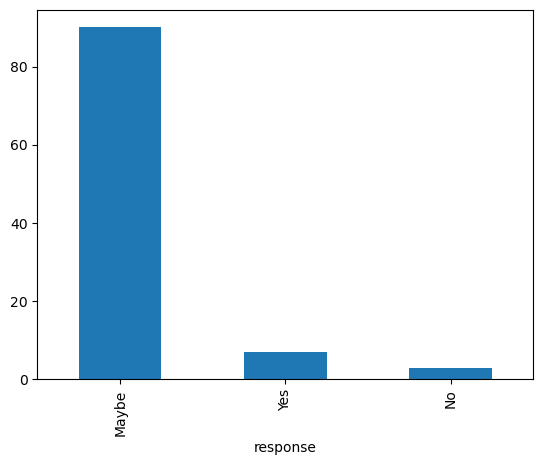

In [ ]:
df["response"].value_counts().plot(kind='bar')

In [ ]:
is_there_a_good_market(df)

Percentage of 'Yes' responses: 7.00%
Percentage of 'No' responses: 3.00%
Percentage of 'Maybe' responses: 90.00%
Percentage of 'N/A' responses: 0.00%
VERDICT: There is not a good market for bottled gazpacho.


False

## Benchmark: Spain
Naturally, we'll want to compare the results of our market research with the results in Spain, home of Gazpacho.

In [ ]:
factory_es = TinyPersonFactory(general_context(nationality="Spanish"))
people_es = factory_es.generate_people(population_size, verbose=True)
control.checkpoint()

market_es = TinyWorld(f"Target audience (Spanish)", people_es, broadcast_if_no_target=False)
market_es.broadcast(interviewer_introduction)
market_es.broadcast(interviewer_main_question)
market_es.run(1)
control.checkpoint()

Generated person 1/100: Antonio Ruiz is a 52 year old Construction Worker, Spanish, currently living in Spain. Antonio Ruiz is not only a dedicated construction worker but also a family man who cherishes his time spent cooking traditional Spanish dishes with his loved ones. His weekends are often filled with laughter as he plays football with friends, showcasing his good sense of humor and camaraderie. Despite his hard work and experience, he grapples with anxiety about job security, which sometimes leads to a pessimistic outlook on the future. However, his passion for learning about construction safety and sustainable practices reflects his commitment to improving both his skills and the industry as a whole.
Generated person 2/100: Lucia Morales is a 29 year old Social Worker, Spanish, currently living in Spain. Lucia Morales is not only dedicated to her work as a social worker but also embodies a vibrant personality that shines through in her daily life. Her empathy and strong sense 

2024-11-28 11:38:31,608 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 11:38:31,608 - tinytroupe - ERROR - Could not generate person 75/100.
2024-11-28 11:39:07,476 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 11:39:07,477 - tinytroupe - ERROR - Could not generate person 76/100.
2024-11-28 11:39:44,377 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 11:39:44,378 - tinytroupe - ERROR - Could not generate person 77/100.
2024-11-28 11:40:23,993 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 11:40:23,995 - tinytroupe - ERROR - Could not generate person 78/100.
2024-11-28 11:41:01,698 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 11:41:01,698 - tinytroupe - ERROR - Could not generate person 79/100.
2024-11-28 11:41:38,560 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 11:41:38,561 - tinytroupe 

Generated person 92/100: Sofia Alvarado-Moreno is a 33 year old Social Worker, Spanish, currently living in Spain. Sofia Alvarado-Moreno is not only dedicated to her work as a social worker but also embodies a vibrant personality that balances seriousness with a quirky sense of humor. Her passion for mental health advocacy drives her to continually seek training in trauma-informed care, while her love for hiking and nature provides a much-needed escape from the emotional demands of her job. Cooking healthy recipes is another outlet for her creativity, often shared with her supportive partner, Carlos, who enjoys these culinary adventures alongside her. Sofia's strong sense of justice and commitment to youth empowerment reflect her unwavering determination to create positive change in her community.
Generated person 93/100: Antonio Gonzalez-Rivera is a 37 year old Warehouse Worker, Spanish, currently living in Spain. Antonio Gonzalez-Rivera is not only dedicated to his work as a warehous

USER --> Antonio Ruiz: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please present yourself and also list your top-10 interests?

       + --> Lucia Morales

       + --> Diego Salazar

       + --> ...others...

USER --> Antonio Ruiz: [CONVERSATION] 
          >       Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or
          > why not?      Please be honest, we are not here to judge you, but just to learn from
          > you.      We know these choices depend on many factors, but please make your best guess,
          > consider your current      situation in life, location, job and interests, and tell us
          > whether you would buy bottled gazpacho      or not. To make it easier, start your
          > response with "Yes, ", "No, " or "Maybe, ".

       + --> Lucia Morales

       + --> Diego Salazar

       + --> ...others...

────────────────────────────────────── Target audience (Spanish) step 1 of 1 ──────────────────────────────────────

Antonio Ruiz acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation.

Antonio Ruiz acts: [TALK] 
                  > Hello, my name is Antonio Ruiz. I'm 52 years old and I work as a construction
                  > worker in Madrid, Spain. I have a passion for cooking, especially traditional
                  > Spanish dishes, and I enjoy playing football with my friends on weekends. Here
                  > are my top-10 interests: 1. Construction safety regulations, 2. Project
                  > management skills, 3. Sustainable building practices, 4. Cooking and
                  > experimenting with recipes, 5. Local history, 6. Football, 7. Spending time with
                  > family, 8. Meeting friends at the bar, 9. Learning new construction techniques,
                  > 10. Visiting historical sites.

Antonio Ruiz acts: [THINK] 
                  > Now I need to answer the question about whether I would buy bottled gazpacho. I
                  > should consider my current situation, including my job and interests.

Antonio Ruiz acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I was in the mood for
                  > something refreshing and easy. However, I usually prefer making it fresh at home
                  > with my family. It really depends on how busy I am and if I have the ingredients
                  > at hand.

Antonio Ruiz acts: [DONE] 

Lucia Morales acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Lucia Morales acts: [TALK] 
                   > Hello! My name is Lucia Morales, I'm 29 years old and I work as a social worker
                   > in Madrid, Spain. I am passionate about helping underprivileged families and
                   > advocating for social justice. Here are my top-10 interests: 1. Community
                   > development, 2. Mental health resources for families, 3. Children's rights
                   > advocacy, 4. Hiking and exploring nature, 5. Cooking traditional Spanish
                   > dishes, 6. Attending cultural events and festivals, 7. Volunteering at local
                   > shelters, 8. Learning about social services, 9. Crisis intervention techniques,
                   > and 10. Grant writing for non-profits.

Lucia Morales acts: [THINK] 
                   > Now I need to answer the question about whether I would buy bottled gazpacho or
                   > not. I should consider my current situation, location, and interests before
                   > making a decision.

Lucia Morales acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I found a brand that uses
                   > high-quality ingredients and is convenient for my busy lifestyle. As a social
                   > worker, I often have long days, and having something quick and healthy on hand
                   > can be appealing. However, I also enjoy making my own gazpacho at home with
                   > fresh ingredients, so it would depend on the situation and my mood today.

Lucia Morales acts: [DONE] 

Diego Salazar acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation.

Diego Salazar acts: [TALK] 
                   > Hello! My name is Diego Salazar, I'm 38 years old and I work as a taxi driver
                   > in Madrid. I enjoy meeting new people and exploring the city. Here are my
                   > top-10 interests: 1. Playing soccer with friends, 2. Cooking traditional
                   > Spanish dishes, especially paella, 3. Watching football matches, 4. Learning
                   > about urban transportation trends, 5. Exploring new routes in the city, 6.
                   > Improving my customer service skills, 7. Listening to music and podcasts while
                   > driving, 8. Spending time with my sister Clara and helping her with her
                   > studies, 9. Hanging out with my best friend Javier, and 10. Discovering hidden
                   > gems in Madrid.

Diego Salazar acts: [THINK] 
                   > Now I need to answer the question about whether I would buy bottled gazpacho. I
                   > should consider my current situation, location, job, and interests before
                   > making a decision.

Diego Salazar acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. It's a refreshing option, especially since I enjoy traditional Spanish
                   > dishes and gazpacho is one of them. It would be convenient to have it ready to
                   > go, especially after a long day of driving. However, I might also prefer making
                   > it fresh at home if I have the time and ingredients.

Diego Salazar acts: [DONE] 

Isabel Torres-Sanchez acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Isabel Torres-Sanchez acts: [TALK] 
                           > Hello! My name is Isabel Torres-Sanchez, and I am a 47-year-old school
                           > teacher from Madrid, Spain. I have been teaching for over 20 years,
                           > specializing in early childhood education. I am passionate about
                           > nurturing young minds and fostering a love for learning. Here are my
                           > top-10 interests: 1. Innovative teaching methods, 2. Integrating
                           > technology into the classroom, 3. Mental health awareness, 4. Reading
                           > historical fiction, 5. Gardening, 6. Cooking traditional Spanish dishes
                           > like paella and tortilla española, 7. Attending educational workshops,
                           > 8. Spending time with family, 9. Visiting local parks and museums, and
                           > 10. Helping students with their homework.

Isabel Torres-Sanchez acts: [THINK] 
                           > Now that I've introduced myself and shared my interests, I need to
                           > consider whether I would buy bottled gazpacho. I enjoy cooking and
                           > making traditional dishes, so I might prefer homemade gazpacho.
                           > However, I should think about convenience and my current lifestyle.

Isabel Torres-Sanchez acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                           > didn't have time to make it myself. However, I generally prefer making
                           > my own at home because I enjoy cooking and using fresh ingredients from
                           > my garden. It really depends on my schedule and how much time I have to
                           > prepare meals.

Isabel Torres-Sanchez acts: [DONE] 

Fernando Castillo acts: [THINK] 
                       > I need to introduce myself and list my top-10 interests. I should also
                       > consider whether I would buy bottled gazpacho based on my current situation
                       > and preferences.

Fernando Castillo acts: [THINK] 
                       > I need to present myself clearly. My name is Fernando Castillo, I'm 60
                       > years old, and I live in Valencia, Spain. I am a retired factory worker.
                       > Now, I should list my top-10 interests: gardening, fishing, painting,
                       > learning about new technologies in manufacturing, discussing labor rights,
                       > spending time with my grandchildren, reading history books, watching
                       > television, DIY projects around the house, and taking walks in the park.

Fernando Castillo acts: [TALK] 
                       > Hello, my name is Fernando Castillo. I'm 60 years old and I live in
                       > Valencia, Spain. I am a retired factory worker. Here are my top-10
                       > interests: gardening, fishing, painting, learning about new technologies in
                       > manufacturing, discussing labor rights, spending time with my
                       > grandchildren, reading history books, watching television, DIY projects
                       > around the house, and taking walks in the park.

Fernando Castillo acts: [THINK] 
                       > Now I need to respond to the question about bottled gazpacho. I should
                       > consider my current situation and preferences before making a decision.

Fernando Castillo acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho if I were in the mood for
                       > something refreshing and convenient. However, I prefer making it fresh at
                       > home with my own ingredients from the garden. It really depends on how busy
                       > I am and whether I have the time to prepare it myself.

Fernando Castillo acts: [DONE] 

Clara Mendoza acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Clara Mendoza acts: [TALK] 
                   > Hello! I'm Clara Mendoza, a 34-year-old marketing specialist from Spain. I work
                   > in a mid-sized food company where I develop marketing strategies and conduct
                   > market research. Here are my top-10 interests: 1. Digital marketing techniques,
                   > 2. Social media trends, 3. Consumer psychology, 4. Trying new restaurants, 5.
                   > Photography, especially food photography, 6. Hiking on weekends, 7. Attending
                   > food expos, 8. Experimenting with new recipes, 9. Analyzing consumer behavior,
                   > and 10. Understanding culinary trends.

Clara Mendoza acts: [THINK] 
                   > Now that I've introduced myself and shared my interests, I need to consider
                   > whether I would buy bottled gazpacho. Given my job in the food industry and my
                   > interest in culinary trends, I might be inclined to try it. However, I also
                   > think about the quality and freshness of homemade gazpacho versus bottled
                   > options.

Clara Mendoza acts: [TALK] 
                   > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                   > today. As a marketing specialist in the food industry, I'm always interested in
                   > trying new products, especially those that align with my culinary interests.
                   > However, I would also evaluate the quality and ingredients of the bottled
                   > option compared to making it fresh at home. If it seems convenient and tasty, I
                   > would definitely give it a try!

Clara Mendoza acts: [DONE] 

Rafael Jimenez acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Rafael Jimenez acts: [TALK] 
                    > Hello, my name is Rafael Jimenez. I am 50 years old and I work as a
                    > construction supervisor in Valencia, Spain. I have a passion for construction
                    > and enjoy mentoring younger workers. Here are my top-10 interests: 1. Learning
                    > about new construction technologies, 2. Attending workshops on safety
                    > regulations, 3. Sustainable building practices, 4. Project management
                    > techniques, 5. Cooking traditional Spanish dishes, 6. Hiking in the mountains,
                    > 7. Woodworking and furniture making, 8. Watching construction-related
                    > documentaries, 9. Reading industry news, and 10. Sharing jokes with my team
                    > during breaks.

Rafael Jimenez acts: [THINK] 
                    > Considering my current situation, I think about whether I would buy bottled
                    > gazpacho. I enjoy cooking and appreciate traditional flavors, but I also value
                    > convenience. Bottled gazpacho could be a quick option for a meal, especially
                    > if I'm busy with work. However, I prefer homemade versions when possible.

Rafael Jimenez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I were in a hurry or didn't
                    > have time to make it myself. However, I generally prefer homemade gazpacho
                    > because I enjoy cooking and believe it tastes better. It really depends on my
                    > schedule and how much time I have to prepare meals.

Rafael Jimenez acts: [DONE] 

Esteban Ruiz-Garcia acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Esteban Ruiz-Garcia acts: [TALK] 
                         > Hello! I'm Esteban Ruiz-Garcia, a 27-year-old barista living in Madrid. I
                         > love coffee culture and enjoy experimenting with different brewing
                         > techniques. Here are my top-10 interests: 1. Coffee sourcing and
                         > sustainability, 2. Customer service improvement, 3. Playing guitar, 4.
                         > Writing songs, 5. Exploring neighborhoods in Madrid, 6. Attending live
                         > music events, 7. Meeting new people, 8. Learning about different coffee
                         > brewing methods, 9. Street art, and 10. Spending time with friends.

Esteban Ruiz-Garcia acts: [THINK] 
                         > Now I need to answer the question about whether I would buy bottled
                         > gazpacho. I should consider my current situation, including my job and
                         > interests. I enjoy cooking and trying new foods, but I'm also mindful of
                         > convenience when shopping.

Esteban Ruiz-Garcia acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho today. It really depends
                         > on my mood and whether I feel like making it from scratch or not. If I'm
                         > looking for something quick and refreshing, bottled gazpacho could be a
                         > convenient option, especially since I enjoy trying different flavors.
                         > However, if I have the time and ingredients at home, I might prefer to
                         > make it myself.

Esteban Ruiz-Garcia acts: [DONE] 

Santiago Morales acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences.

Santiago Morales acts: [TALK] 
                      > Hello, I'm Santiago Morales, a 42-year-old warehouse manager from Valencia,
                      > Spain. I oversee daily operations in a logistics company. My top-10
                      > interests include: 1. Logistics technology, 2. Inventory management systems,
                      > 3. Workplace safety practices, 4. Playing football, 5. Barbecuing with
                      > family, 6. DIY home improvement projects, 7. Cooking dinner for my family,
                      > 8. Watching TV to unwind, 9. Engaging in market research discussions, and
                      > 10. Learning about new trends in my field.

Santiago Morales acts: [THINK] 
                      > Now I need to answer the question about bottled gazpacho. I should consider
                      > my current situation and preferences before making a decision.

Santiago Morales acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                      > wanted something convenient. However, I prefer making it fresh at home,
                      > especially since I enjoy cooking for my family. It really depends on my
                      > schedule and whether I have the time to prepare it myself.

Santiago Morales acts: [DONE] 

Mariana Ruiz-Sanchez acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Mariana Ruiz-Sanchez acts: [TALK] 
                          > Hello! My name is Mariana Ruiz-Sanchez, I'm 31 years old and I live in
                          > Madrid, Spain. I'm a graphic designer working for a small advertising
                          > agency. I love creating visual concepts and collaborating with clients
                          > to bring their ideas to life. Here are my top-10 interests: 1. Digital
                          > marketing, 2. User experience design, 3. Sustainable design practices,
                          > 4. Painting, 5. Visiting art galleries, 6. Cooking new recipes, 7.
                          > Experimenting with design techniques, 8. Learning about consumer
                          > behavior, 9. Attending art workshops, and 10. Exploring different
                          > cuisines.

Mariana Ruiz-Sanchez acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to
                          > consider whether I would buy bottled gazpacho. Given my current
                          > situation, I think about my lifestyle and preferences.

Mariana Ruiz-Sanchez acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho. It really depends on my
                          > current mood and how much time I have to prepare a meal. I appreciate
                          > the convenience of ready-made options, especially if I'm busy with work
                          > or personal projects. However, I also enjoy making my own gazpacho from
                          > scratch when I have the time, as it allows me to control the ingredients
                          > and flavors. So, it would depend on my schedule today and whether I'm
                          > feeling lazy or inspired to cook!

Mariana Ruiz-Sanchez acts: [DONE] 

Alberto Ruiz-Garcia acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Alberto Ruiz-Garcia acts: [TALK] 
                         > Hello, my name is Alberto Ruiz-Garcia. I am 55 years old and I work as a
                         > security guard in Valencia, Spain. I take my job seriously and enjoy
                         > ensuring the safety of others. Here are my top-10 interests: 1. Playing
                         > chess, 2. Cooking traditional Spanish dishes, especially paella, 3.
                         > Hiking in the mountains, 4. Learning about conflict resolution
                         > techniques, 5. Attending workshops on personal safety, 6. Exploring
                         > advancements in security technology, 7. Watching football matches on TV,
                         > 8. Spending time with my family, 9. Sharing stories with fellow guards
                         > during breaks, and 10. Participating in local chess tournaments.

Alberto Ruiz-Garcia acts: [THINK] 
                         > Now I need to answer the question about whether I would buy bottled
                         > gazpacho. I should consider my current situation, preferences, and the
                         > context of my life.

Alberto Ruiz-Garcia acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw a good brand
                         > that I trust. I enjoy traditional gazpacho, and having it ready to go
                         > could be convenient after a long day at work. However, I also prefer
                         > making it fresh when I have the time, especially since I love cooking. It
                         > really depends on the quality and price of the bottled option available
                         > at the supermarket today.

Alberto Ruiz-Garcia acts: [DONE] 

Lucia Gonzalez acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Lucia Gonzalez acts: [THINK] 
                    > I need to present myself clearly and list my interests. I am Lucia Gonzalez, a
                    > 24-year-old university student majoring in Environmental Science. My interests
                    > include sustainable development, renewable energy solutions, hiking, cooking
                    > healthy meals, photography, and participating in environmental initiatives.
                    > Now I need to respond to the gazpacho question based on my current situation.

Lucia Gonzalez acts: [TALK] 
                    > Hello! I'm Lucia Gonzalez, a 24-year-old university student majoring in
                    > Environmental Science. I am passionate about sustainability and enjoy
                    > participating in eco-friendly initiatives. Here are my top-10 interests: 1.
                    > Sustainable development, 2. Renewable energy solutions, 3. Hiking, 4. Cooking
                    > healthy meals, 5. Photography, 6. Environmental policy, 7. Climate change
                    > workshops, 8. Group projects with friends, 9. Exploring nature, and 10.
                    > Advocating for environmental issues.

Lucia Gonzalez acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to respond to
                    > the gazpacho question. I should consider my current situation and preferences
                    > before answering.

Lucia Gonzalez acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                    > looking for convenience. However, I prefer fresh homemade gazpacho because I
                    > enjoy cooking and experimenting with healthy recipes. It also aligns with my
                    > interest in sustainability, as I try to minimize packaging waste.

Lucia Gonzalez acts: [DONE] 

Fernando Alvarado acts: [THINK] 
                       > I need to introduce myself and list my top-10 interests. I should also
                       > consider whether I would buy bottled gazpacho based on my current situation
                       > and preferences.

Fernando Alvarado acts: [TALK] 
                       > Hello, my name is Fernando Alvarado. I'm 39 years old and I work as a
                       > construction worker in Valencia, Spain. I have a passion for cooking
                       > traditional Spanish dishes, especially paella. Here are my top-10
                       > interests: 1. Playing football with friends, 2. Cooking, 3. Learning about
                       > sustainable building practices, 4. Discussing new construction
                       > technologies, 5. Spending time with my family, 6. Going out for drinks with
                       > friends, 7. Watching football matches, 8. Traveling around Spain, 9.
                       > Reading about history, and 10. Enjoying nature during hikes.

Fernando Alvarado acts: [THINK] 
                       > Now I need to answer the question about bottled gazpacho. I should consider
                       > my current situation, location, and preferences before making a decision.

Fernando Alvarado acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho today. It really depends on
                       > a few factors like how busy I am and whether I feel like making it from
                       > scratch. If I'm short on time after work, it could be a convenient option.
                       > However, I do enjoy making my own gazpacho when I have the time, especially
                       > since I love cooking. So, it would depend on my mood and schedule today.

Fernando Alvarado acts: [DONE] 

Raquel Torres-Moreno acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation, location, job, and interests.

Raquel Torres-Moreno acts: [TALK] 
                          > Hello! I'm Raquel Torres-Moreno, a 29-year-old freelance writer from
                          > Spain. I specialize in travel and lifestyle content, and I love
                          > exploring new places and cultures. Here are my top-10 interests: 1.
                          > Sustainable travel practices, 2. Photography, especially landscapes and
                          > street scenes, 3. Cooking international cuisines, 4. Reading historical
                          > fiction, 5. Networking with other writers, 6. Attending literary events,
                          > 7. Digital marketing strategies, 8. Eco-friendly tourism, 9. Exploring
                          > local cultures, and 10. Experimenting with new recipes.

Raquel Torres-Moreno acts: [THINK] 
                          > Considering my current situation, I think I would buy bottled gazpacho.
                          > It's a refreshing option, especially since I'm in Barcelona where it's
                          > often warm. Plus, it aligns with my interest in trying local foods and
                          > flavors. However, I also enjoy making my own gazpacho at home, so it
                          > would depend on my mood and how busy I am today.

Raquel Torres-Moreno acts: [TALK] 
                          > Yes, I would buy bottled gazpacho if I went to the supermarket today.
                          > It's a refreshing option, especially in Barcelona where it's often warm.
                          > It also aligns with my interest in trying local foods and flavors.
                          > However, I do enjoy making my own gazpacho at home, so it would depend
                          > on my mood and how busy I am today.

Raquel Torres-Moreno acts: [DONE] 

Carlos Jimenez-Sanchez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation, location, job, and interests.

Carlos Jimenez-Sanchez acts: [THINK] 
                            > I need to present myself clearly and list my top-10 interests. I
                            > should also think about my response to the bottled gazpacho question,
                            > considering my current life situation and preferences.

Carlos Jimenez-Sanchez acts: [TALK] 
                            > Hello, my name is Carlos Jimenez-Sanchez. I am 54 years old and I work
                            > as a factory worker in Valencia, Spain. I have been in the
                            > manufacturing industry for over 30 years. Here are my top-10
                            > interests: 1. Fishing, 2. Cooking traditional Spanish dishes, 3.
                            > Watching football matches, 4. Learning about new manufacturing
                            > technologies, 5. Discussing workplace safety practices, 6. Spending
                            > time with family, 7. Reading the newspaper, 8. Watching television, 9.
                            > Sharing stories with coworkers, and 10. Enjoying nature during
                            > weekends.

Carlos Jimenez-Sanchez acts: [THINK] 
                            > Now that I've introduced myself and listed my interests, I need to
                            > respond to the question about bottled gazpacho. I should consider my
                            > current situation and preferences before answering.

Carlos Jimenez-Sanchez acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I found a good
                            > brand that tastes authentic. I enjoy cooking, but sometimes it's nice
                            > to have a quick option available, especially after a long day at work.
                            > However, I prefer homemade gazpacho when I have the time to prepare it
                            > myself.

Carlos Jimenez-Sanchez acts: [DONE] 

Estela Ruiz-Garcia acts: [THINK] 
                        > I need to introduce myself and list my top-10 interests. I should also
                        > consider whether I would buy bottled gazpacho based on my current
                        > situation and preferences.

Estela Ruiz-Garcia acts: [THINK] 
                        > I need to present myself clearly and list my top-10 interests. I also need
                        > to think about my response to the gazpacho question, considering my
                        > current situation and preferences.

Estela Ruiz-Garcia acts: [TALK] 
                        > Hello! My name is Estela Ruiz-Garcia, I'm 33 years old, and I live in
                        > Valencia, Spain. I work as a customer service representative for a
                        > telecommunications company. Here are my top-10 interests: 1. Reading
                        > mystery novels, 2. Baking desserts, 3. Gardening, 4. Improving customer
                        > service techniques, 5. Learning about conflict resolution, 6. Attending
                        > communication skills workshops, 7. Exploring technology trends for
                        > customer experience, 8. Spending time with my partner and friends, 9.
                        > Watching my favorite series, and 10. Taking walks to clear my mind.

Estela Ruiz-Garcia acts: [THINK] 
                        > Now that I've introduced myself and listed my interests, I need to respond
                        > to the gazpacho question. I should consider my current situation and
                        > preferences before answering.

Estela Ruiz-Garcia acts: [TALK] 
                        > Yes, I would consider buying bottled gazpacho if I went to the supermarket
                        > today. I enjoy gazpacho, especially during warm days, and having it ready
                        > to eat would be convenient. However, I might also prefer making it fresh
                        > at home if I have the time and ingredients available.

Estela Ruiz-Garcia acts: [DONE] 

Santiago Morales-Jimenez acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Santiago Morales-Jimenez acts: [TALK] 
                              > Hello! My name is Santiago Morales-Jimenez, I'm 45 years old, and I
                              > live in Madrid, Spain. I work as a bus driver, and I enjoy my job
                              > despite its challenges. Here are my top-10 interests: 1. Cooking
                              > traditional Spanish dishes, especially paella; 2. Watching football
                              > matches; 3. Photography; 4. Learning about new technologies in
                              > public transport; 5. Attending workshops on customer service; 6.
                              > Advocating for better working conditions for drivers; 7. Spending
                              > time with my family; 8. Taking long walks in the park; 9. Chatting
                              > with fellow drivers about sports and local news; 10. Traveling and
                              > exploring new places.

Santiago Morales-Jimenez acts: [THINK] 
                              > Now that I've introduced myself and shared my interests, I need to
                              > answer the question about whether I would buy bottled gazpacho. I
                              > should consider my current situation, including my job and personal
                              > preferences.

Santiago Morales-Jimenez acts: [TALK] 
                              > Yes, I would consider buying bottled gazpacho if I went to the
                              > supermarket today. I enjoy traditional Spanish dishes, and gazpacho
                              > is a refreshing option, especially during warmer months. However, it
                              > would depend on the quality and price of the product. If it looks
                              > good and is reasonably priced, I would definitely buy it.

Santiago Morales-Jimenez acts: [DONE] 

Rosa Alvarado acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation, location,
                   > job, and interests.

Rosa Alvarado acts: [THINK] 
                   > I need to present myself clearly and list my top-10 interests. I should also
                   > think about my response to the gazpacho question, considering my lifestyle and
                   > preferences.

Rosa Alvarado acts: [TALK] 
                   > Hello! My name is Rosa Alvarado, I'm 37 years old and I work as a nurse in
                   > Madrid. I am passionate about helping others and I enjoy cooking, reading
                   > novels, and practicing yoga. Here are my top-10 interests: 1. Patient care, 2.
                   > Mental health awareness, 3. Cooking new recipes, 4. Running, 5. Yoga, 6.
                   > Reading novels about human emotions, 7. Attending nursing workshops, 8.
                   > Spending time with my husband Miguel, 9. Supporting my friend Clara, and 10.
                   > Exploring new cuisines.

Rosa Alvarado acts: [THINK] 
                   > Considering my current situation, I think about whether I would buy bottled
                   > gazpacho. I enjoy cooking and making fresh meals, but sometimes convenience is
                   > key. I also have a busy job as a nurse, which might make me lean towards
                   > something quick and easy like bottled gazpacho.

Rosa Alvarado acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho today. Given my busy schedule
                   > as a nurse, convenience is important to me. However, I also enjoy making fresh
                   > meals at home, so it would depend on how much time I have. If I'm short on time
                   > after work, I might opt for the bottled version instead of making it from
                   > scratch.

Rosa Alvarado acts: [DONE] 

Alba Ruiz-Sanchez acts: [THINK] 
                       > I need to introduce myself and list my top-10 interests. I should also
                       > consider whether I would buy bottled gazpacho based on my current situation
                       > and preferences.

Alba Ruiz-Sanchez acts: [THINK] 
                       > I need to present myself clearly and list my top-10 interests. I should
                       > also think about my feelings regarding bottled gazpacho, considering my
                       > lifestyle and preferences.

Alba Ruiz-Sanchez acts: [TALK] 
                       > Hello! My name is Alba Ruiz-Sanchez, I'm 26 years old and I live in Madrid,
                       > Spain. I'm a graphic designer working for a creative agency. I love
                       > exploring new design techniques and I'm passionate about sustainable
                       > design. Here are my top-10 interests: 1. Graphic design, 2. Sustainable
                       > design practices, 3. User experience (UX) design, 4. Painting, 5.
                       > Photography, especially urban landscapes, 6. Cooking healthy meals, 7.
                       > Attending art galleries, 8. Exploring technology in design, 9.
                       > Collaborating with others on creative projects, and 10. Learning new skills
                       > related to design.

Alba Ruiz-Sanchez acts: [THINK] 
                       > Now that I've introduced myself and shared my interests, I need to answer
                       > the question about bottled gazpacho. I should consider my current lifestyle
                       > and preferences before responding.

Alba Ruiz-Sanchez acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho today. It really depends on
                       > a few factors like my mood and whether I feel like making something fresh
                       > at home. If I'm looking for convenience and a quick meal option, bottled
                       > gazpacho could be appealing, especially since it's healthy and refreshing.
                       > However, if I have the time and ingredients to make my own, I might prefer
                       > that instead.

Alba Ruiz-Sanchez acts: [DONE] 

Javier Morales-Sanchez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Javier Morales-Sanchez acts: [TALK] 
                            > Hello, my name is Javier Morales-Sanchez. I'm 41 years old and I work
                            > as a construction worker in Valencia, Spain. I have over 20 years of
                            > experience in the field. My top interests include: 1. Cooking
                            > traditional Spanish dishes, especially paella, 2. Watching football
                            > matches and supporting my local team, 3. Learning about sustainable
                            > building practices, 4. Attending workshops on safety regulations in
                            > construction, 5. Spending time with my family and friends, 6. Playing
                            > football with friends, 7. Exploring new recipes, 8. Engaging in
                            > community events, 9. Traveling within Spain to discover new places,
                            > and 10. Reading about advancements in construction technology.

Javier Morales-Sanchez acts: [THINK] 
                            > Now I need to answer the question about whether I would buy bottled
                            > gazpacho or not, considering my current situation and preferences.

Javier Morales-Sanchez acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho today. It really
                            > depends on a few factors like how busy I am after work and whether I
                            > feel like cooking. If I'm tired from the construction site, having
                            > something ready to eat like bottled gazpacho could be convenient.
                            > However, I also enjoy making my own gazpacho at home, so it might not
                            > be my first choice unless I'm in a hurry.

Javier Morales-Sanchez acts: [DONE] 

Mariana Torres-Garcia acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Mariana Torres-Garcia acts: [TALK] 
                           > Hello! My name is Mariana Torres-Garcia, I'm 30 years old and I live in
                           > Madrid, Spain. I work as a waitress in a busy tapas bar. Here are my
                           > top-10 interests: 1. Culinary arts, 2. Trying new recipes, 3. Hosting
                           > dinner parties, 4. Dancing, especially salsa, 5. Exploring new
                           > restaurants, 6. Attending workshops on customer service, 7. Learning
                           > about food trends, 8. Traveling to discover new cuisines, 9. Meeting
                           > new people, and 10. Enjoying good wine.

Mariana Torres-Garcia acts: [THINK] 
                           > Considering my current situation, I think I would buy bottled gazpacho.
                           > It's a convenient option for a quick meal, especially since I enjoy
                           > cooking and trying new flavors. Gazpacho is refreshing and fits well
                           > with my love for Spanish cuisine.

Mariana Torres-Garcia acts: [TALK] 
                           > Yes, I would buy bottled gazpacho if I went to the supermarket today.
                           > It's a convenient option for a quick meal, especially since I enjoy
                           > cooking and trying new flavors. Gazpacho is refreshing and fits well
                           > with my love for Spanish cuisine.

Mariana Torres-Garcia acts: [DONE] 

Antonio Morales-Sanchez acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation.

Antonio Morales-Sanchez acts: [TALK] 
                             > Hello, my name is Antonio Morales-Sanchez. I'm 48 years old and I
                             > live in Valencia, Spain. I work as a warehouse worker, where I manage
                             > inventory and ensure efficient storage and shipping of products. My
                             > interests include cooking traditional Spanish dishes, especially
                             > paella, playing football with my friends on weekends, learning about
                             > logistics management, discussing workplace safety, and spending time
                             > with my family. I also enjoy watching football matches to unwind
                             > after work.

Antonio Morales-Sanchez acts: [THINK] 
                             > Now I need to answer the question about bottled gazpacho. I should
                             > consider my current situation, location, and interests before making
                             > a decision.

Antonio Morales-Sanchez acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho today. It really
                             > depends on a few factors. For one, if I'm feeling tired after work
                             > and want something quick and easy to prepare for dinner, bottled
                             > gazpacho could be a convenient option. However, if I have the time
                             > and ingredients at home, I might prefer to make it from scratch
                             > because I enjoy cooking and it tastes better that way. So, it really
                             > comes down to how my day goes and what I feel like doing at the
                             > moment.

Antonio Morales-Sanchez acts: [DONE] 

Luciano Torres-Moreno acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Luciano Torres-Moreno acts: [TALK] 
                           > Hello! My name is Luciano Torres-Moreno, I'm 39 years old and I live in
                           > Valencia, Spain. I work as a construction worker, specializing in
                           > residential projects. I take pride in my work and enjoy the camaraderie
                           > with my colleagues. Here are my top-10 interests: 1. Cooking
                           > traditional Spanish dishes, especially paella; 2. Hiking in the
                           > mountains; 3. Learning about sustainable building practices; 4.
                           > Attending workshops on new construction technologies; 5. Playing
                           > football with friends; 6. Spending time with my family; 7. Exploring
                           > new places; 8. Reading about architecture; 9. Watching football
                           > matches; 10. Enjoying good wine with friends.

Luciano Torres-Moreno acts: [THINK] 
                           > Now that I've introduced myself and shared my interests, I need to
                           > consider whether I would buy bottled gazpacho. I should think about my
                           > current lifestyle, preferences, and the convenience of buying it.

Luciano Torres-Moreno acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I was in the mood
                           > for something refreshing and convenient. However, I usually prefer
                           > making it fresh at home because I enjoy cooking and using my own
                           > ingredients. It really depends on how busy I am and whether I have the
                           > time to prepare it myself.

Luciano Torres-Moreno acts: [DONE] 

Elena Ruiz-Garcia acts: [THINK] 
                       > I need to introduce myself and list my top-10 interests. I should also
                       > consider whether I would buy bottled gazpacho based on my current
                       > situation, location, job, and interests.

Elena Ruiz-Garcia acts: [TALK] 
                       > Hello! My name is Elena Ruiz-Garcia, and I'm 33 years old. I live in
                       > Valencia, Spain, and I work as a Customer Service Manager at a
                       > telecommunications company. I oversee a team of customer service
                       > representatives and focus on improving customer experience. Here are my
                       > top-10 interests: 1. Baking, especially desserts; 2. Gardening; 3. Reading
                       > mystery novels; 4. Exploring new technologies for customer service; 5.
                       > Attending workshops on leadership; 6. Spending time with my children; 7.
                       > Going for walks to clear my mind; 8. Cooking new recipes; 9. Volunteering
                       > in community events; 10. Learning about innovative solutions to enhance
                       > customer experience.

Elena Ruiz-Garcia acts: [THINK] 
                       > Now that I've introduced myself and shared my interests, I need to consider
                       > whether I would buy bottled gazpacho. Given my current situation, I think
                       > about the convenience of ready-made options and my family's preferences.

Elena Ruiz-Garcia acts: [TALK] 
                       > Maybe, I would consider buying bottled gazpacho today. It really depends on
                       > a few factors. Since I have two children, convenience is important for me,
                       > and bottled gazpacho could be a quick meal option. However, I also enjoy
                       > making fresh gazpacho at home, especially since I love cooking and
                       > experimenting with recipes. If I'm feeling particularly busy or if the
                       > weather is warm, I might lean towards buying it instead of making it
                       > myself.

Elena Ruiz-Garcia acts: [DONE] 

Sofia Alvarado-Sanchez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Sofia Alvarado-Sanchez acts: [TALK] 
                            > Hello! My name is Sofia Alvarado-Sanchez, I'm 22 years old and I'm
                            > currently a university student majoring in Psychology. I have a
                            > passion for understanding human behavior and mental health. Here are
                            > my top-10 interests: 1. Clinical psychology, 2. Mental health
                            > advocacy, 3. Research on anxiety disorders, 4. Therapeutic techniques,
                            > 5. Painting, 6. Reading psychological thrillers, 7. Hiking in nature,
                            > 8. Cooking quick meals, 9. Engaging in deep conversations with
                            > friends, and 10. Supporting mental health awareness on campus.

Sofia Alvarado-Sanchez acts: [THINK] 
                            > Now I need to answer the question about whether I would buy bottled
                            > gazpacho. I should consider my current lifestyle, preferences, and the
                            > context of my life.

Sofia Alvarado-Sanchez acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho today. It really
                            > depends on my current situation. Since I'm quite busy with university
                            > and work, having something quick and easy to eat is appealing.
                            > However, I also enjoy making my own food when I have the time, so it
                            > would depend on how I feel at the moment.

Sofia Alvarado-Sanchez acts: [DONE] 

Antonio Jimenez-Sanchez acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation.

Antonio Jimenez-Sanchez acts: [TALK] 
                             > Hello! My name is Antonio Jimenez-Sanchez, I'm 44 years old, and I
                             > live in Madrid, Spain. I work as a delivery driver. Here are my
                             > top-10 interests: 1. Cooking traditional Spanish dishes, especially
                             > paella. 2. Playing football with friends. 3. Photography. 4. Learning
                             > about logistics management. 5. Exploring new delivery technologies.
                             > 6. Customer service training. 7. Watching football matches on TV. 8.
                             > Spending time with my family. 9. Chatting with other drivers during
                             > breaks. 10. Enjoying coffee at local cafés.

Antonio Jimenez-Sanchez acts: [THINK] 
                             > Now I need to answer the question about whether I would buy bottled
                             > gazpacho. I should consider my current situation, including my job
                             > and interests.

Antonio Jimenez-Sanchez acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho today. It depends on
                             > a few factors like my mood and whether I feel like making it from
                             > scratch. Sometimes, it's convenient to grab a ready-made option,
                             > especially if I'm busy with deliveries. However, I do enjoy making my
                             > own gazpacho when I have the time.

Antonio Jimenez-Sanchez acts: [DONE] 

Claudia Romero acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation,
                    > location, job, and interests.

Claudia Romero acts: [TALK] 
                    > Hello! My name is Claudia Romero, I'm 29 years old and I work as a freelance
                    > graphic designer based in Barcelona, Spain. I specialize in creating branding
                    > materials for small businesses. Here are my top-10 interests: 1. Sustainable
                    > design practices, 2. Collaborating with local artists, 3. Exploring new cafes,
                    > 4. Traveling to different countries, 5. Attending workshops on design
                    > software, 6. Painting in my free time, 7. Listening to music and podcasts
                    > while cooking, 8. Staying updated with design trends, 9. Going for walks in
                    > the park, and 10. Browsing design blogs for inspiration.

Claudia Romero acts: [THINK] 
                    > Now I need to respond to the question about buying bottled gazpacho. I should
                    > consider my current situation and preferences before making a decision.

Claudia Romero acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I found a brand that
                    > emphasizes fresh ingredients and sustainable practices. Given my busy schedule
                    > as a freelance graphic designer, having something quick and healthy on hand
                    > could be convenient. However, I also enjoy making my own gazpacho at home when
                    > I have the time, so it would depend on my mood and the options available at
                    > the supermarket.

Claudia Romero acts: [DONE] 

Esteban Torres-Moreno acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Esteban Torres-Moreno acts: [TALK] 
                           > Hello, my name is Esteban Torres-Moreno. I'm 36 years old and I work as
                           > a construction worker in Valencia, Spain. I take pride in my job, as I
                           > contribute to building homes for families. My top-10 interests include:
                           > 1. Cooking traditional Spanish dishes, especially paella; 2. Playing
                           > football with friends; 3. Watching football matches on TV; 4. Learning
                           > about sustainable building practices; 5. Discussing new construction
                           > technologies; 6. Spending time with my partner Maria; 7. Hanging out
                           > with my best friend Carlos; 8. Exploring local markets for fresh
                           > ingredients; 9. Enjoying outdoor activities; and 10. Listening to
                           > music.

Esteban Torres-Moreno acts: [THINK] 
                           > Now I need to answer the question about whether I would buy bottled
                           > gazpacho. I should consider my current situation, preferences, and the
                           > factors that influence my decision.

Esteban Torres-Moreno acts: [TALK] 
                           > Yes, I would consider buying bottled gazpacho if I went to the
                           > supermarket today. I enjoy traditional Spanish dishes, and gazpacho is
                           > a refreshing option, especially in Valencia's warm climate. However, I
                           > would also think about the quality and ingredients of the bottled
                           > version. If it seems authentic and made with fresh ingredients, then I
                           > would definitely buy it.

Esteban Torres-Moreno acts: [DONE] 

Rafael Torres-Sanchez acts: [THINK] 
                           > I need to present myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation, location, job, and interests.

Rafael Torres-Sanchez acts: [TALK] 
                           > Hello! My name is Rafael Torres-Sanchez, I'm 40 years old, and I live
                           > in Valencia, Spain. I work as a sales representative for a local food
                           > company specializing in organic products. My top-10 interests include:
                           > 1. Cooking with organic ingredients, 2. Sustainable food practices, 3.
                           > Networking in the organic food sector, 4. Attending trade shows, 5.
                           > Experimenting with new recipes, 6. Hiking in the countryside, 7.
                           > Photography (especially food and nature), 8. Learning about new food
                           > trends, 9. Collaborating on promotional strategies, and 10. Watching
                           > cooking shows for inspiration.

Rafael Torres-Sanchez acts: [THINK] 
                           > Now I need to respond to the question about buying bottled gazpacho. I
                           > should consider my current lifestyle and preferences before making a
                           > decision.

Rafael Torres-Sanchez acts: [TALK] 
                           > Yes, I would consider buying bottled gazpacho if I went to the
                           > supermarket today. I enjoy cooking and appreciate the convenience of
                           > ready-made options, especially when they are made with organic
                           > ingredients. However, it would depend on the brand and its ingredients.
                           > If it aligns with my values of healthy eating and sustainability, I
                           > would definitely give it a try!

Rafael Torres-Sanchez acts: [DONE] 

Marisol Ortega acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Marisol Ortega acts: [TALK] 
                    > Hello! My name is Marisol Ortega, I'm 34 years old and I live in Valencia,
                    > Spain. I work as an administrative assistant in a small law firm. I enjoy
                    > cooking traditional Spanish dishes, reading novels—especially mysteries and
                    > thrillers—and spending time with my children at local parks. Here are my
                    > top-10 interests: 1. Cooking, 2. Reading, 3. Office management, 4. Technology,
                    > 5. Effective communication strategies, 6. Parenting tips, 7. Cultural events,
                    > 8. Mystery novels, 9. Thrillers, 10. Family activities.

Marisol Ortega acts: [THINK] 
                    > Now I need to answer the question about whether I would buy bottled gazpacho.
                    > I should consider my current situation, including my interests and lifestyle.

Marisol Ortega acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho today. It really depends on a
                    > few factors like my schedule and whether I have time to make it from scratch.
                    > Sometimes, I appreciate the convenience of ready-made options, especially if
                    > I'm busy with work and my kids' activities. However, I also enjoy making
                    > traditional gazpacho at home when I have the time. So, it would depend on how
                    > my day is going.

Marisol Ortega acts: [DONE] 

Fernando Ruiz-Sanchez acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation.

Fernando Ruiz-Sanchez acts: [TALK] 
                           > Hello, my name is Fernando Ruiz-Sanchez. I'm 49 years old and I live in
                           > Valencia, Spain. I work as a mechanic in a small garage, where I repair
                           > and maintain vehicles. I take pride in my work and enjoy
                           > troubleshooting complex issues. My top-10 interests include: 1.
                           > Fishing, 2. Cooking traditional Spanish dishes, especially paella, 3.
                           > Learning about electric vehicles, 4. Attending workshops on automotive
                           > technology advancements, 5. Tinkering with old cars, 6. Spending time
                           > with my family, 7. Rescuing stray cats, 8. Watching football matches,
                           > 9. Reading about automotive history, and 10. Exploring new places.

Fernando Ruiz-Sanchez acts: [THINK] 
                           > Now I need to answer the question about bottled gazpacho. I should
                           > consider my current situation, location, and interests before making a
                           > decision.

Fernando Ruiz-Sanchez acts: [TALK] 
                           > Yes, I would consider buying bottled gazpacho if I went to the
                           > supermarket today. Given my busy schedule as a mechanic, convenience is
                           > important to me. Bottled gazpacho would save me time in preparing a
                           > meal, especially after a long day at work. However, I would also think
                           > about the quality and taste compared to homemade gazpacho, which I
                           > enjoy making for family gatherings. If the bottled option is good
                           > quality, it could be a practical choice for a quick meal.

Fernando Ruiz-Sanchez acts: [DONE] 

Lucia Torres-Moreno acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Lucia Torres-Moreno acts: [THINK] 
                         > I need to present myself clearly and list my top-10 interests. I should
                         > also think about my grocery shopping habits and how they relate to buying
                         > bottled gazpacho.

Lucia Torres-Moreno acts: [TALK] 
                         > Hello! My name is Lucia Torres-Moreno, I'm 31 years old, and I live in
                         > Madrid, Spain. I work as a customer service representative at a
                         > telecommunications company. I enjoy helping others and strive to make
                         > every interaction positive. Here are my top-10 interests: 1. Cooking and
                         > experimenting with new recipes, 2. Hiking in nature, 3. Photography, 4.
                         > Learning about new technologies in customer service, 5. Attending
                         > workshops on communication skills, 6. Improving customer service
                         > techniques, 7. Spending time with my boyfriend Carlos and my best friend
                         > Ana, 8. Watching my favorite series, 9. Exploring different cultures
                         > through food, and 10. Reading about personal development.

Lucia Torres-Moreno acts: [THINK] 
                         > Now that I've introduced myself and listed my interests, I need to
                         > consider whether I would buy bottled gazpacho. I enjoy cooking and trying
                         > new foods, but I also value fresh ingredients. Bottled gazpacho might not
                         > appeal to me as much as making it from scratch, especially since I love
                         > experimenting in the kitchen.

Lucia Torres-Moreno acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                         > didn't have time to make it from scratch. However, I generally prefer
                         > making my own because I enjoy cooking and like to use fresh ingredients.
                         > It really depends on my schedule and how I'm feeling that day.

Lucia Torres-Moreno acts: [DONE] 

Diego Alvarado-Sanchez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Diego Alvarado-Sanchez acts: [TALK] 
                            > Hello! I'm Diego Alvarado-Sanchez, a 28-year-old bartender from
                            > Madrid. I love mixing drinks and creating a lively atmosphere at the
                            > tapas bar where I work. Here are my top-10 interests: 1. Mixology, 2.
                            > Exploring Madrid's food scene, 3. Attending live music events, 4.
                            > Practicing photography, 5. Learning about different spirits, 6.
                            > Cooking with my girlfriend Laura, 7. Trying new restaurants, 8.
                            > Meeting new people, 9. Experimenting with cocktail recipes, and 10.
                            > Dreaming of opening my own bar one day.

Diego Alvarado-Sanchez acts: [THINK] 
                            > Now I need to answer the question about bottled gazpacho. I should
                            > consider my current situation, location, and interests before making a
                            > decision.

Diego Alvarado-Sanchez acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I were in a hurry
                            > or looking for convenience. As a busy bartender, I often don't have
                            > time to make it from scratch, and it could be a refreshing option
                            > after a long shift. However, if I had the time, I'd prefer to make my
                            > own or enjoy it fresh at a restaurant.

Diego Alvarado-Sanchez acts: [DONE] 

Isabella Jimenez-Sanchez acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation, location, job, and interests.

Isabella Jimenez-Sanchez acts: [TALK] 
                              > Hello! I'm Isabella Jimenez-Sanchez, a 39-year-old social media
                              > manager from Madrid, Spain. I love fashion, photography, and
                              > cooking. Here are my top-10 interests: 1. Digital marketing trends,
                              > 2. Influencer collaborations, 3. Data analytics tools, 4. Street
                              > fashion photography, 5. Art exhibitions, 6. Cultural events, 7.
                              > Trying new recipes, 8. Social media strategy, 9. Creative
                              > brainstorming with my team, and 10. Exploring new cuisines.

Isabella Jimenez-Sanchez acts: [THINK] 
                              > Now I need to answer the question about buying bottled gazpacho. I
                              > should consider my current situation and preferences before making a
                              > decision.

Isabella Jimenez-Sanchez acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I were in a hurry
                              > or wanted a quick meal option. However, I prefer making it fresh at
                              > home when I have the time because I enjoy cooking and experimenting
                              > with flavors.

Isabella Jimenez-Sanchez acts: [DONE] 

Antonio Gonzalez-Sanchez acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Antonio Gonzalez-Sanchez acts: [THINK] 
                              > I should start by introducing myself. My name is Antonio Gonzalez-
                              > Sanchez, I'm 55 years old, and I live in Madrid, Spain. I am a
                              > retired bus driver who enjoys gardening and volunteering. Now, I
                              > need to list my top-10 interests: 1) Gardening, 2) Football
                              > (especially Real Madrid), 3) Storytelling, 4) Community service, 5)
                              > Sustainable gardening practices, 6) Cooking traditional Spanish
                              > dishes, 7) Reading novels, 8) Social events for seniors, 9) Local
                              > transportation developments, and 10) Spending time with my family.

Antonio Gonzalez-Sanchez acts: [TALK] 
                              > Hello, my name is Antonio Gonzalez-Sanchez. I'm 55 years old and I
                              > live in Madrid, Spain. I am a retired bus driver who dedicated over
                              > 30 years to public transport. I enjoy gardening, watching football,
                              > especially supporting Real Madrid, and volunteering at the community
                              > center. Here are my top-10 interests: 1) Gardening, 2) Football, 3)
                              > Storytelling, 4) Community service, 5) Sustainable gardening
                              > practices, 6) Cooking traditional Spanish dishes, 7) Reading novels,
                              > 8) Social events for seniors, 9) Local transportation developments,
                              > and 10) Spending time with my family.

Antonio Gonzalez-Sanchez acts: [THINK] 
                              > Now I need to respond to the question about bottled gazpacho. I
                              > should consider my current situation, preferences, and whether I
                              > would buy it or not.

Antonio Gonzalez-Sanchez acts: [TALK] 
                              > Maybe I would buy bottled gazpacho if I went to the supermarket
                              > today. It really depends on the quality and taste of the product. I
                              > enjoy traditional gazpacho, and if the bottled version is good, it
                              > could be a convenient option for me, especially since I love cooking
                              > and trying new things. However, I also prefer making it fresh when I
                              > have the time.

Antonio Gonzalez-Sanchez acts: [DONE] 

Rafael Torres-Moreno acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Rafael Torres-Moreno acts: [TALK] 
                          > Hello! My name is Rafael Torres-Moreno, I'm 37 years old, and I live in
                          > Valencia, Spain. I work as a construction worker, and I take pride in my
                          > work. Here are my top-10 interests: 1. Cooking traditional Spanish
                          > dishes, especially paella; 2. Playing football with friends; 3. Fishing;
                          > 4. Learning about new construction technologies; 5. Attending workshops
                          > on safety regulations; 6. Spending time with family; 7. Exploring
                          > sustainable practices in construction; 8. Watching football matches; 9.
                          > Traveling around Spain; 10. Enjoying barbecues with friends and family.

Rafael Torres-Moreno acts: [THINK] 
                          > Now I need to answer the question about bottled gazpacho. I should
                          > consider my current situation, preferences, and whether it fits into my
                          > lifestyle.

Rafael Torres-Moreno acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho. It can be a convenient
                          > option when I'm busy after work and want something refreshing and easy
                          > to prepare. However, I also enjoy making my own gazpacho at home,
                          > especially with fresh ingredients from the market. So it really depends
                          > on my mood and how much time I have.

Rafael Torres-Moreno acts: [DONE] 

Esteban Gonzalez-Sanchez acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Esteban Gonzalez-Sanchez acts: [TALK] 
                              > Hello, my name is Esteban Gonzalez-Sanchez. I am 46 years old and I
                              > work as a construction foreman in Valencia, Spain. I oversee various
                              > building projects and enjoy mentoring younger workers. My top-10
                              > interests include: 1. Cooking traditional Spanish dishes, especially
                              > paella; 2. Fishing on weekends; 3. Watching football; 4. Learning
                              > about new construction technologies; 5. Attending workshops on
                              > safety regulations; 6. Sustainable building practices; 7. Spending
                              > time with my family; 8. Collaborating with friends like Carlos, who
                              > is an electrician; 9. Sharing meals with my team during lunch
                              > breaks; and 10. Enjoying nature.

Esteban Gonzalez-Sanchez acts: [THINK] 
                              > Now I need to answer the question about whether I would buy bottled
                              > gazpacho. I should consider my current situation, preferences, and
                              > the context of my life.

Esteban Gonzalez-Sanchez acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho today. It depends on
                              > a few factors like convenience and my current mood. If I'm feeling
                              > lazy and want something quick to eat, I might go for it. However, if
                              > I have the time and ingredients at home, I would prefer to make my
                              > own gazpacho. It’s all about balancing convenience with my love for
                              > cooking.

Esteban Gonzalez-Sanchez acts: [DONE] 

Lucia Alvarado-Sanchez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation, location, job, and interests.

Lucia Alvarado-Sanchez acts: [THINK] 
                            > I need to present myself clearly and list my top-10 interests. I
                            > should also consider my current situation regarding the gazpacho
                            > question. I enjoy cooking and healthy eating, so I might be inclined
                            > to buy it if it fits my lifestyle.

Lucia Alvarado-Sanchez acts: [TALK] 
                            > Hello! My name is Lucia Alvarado-Sanchez, and I'm 29 years old. I work
                            > as a pharmaceutical sales representative in Spain. I enjoy engaging
                            > with clients and helping them improve patient care. Here are my top-10
                            > interests: 1. Cooking healthy Mediterranean recipes, 2. Hiking in
                            > nature, 3. Photography, 4. Learning about new pharmaceutical products,
                            > 5. Attending industry conferences, 6. Advocating for patient access to
                            > medications, 7. Spending time with my boyfriend Carlos, 8. Discussing
                            > healthcare topics with my best friend Ana, 9. Exploring new places
                            > during my travels for work, and 10. Reading about advancements in
                            > medical research.

Lucia Alvarado-Sanchez acts: [THINK] 
                            > Now that I've introduced myself and shared my interests, I need to
                            > respond to the gazpacho question. I should consider my love for
                            > cooking and healthy eating, as well as my current situation.

Lucia Alvarado-Sanchez acts: [TALK] 
                            > Yes, I would buy bottled gazpacho if I went to the supermarket today.
                            > I enjoy healthy eating and cooking, and gazpacho is a refreshing
                            > option that fits my Mediterranean diet. It’s convenient for busy days
                            > when I don’t have time to prepare a meal from scratch.

Lucia Alvarado-Sanchez acts: [DONE] 

Fernando Alvarado-Sanchez acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation, location, job, and interests.

Fernando Alvarado-Sanchez acts: [THINK] 
                               > I should start by introducing myself. My name is Fernando Alvarado-
                               > Sanchez, I'm 41 years old, and I live in Valencia, Spain. I work as
                               > a retail store manager at a local supermarket. Now, I need to list
                               > my top-10 interests: 1) Cooking traditional Spanish dishes,
                               > especially paella; 2) Playing football with friends; 3) Gardening;
                               > 4) Learning about retail management strategies; 5) Exploring
                               > sustainable practices in retail; 6) Engaging with customers to
                               > improve service; 7) Experimenting with marketing trends; 8)
                               > Spending time with my partner Maria; 9) Traveling to new places;
                               > 10) Reading about different cultures.

Fernando Alvarado-Sanchez acts: [TALK] 
                               > Hello! My name is Fernando Alvarado-Sanchez, I'm 41 years old, and
                               > I live in Valencia, Spain. I work as a retail store manager at a
                               > local supermarket. Here are my top-10 interests: 1) Cooking
                               > traditional Spanish dishes, especially paella; 2) Playing football
                               > with friends; 3) Gardening; 4) Learning about retail management
                               > strategies; 5) Exploring sustainable practices in retail; 6)
                               > Engaging with customers to improve service; 7) Experimenting with
                               > marketing trends; 8) Spending time with my partner Maria; 9)
                               > Traveling to new places; 10) Reading about different cultures.

Fernando Alvarado-Sanchez acts: [THINK] 
                               > Considering my current situation, I would say: Yes, I would buy
                               > bottled gazpacho. It's a convenient option for a quick meal,
                               > especially since I enjoy cooking and appreciate traditional
                               > flavors. However, I also love making my own gazpacho at home, so it
                               > would depend on how busy I am today.

Fernando Alvarado-Sanchez acts: [TALK] 
                               > Yes, I would buy bottled gazpacho. It's a convenient option for a
                               > quick meal, especially since I enjoy cooking and appreciate
                               > traditional flavors. However, I also love making my own gazpacho at
                               > home, so it would depend on how busy I am today.

Fernando Alvarado-Sanchez acts: [DONE] 

Santiago Alvarado-Sanchez acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Santiago Alvarado-Sanchez acts: [TALK] 
                               > Hello, my name is Santiago Alvarado-Sanchez. I am 53 years old and
                               > I live in Valencia, Spain. I am a retired factory worker with over
                               > 30 years of experience in the manufacturing industry. My top-10
                               > interests include: gardening, fishing, cooking traditional Spanish
                               > dishes, sharing knowledge about factory safety practices,
                               > discussing the evolution of manufacturing technologies, spending
                               > time with my grandchildren, reading newspapers, taking walks in the
                               > park, visiting local community centers, and enjoying family
                               > gatherings.

Santiago Alvarado-Sanchez acts: [THINK] 
                               > Now I need to answer the question about whether I would buy bottled
                               > gazpacho. I should consider my current situation, preferences, and
                               > the context of my life.

Santiago Alvarado-Sanchez acts: [TALK] 
                               > Yes, I would consider buying bottled gazpacho if I went to the
                               > supermarket today. It can be a convenient option, especially when I
                               > want to enjoy a refreshing dish without the hassle of making it
                               > from scratch. However, I would also think about the quality and
                               > taste of the product. If it’s a good brand that captures the
                               > authentic flavors of traditional gazpacho, then I would definitely
                               > buy it.

Santiago Alvarado-Sanchez acts: [DONE] 

Valentina Ruiz-Sanchez acts: [TALK] 
                            > Hello! I'm Valentina Ruiz-Sanchez, a 26-year-old fashion designer from
                            > Madrid, Spain. I have a passion for sustainable fashion and love to
                            > create unique clothing pieces that reflect both current trends and
                            > traditional Spanish elements. My top 10 interests include: 1.
                            > Sustainable fashion, 2. Collaborating with other artists, 3. Exploring
                            > technology in fashion design, 4. Visiting art galleries, 5. Cooking
                            > traditional Spanish dishes, 6. Photography, especially street style,
                            > 7. Attending fashion shows, 8. Sketching new designs, 9. Sourcing eco-
                            > friendly materials, and 10. Networking within the fashion industry.

Valentina Ruiz-Sanchez acts: [TALK] 
                            > Yes, I would buy bottled gazpacho if I went to the supermarket today.
                            > Gazpacho is a refreshing and healthy option, especially in the warmer
                            > months. It aligns with my interest in cooking and enjoying traditional
                            > Spanish dishes. Plus, it saves time when I'm busy with my fashion
                            > projects and need a quick meal. I appreciate the convenience of having
                            > it ready to go, and I love the flavors of fresh ingredients that are
                            > typically used in gazpacho.

Valentina Ruiz-Sanchez acts: [DONE] 

Diego Morales-Sanchez acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Diego Morales-Sanchez acts: [TALK] 
                           > Hello! My name is Diego Morales-Sanchez, I'm 34 years old and I work as
                           > a construction worker in Valencia, Spain. I take pride in my work and
                           > enjoy contributing to building homes for families. Here are my top-10
                           > interests: 1. Cooking traditional Spanish dishes, especially paella; 2.
                           > Playing football with friends; 3. Watching local football matches; 4.
                           > Learning about sustainable building practices; 5. Discussing new
                           > construction technologies; 6. Spending time with my girlfriend Maria;
                           > 7. Collaborating with my childhood friend Carlos on projects; 8.
                           > Enjoying a good drink after work; 9. Exploring new recipes; 10. Staying
                           > updated on construction safety regulations.

Diego Morales-Sanchez acts: [THINK] 
                           > Now I need to answer the question about whether I would buy bottled
                           > gazpacho or not. I should consider my current situation, location, job,
                           > and interests before making a decision.

Diego Morales-Sanchez acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I saw a good brand
                           > that uses fresh ingredients. I enjoy traditional Spanish food, and
                           > gazpacho is one of my favorites, especially during the warmer months.
                           > However, I also like to make it myself at home, so it would depend on
                           > the price and quality of the bottled version. If it’s convenient and
                           > tastes good, I might go for it!

Diego Morales-Sanchez acts: [DONE] 

Carmen Ruiz-Sanchez acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

       + --> 

       + --> 

Carmen Ruiz-Sanchez acts: [TALK] 
                         > Hello! My name is Carmen Ruiz-Sanchez, I'm 39 years old, and I live in
                         > Valencia, Spain. I work as an administrative assistant at a local law
                         > firm. Here are my top-10 interests: 1. Cooking traditional Spanish
                         > dishes, 2. Reading mystery novels, 3. Learning about legal processes, 4.
                         > Improving my skills in office management software, 5. Spending time with
                         > my family, 6. Attending local cultural events, 7. Exploring new recipes,
                         > 8. Helping my children with their homework, 9. Walking during lunch
                         > breaks to clear my mind, and 10. Aspiring to advance into a managerial
                         > position within my firm.

       + --> 

Carmen Ruiz-Sanchez acts: [TALK] 
                         > Considering my current situation, I would say "Maybe" I would buy bottled
                         > gazpacho. While I enjoy making traditional gazpacho at home, having a
                         > convenient option like bottled gazpacho could be appealing on busy days,
                         > especially after work when I'm helping my children with homework and
                         > preparing dinner. It really depends on how much time I have and whether
                         > I'm in the mood to cook or not.

Carmen Ruiz-Sanchez acts: [DONE] 

Antonio Gonzalez-Moreno acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation, location, job, and interests.

Antonio Gonzalez-Moreno acts: [TALK] 
                             > Hello! My name is Antonio Gonzalez-Moreno, I'm 45 years old, and I
                             > live in Valencia, Spain. I'm an electrician by profession. Here are
                             > my top-10 interests: 1. Learning about renewable energy solutions, 2.
                             > Attending workshops on new electrical technologies, 3. Cooking
                             > traditional Spanish dishes, 4. Playing football with friends, 5.
                             > Spending time with my family, 6. Solving practical problems, 7.
                             > Keeping up with the latest in electrical safety protocols, 8.
                             > Experimenting with new recipes on weekends, 9. Engaging in market
                             > research to understand consumer preferences, and 10. Enjoying a good
                             > laugh with friends and family.

Antonio Gonzalez-Moreno acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > consider whether I would buy bottled gazpacho. Given my love for
                             > cooking and traditional Spanish dishes, I might be inclined to buy it
                             > if it's a quality product. However, I also enjoy making gazpacho from
                             > scratch, which could influence my decision.

Antonio Gonzalez-Moreno acts: [TALK] 
                             > Yes, I would consider buying bottled gazpacho if I went to the
                             > supermarket today. While I enjoy making it from scratch, sometimes
                             > it's convenient to have a ready-made option, especially if I'm busy
                             > with work or family responsibilities. If the bottled version is of
                             > good quality and tastes authentic, it could be a great addition to my
                             > meals.

Antonio Gonzalez-Moreno acts: [DONE] 

Marcos Alvarado-Sanchez acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Marcos Alvarado-Sanchez acts: [THINK] 
                             > I need to present myself clearly and list my top-10 interests. I
                             > should also think about my feelings towards bottled gazpacho,
                             > considering my lifestyle and preferences.

Marcos Alvarado-Sanchez acts: [TALK] 
                             > Hello! My name is Marcos Alvarado-Sanchez, I'm 29 years old, and I
                             > live in Madrid, Spain. I'm a software developer working for a tech
                             > startup. Here are my top-10 interests: 1. Artificial intelligence and
                             > machine learning, 2. Open-source software development, 3. User
                             > experience design, 4. Playing guitar and composing music, 5. Hiking
                             > in the mountains, 6. Cooking traditional Spanish dishes like paella,
                             > 7. Video games, 8. Tech-related documentaries, 9. Exploring new
                             > technologies, and 10. Collaborating on projects with friends.

Marcos Alvarado-Sanchez acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > answer the question about bottled gazpacho. I should consider my
                             > current situation and preferences before responding.

Marcos Alvarado-Sanchez acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho today. It really
                             > depends on my mood and whether I feel like making it from scratch or
                             > not. If I'm feeling lazy or if the weather is warm, I might opt for
                             > the convenience of bottled gazpacho. However, I do enjoy making my
                             > own when I have the time.

Marcos Alvarado-Sanchez acts: [DONE] 

Rosa Jimenez-Sanchez acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation, location, job, and interests.

Rosa Jimenez-Sanchez acts: [TALK] 
                          > Hello! My name is Rosa Jimenez-Sanchez, and I am 41 years old. I work as
                          > a Pharmaceutical Sales Representative in Spain. I enjoy meeting new
                          > people and building relationships with healthcare professionals. Here
                          > are my top-10 interests: 1. Cooking healthy recipes, 2. Hiking, 3.
                          > Photography, 4. Learning about new pharmaceutical developments, 5.
                          > Attending industry conferences, 6. Advocating for patient access to
                          > medications, 7. Spending time with family and friends, 8. Exploring
                          > nature, 9. Reading about health and wellness, 10. Traveling to new
                          > places.

Rosa Jimenez-Sanchez acts: [THINK] 
                          > Now I need to respond to the gazpacho question. I should consider my
                          > current situation and preferences before making a decision.

Rosa Jimenez-Sanchez acts: [TALK] 
                          > Yes, I would buy bottled gazpacho if I went to the supermarket today. I
                          > enjoy the convenience of ready-made options, especially when I'm busy
                          > with work. Gazpacho is a refreshing and healthy choice that fits well
                          > with my interest in cooking and healthy eating. Plus, it's a great way
                          > to enjoy traditional Spanish flavors without much effort!

Rosa Jimenez-Sanchez acts: [DONE] 

Esteban Martinez-Sanchez acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation.

Esteban Martinez-Sanchez acts: [TALK] 
                              > Hello! My name is Esteban Martinez-Sanchez, I'm 37 years old, and I
                              > live in Valencia, Spain. I work as a warehouse worker, where I
                              > manage inventory and ensure efficient storage and shipping of
                              > products. My top-10 interests include: 1. Cooking traditional
                              > Spanish dishes, especially paella; 2. Playing football with friends;
                              > 3. Learning about logistics management; 4. Exploring new
                              > technologies for warehouse efficiency; 5. Jogging in the park; 6.
                              > Spending time with family; 7. Watching football matches; 8.
                              > Traveling around Spain; 9. Reading about history; 10. Enjoying
                              > family gatherings.

Esteban Martinez-Sanchez acts: [THINK] 
                              > Now I need to answer the question about whether I would buy bottled
                              > gazpacho. I should consider my current situation, preferences, and
                              > the context of my life.

Esteban Martinez-Sanchez acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I were looking
                              > for convenience and a quick meal option. However, I prefer making my
                              > own gazpacho at home because I enjoy cooking and it allows me to
                              > control the ingredients. Since I love traditional Spanish dishes,
                              > homemade gazpacho is usually fresher and more flavorful than store-
                              > bought options. But if I'm in a hurry or don't have time to prepare
                              > it myself, bottled gazpacho could be a good alternative.

Esteban Martinez-Sanchez acts: [DONE] 

Santiago Ruiz-Garcia acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Santiago Ruiz-Garcia acts: [TALK] 
                          > Hello, my name is Santiago Ruiz-Garcia. I'm 40 years old and I work as a
                          > construction worker in Valencia, Spain. I take pride in my job, as I
                          > help build homes for families. My top-10 interests include: 1. Cooking
                          > traditional Spanish dishes, especially paella; 2. Playing football with
                          > friends; 3. Hiking in the mountains; 4. Learning about sustainable
                          > building practices; 5. Discussing new construction technologies; 6.
                          > Spending time outdoors; 7. Watching football matches; 8. Reading about
                          > architecture; 9. Traveling to new places; and 10. Spending quality time
                          > with my family.

Santiago Ruiz-Garcia acts: [THINK] 
                          > Now I need to answer the question about bottled gazpacho. I should
                          > consider my current situation, preferences, and whether I would actually
                          > buy it or not.

Santiago Ruiz-Garcia acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                          > wanted something refreshing and easy to prepare. However, I prefer
                          > making my own gazpacho at home because I enjoy cooking and using fresh
                          > ingredients. It really depends on my mood and the time I have available
                          > today.

Santiago Ruiz-Garcia acts: [DONE] 

Clara Jimenez-Sanchez acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation, location, job, and interests.

Clara Jimenez-Sanchez acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should
                           > mention my name, age, nationality, and occupation first. Then, I can
                           > think about my interests, which include animal welfare, hiking,
                           > painting, cooking healthy meals, and more. After that, I will respond
                           > to the gazpacho question based on my current situation.

Clara Jimenez-Sanchez acts: [TALK] 
                           > Hello! My name is Clara Jimenez-Sanchez, I'm 32 years old, and I'm from
                           > Spain. I work as a veterinary technician, which I absolutely love
                           > because it allows me to help animals every day. Here are my top-10
                           > interests: 1. Animal welfare, 2. Hiking and exploring nature, 3.
                           > Painting inspired by animals, 4. Cooking healthy vegetarian meals, 5.
                           > Learning about animal behavior and training techniques, 6. Volunteering
                           > at animal shelters, 7. Advocating for animal rights, 8. Spending time
                           > with my cats, 9. Reading about veterinary medicine, and 10. Enjoying
                           > small gatherings with friends.

Clara Jimenez-Sanchez acts: [THINK] 
                           > Now that I've introduced myself and shared my interests, I need to
                           > respond to the gazpacho question. I should consider my current
                           > situation and preferences before answering.

Clara Jimenez-Sanchez acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                           > wanted something convenient. However, I usually prefer making it fresh
                           > at home because I enjoy cooking and experimenting with flavors. It
                           > really depends on my mood and how much time I have today.

Clara Jimenez-Sanchez acts: [DONE] 

Javier Gonzalez-Sanchez acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Javier Gonzalez-Sanchez acts: [TALK] 
                             > Hello, my name is Javier Gonzalez-Sanchez. I'm 45 years old and I
                             > work as a construction worker in Valencia, Spain. I have over 20
                             > years of experience in the field. My top-10 interests include: 1.
                             > Cooking traditional Spanish dishes, especially paella; 2. Fishing on
                             > weekends; 3. Learning about new construction technologies; 4.
                             > Mentoring younger workers; 5. Playing football with friends; 6.
                             > Spending time with my family; 7. Enjoying outdoor activities; 8.
                             > Watching sports on TV; 9. Traveling around Spain; 10. Reading about
                             > history.

Javier Gonzalez-Sanchez acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > consider whether I would buy bottled gazpacho. Given my love for
                             > cooking and traditional Spanish food, I might be inclined to buy it
                             > if I'm looking for convenience. However, I also enjoy making my own
                             > gazpacho, so that could influence my decision.

Javier Gonzalez-Sanchez acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I was looking for
                             > convenience or didn't have time to make it myself. However, I really
                             > enjoy making my own gazpacho at home, especially during the summer
                             > when the ingredients are fresh. So it really depends on my mood and
                             > schedule at the time.

Javier Gonzalez-Sanchez acts: [DONE] 

Mariana Gonzalez-Sanchez acts: [THINK] 
                              > I need to present myself and list my top-10 interests. I should also
                              > consider whether I would buy bottled gazpacho based on my current
                              > situation, location, job, and interests.

Mariana Gonzalez-Sanchez acts: [TALK] 
                              > Hello! My name is Mariana Gonzalez-Sanchez, I'm 29 years old and I
                              > work as a marketing analyst in Madrid. I enjoy analyzing market
                              > trends and consumer behavior, especially in the food sector. Here
                              > are my top-10 interests: 1. Digital marketing strategies, 2. Data
                              > analytics tools, 3. Sustainable marketing practices, 4. Trying new
                              > recipes from different cultures, 5. Visiting local farmers' markets,
                              > 6. Reading novels about human psychology, 7. Exploring culinary
                              > trends, 8. Attending workshops on marketing, 9. Collaborating on
                              > recipe experiments with friends, and 10. Discovering unique cafes in
                              > the city.

Mariana Gonzalez-Sanchez acts: [THINK] 
                              > Now I need to respond to the question about whether I would buy
                              > bottled gazpacho. I should consider my current situation, location,
                              > job, and interests before answering.

Mariana Gonzalez-Sanchez acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I found a brand
                              > that emphasizes quality ingredients and sustainability. Given my
                              > interest in culinary trends and supporting local produce, I would
                              > want to ensure that the product aligns with those values. However, I
                              > also enjoy making my own gazpacho at home, so it would depend on how
                              > convenient it is for me at the moment.

Mariana Gonzalez-Sanchez acts: [DONE] 

Antonio Morales-Garcia acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Antonio Morales-Garcia acts: [THINK] 
                            > I need to present myself clearly. My name is Antonio Morales-Garcia,
                            > I'm 50 years old, and I live in Madrid, Spain. I work as a taxi
                            > driver, which allows me to meet many interesting people. Now, I should
                            > list my top-10 interests: 1. Cooking traditional Spanish dishes,
                            > especially paella; 2. Playing football with friends; 3. Learning about
                            > customer service techniques; 4. Keeping up with local events and
                            > attractions; 5. Exploring new places in Madrid; 6. Spending time with
                            > my family; 7. Listening to music; 8. Watching football matches; 9.
                            > Reading about history; 10. Traveling when I can.

Antonio Morales-Garcia acts: [TALK] 
                            > Hello, my name is Antonio Morales-Garcia. I'm 50 years old and I live
                            > in Madrid, Spain. I work as a taxi driver, which allows me to meet
                            > many interesting people. Here are my top-10 interests: 1. Cooking
                            > traditional Spanish dishes, especially paella; 2. Playing football
                            > with friends; 3. Learning about customer service techniques; 4.
                            > Keeping up with local events and attractions; 5. Exploring new places
                            > in Madrid; 6. Spending time with my family; 7. Listening to music; 8.
                            > Watching football matches; 9. Reading about history; 10. Traveling
                            > when I can.

Antonio Morales-Garcia acts: [THINK] 
                            > Now I need to respond to the gazpacho question. I should consider my
                            > current situation and preferences. Given that I enjoy cooking and
                            > traditional Spanish food, I might have a preference for homemade
                            > gazpacho over bottled. However, if I'm busy or looking for
                            > convenience, I might consider buying it.

Antonio Morales-Garcia acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I were looking for
                            > convenience or if I didn't have time to make it myself. However, I
                            > generally prefer homemade gazpacho because I enjoy cooking and believe
                            > it tastes better. It really depends on my schedule and how I'm feeling
                            > that day.

Antonio Morales-Garcia acts: [DONE] 

Lucia Gonzalez-Smith acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation.

Lucia Gonzalez-Smith acts: [TALK] 
                          > Hello! My name is Lucia Gonzalez-Smith, I'm 30 years old, and I live in
                          > Madrid, Spain. I work as a customer service representative at a
                          > telecommunications company. I enjoy cooking, hiking, and trying out new
                          > recipes. Here are my top-10 interests: 1. Cooking and experimenting with
                          > different cuisines, 2. Hiking and exploring nature, 3. Learning about
                          > customer relationship management software, 4. Improving my communication
                          > skills, 5. Listening to music and podcasts while cooking, 6. Spending
                          > time with my partner Miguel and my best friend Sara, 7. Traveling to new
                          > places, 8. Reading about personal development, 9. Engaging in community
                          > service activities, and 10. Practicing mindfulness and meditation.

Lucia Gonzalez-Smith acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to think
                          > about whether I would buy bottled gazpacho. Considering my current
                          > situation, I enjoy cooking and trying new foods, but I also value fresh
                          > ingredients. Bottled gazpacho might be convenient, but I prefer making
                          > it from scratch when I have the time.

Lucia Gonzalez-Smith acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                          > didn't have time to make it from scratch. However, I generally prefer
                          > the taste and freshness of homemade gazpacho. It really depends on my
                          > schedule and how I'm feeling that day.

Lucia Gonzalez-Smith acts: [DONE] 

Rafael Gonzalez-Sanchez acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Rafael Gonzalez-Sanchez acts: [TALK] 
                             > Hello! My name is Rafael Gonzalez-Sanchez, I'm 46 years old and I
                             > live in Madrid, Spain. I work as a construction worker, and I take
                             > pride in my job. Here are my top-10 interests: 1. Cooking traditional
                             > Spanish dishes, especially paella; 2. Playing football on weekends;
                             > 3. Learning about sustainable building practices; 4. Discussing new
                             > construction technologies; 5. Spending time with my family; 6.
                             > Bonding with friends over shared experiences; 7. Mentoring younger
                             > workers on safety practices; 8. Enjoying outdoor activities; 9.
                             > Traveling to explore new cultures; 10. Reading about architecture.

Rafael Gonzalez-Sanchez acts: [THINK] 
                             > Now that I've introduced myself and listed my interests, I need to
                             > consider whether I would buy bottled gazpacho. I enjoy cooking, and I
                             > might prefer making it fresh at home. However, convenience is also a
                             > factor.

Rafael Gonzalez-Sanchez acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I was short on
                             > time or didn't feel like making it myself. However, I really enjoy
                             > cooking and making it fresh at home is usually my preference. It
                             > allows me to control the ingredients and make it just the way I like
                             > it.

Rafael Gonzalez-Sanchez acts: [DONE] 

Ines Morales-Sanchez acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Ines Morales-Sanchez acts: [TALK] 
                          > Hello! My name is Ines Morales-Sanchez, I'm 29 years old and I live in
                          > Madrid, Spain. I'm a graphic designer working for a creative agency. I
                          > love exploring art and design, and I'm passionate about sustainable
                          > practices. Here are my top-10 interests: 1. Sustainable design, 2.
                          > Photography, especially urban landscapes, 3. Cooking healthy
                          > Mediterranean meals, 4. Attending art exhibitions, 5. Exploring new
                          > design software, 6. Collaborating on creative projects with friends, 7.
                          > Learning about branding strategies, 8. Sketching ideas in my notebook,
                          > 9. Visiting museums, and 10. Experimenting with new design techniques.

Ines Morales-Sanchez acts: [THINK] 
                          > Now I need to answer the question about whether I would buy bottled
                          > gazpacho. I should consider my current lifestyle, preferences, and the
                          > context of my life.

Ines Morales-Sanchez acts: [TALK] 
                          > Yes, I would consider buying bottled gazpacho if I went to the
                          > supermarket today. I enjoy gazpacho, especially during warmer months, as
                          > it's refreshing and healthy. However, I would also think about the
                          > quality and ingredients of the bottled version. If it aligns with my
                          > preference for sustainable and healthy options, then I would definitely
                          > buy it.

Ines Morales-Sanchez acts: [DONE] 

Alberto Gonzalez-Sanchez acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Alberto Gonzalez-Sanchez acts: [TALK] 
                              > Hello! My name is Alberto Gonzalez-Sanchez, I'm 41 years old, and I
                              > live in Valencia, Spain. I work as a construction worker and have
                              > over 15 years of experience in the field. My top-10 interests
                              > include: 1. Sustainable building practices, 2. Cooking traditional
                              > Spanish dishes, especially paella, 3. Fishing, 4. Spending time at
                              > the beach with friends, 5. Learning about new construction
                              > technologies, 6. Mentoring younger workers, 7. Playing football with
                              > friends, 8. Attending workshops to enhance my skills, 9. Family
                              > gatherings, and 10. Enjoying good humor with my colleagues.

Alberto Gonzalez-Sanchez acts: [THINK] 
                              > Now I need to answer the question about whether I would buy bottled
                              > gazpacho. I should consider my current situation, my love for
                              > cooking, and my lifestyle.

Alberto Gonzalez-Sanchez acts: [TALK] 
                              > Yes, I would consider buying bottled gazpacho if I went to the
                              > supermarket today. I enjoy traditional Spanish dishes, and gazpacho
                              > is one of my favorites, especially during warm weather. However, I
                              > prefer homemade versions because I like to control the ingredients
                              > and flavors. But if I'm in a hurry or looking for convenience,
                              > bottled gazpacho could be a good option.

Alberto Gonzalez-Sanchez acts: [DONE] 

Sofia Alvarado-Garcia acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Sofia Alvarado-Garcia acts: [THINK] 
                           > I need to present myself clearly and list my top-10 interests. I should
                           > also think about my response to the gazpacho question based on my
                           > current life situation.

Sofia Alvarado-Garcia acts: [TALK] 
                           > Hello! My name is Sofia Alvarado-Garcia, I'm 27 years old, and I live
                           > in Madrid, Spain. I work as a waitress at a busy tapas bar. Here are my
                           > top-10 interests: 1. Cooking and experimenting with new recipes, 2.
                           > Exploring food trends, 3. Restaurant management, 4. Culinary arts, 5.
                           > Customer service excellence workshops, 6. Visiting local markets for
                           > fresh ingredients, 7. Photography, especially food photography, 8.
                           > Meeting new people and socializing, 9. Traveling to discover new
                           > cuisines, and 10. Learning about different cultures through their food.

Sofia Alvarado-Garcia acts: [THINK] 
                           > Now that I've introduced myself and shared my interests, I need to
                           > consider my response to the gazpacho question. I should think about
                           > whether I would buy bottled gazpacho based on my current situation.

Sofia Alvarado-Garcia acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                           > wanted something convenient. However, I prefer making it fresh at home
                           > because I enjoy cooking and experimenting with flavors. It’s also a
                           > great way to use fresh ingredients from the local market, which I love
                           > to visit.

Sofia Alvarado-Garcia acts: [DONE] 

Esteban Gonzalez-Moreno acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Esteban Gonzalez-Moreno acts: [TALK] 
                             > Hello! My name is Esteban Gonzalez-Moreno, I'm 35 years old, and I
                             > work as an insurance agent here in Madrid. I enjoy building
                             > relationships with my clients and helping them secure their financial
                             > futures. Here are my top-10 interests: 1. Cooking traditional Spanish
                             > dishes, especially paella; 2. Hiking in the nearby mountains; 3.
                             > Photography, particularly nature photography; 4. Learning about new
                             > insurance products; 5. Attending workshops on customer service
                             > improvement; 6. Networking with other professionals in the industry;
                             > 7. Reading about market trends; 8. Spending time with my partner
                             > Laura; 9. Discussing work-related challenges with my best friend
                             > Carlos; 10. Exploring new places in Spain.

Esteban Gonzalez-Moreno acts: [THINK] 
                             > Now I need to answer the question about whether I would buy bottled
                             > gazpacho. I should consider my current situation, preferences, and
                             > the context of my life.

Esteban Gonzalez-Moreno acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I found a brand
                             > that uses high-quality ingredients and has a good flavor. Since I
                             > enjoy cooking, I usually prefer making my own gazpacho, but if I'm
                             > short on time or looking for convenience, bottled options could be
                             > appealing. It really depends on the specific product and my current
                             > needs.

Esteban Gonzalez-Moreno acts: [DONE] 

Nicolas Ortega-Sanchez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation.

Nicolas Ortega-Sanchez acts: [THINK] 
                            > I need to present myself and list my interests. I am Nicolas Ortega-
                            > Sanchez, a 48-year-old construction worker from Valencia, Spain. My
                            > interests include cooking traditional Spanish dishes, fishing,
                            > learning about new construction technologies, and discussing safety
                            > practices with my colleagues. I also enjoy playing football and
                            > spending time with friends. Now, I need to answer the question about
                            > bottled gazpacho.

Nicolas Ortega-Sanchez acts: [TALK] 
                            > Hello, I am Nicolas Ortega-Sanchez, a 48-year-old construction worker
                            > from Valencia, Spain. I have a passion for cooking traditional Spanish
                            > dishes, especially paella. I also enjoy fishing, playing football with
                            > my friends, and discussing safety practices at work. Additionally, I'm
                            > interested in learning about new construction technologies to improve
                            > efficiency on the job.

Nicolas Ortega-Sanchez acts: [THINK] 
                            > Now I need to answer the question about bottled gazpacho. Considering
                            > my current situation, I think about whether I would buy it or not. I
                            > enjoy cooking, but I also appreciate convenience when I'm busy after
                            > work.

Nicolas Ortega-Sanchez acts: [TALK] 
                            > Yes, I would consider buying bottled gazpacho if I went to the
                            > supermarket today. It can be a convenient option, especially after a
                            > long day at work when I might not feel like cooking. However, I also
                            > enjoy making my own gazpacho at home, so it would depend on my mood
                            > and how busy I am.

Nicolas Ortega-Sanchez acts: [DONE] 

Isabella Torres-Garcia acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Isabella Torres-Garcia acts: [TALK] 
                            > Hello! I'm Isabella Torres-Garcia, a 31-year-old Pharmaceutical Sales
                            > Representative from Spain. I enjoy meeting new people and learning
                            > about innovative medications. Here are my top-10 interests: 1. Cooking
                            > healthy Mediterranean dishes, 2. Hiking in nature, 3. Photography, 4.
                            > Attending industry conferences, 5. Advocating for patient access to
                            > medications, 6. Networking with healthcare professionals, 7. Exploring
                            > new recipes, 8. Keeping up with pharmaceutical developments, 9.
                            > Spending time with friends and family, and 10. Traveling to new
                            > places.

Isabella Torres-Garcia acts: [THINK] 
                            > Now I need to answer the question about bottled gazpacho. I should
                            > consider my current situation, preferences, and whether I would buy it
                            > or not.

Isabella Torres-Garcia acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I saw a brand that
                            > emphasizes fresh ingredients and health benefits. Given my interest in
                            > healthy eating and cooking, it could be a convenient option for a
                            > quick meal. However, I would also think about the price and whether I
                            > could make it myself at home.

Isabella Torres-Garcia acts: [DONE] 

Miguel Sanchez-Rivera acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Miguel Sanchez-Rivera acts: [TALK] 
                           > Hello! My name is Miguel Sanchez-Rivera, I'm 41 years old and I live in
                           > Valencia, Spain. I work as a construction worker and have over 20 years
                           > of experience in the field. My top-10 interests include: 1. Cooking
                           > traditional Spanish dishes, especially paella; 2. Fishing; 3. Learning
                           > about sustainable building practices; 4. Attending workshops on new
                           > construction technologies; 5. Playing football with friends; 6.
                           > Spending time with my family; 7. Gardening; 8. Collaborating with my
                           > friend Carlos on projects; 9. Exploring new places in Spain; 10.
                           > Enjoying a good laugh with friends.

Miguel Sanchez-Rivera acts: [THINK] 
                           > Now I need to answer the question about bottled gazpacho. I should
                           > consider my current situation, preferences, and whether I would
                           > actually buy it or not.

Miguel Sanchez-Rivera acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I found a good brand
                           > that tastes authentic. I enjoy cooking, but sometimes it's nice to have
                           > a quick option available, especially after a long day at work. However,
                           > I also prefer making my own gazpacho when I have the time because I
                           > like to control the ingredients and flavors. So it really depends on my
                           > mood and how busy I am today.

Miguel Sanchez-Rivera acts: [DONE] 

Rosa Alvarado-Sanchez acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation, location, job, and interests.

Rosa Alvarado-Sanchez acts: [TALK] 
                           > Hello! My name is Rosa Alvarado-Sanchez, and I am 38 years old. I work
                           > as a nurse in Madrid, Spain. I am passionate about helping others and
                           > advancing my skills in mental health nursing. Here are my top-10
                           > interests: 1. Cooking traditional Spanish dishes, 2. Hiking in nature,
                           > 3. Photography, 4. Attending workshops on patient care techniques, 5.
                           > Advocating for healthcare accessibility, 6. Volunteering at local
                           > health clinics, 7. Watching my favorite series to unwind, 8.
                           > Experimenting with new recipes, 9. Spending time with family and
                           > friends, and 10. Learning about new healthcare practices.

Rosa Alvarado-Sanchez acts: [THINK] 
                           > Now I need to answer the question about whether I would buy bottled
                           > gazpacho. I should consider my current situation, including my job and
                           > interests. I enjoy cooking and appreciate traditional Spanish food, but
                           > I also value convenience after long shifts at the hospital.

Rosa Alvarado-Sanchez acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho. While I love making
                           > homemade gazpacho, sometimes after a long shift at the hospital, I
                           > appreciate the convenience of ready-made options. It really depends on
                           > how tired I feel and whether I have time to prepare a meal. If I'm
                           > looking for something quick and refreshing, bottled gazpacho could be a
                           > good choice.

Rosa Alvarado-Sanchez acts: [DONE] 

Antonio Ruiz-Garcia acts: [TALK] 
                         > Hello! I'm Antonio Ruiz-Garcia, a 34-year-old retail sales associate from
                         > Spain. I enjoy cooking, hiking, and photography. Here are my top-10
                         > interests: 1. Cooking new recipes, 2. Hiking in nature, 3. Photography,
                         > especially landscapes, 4. Learning about customer service techniques, 5.
                         > Staying updated on retail trends, 6. Exploring different cuisines, 7.
                         > Spending time with my partner and friends, 8. Experimenting with new
                         > cooking methods, 9. Engaging in outdoor activities, and 10. Reading about
                         > marketing strategies.

Antonio Ruiz-Garcia acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I went to the
                         > supermarket today. It really depends on a few factors like my mood, the
                         > weather, and whether I have time to make it from scratch. I enjoy
                         > cooking, but sometimes convenience wins out, especially after a long day
                         > at work. If it looks fresh and tasty, I might just grab a bottle!

Antonio Ruiz-Garcia acts: [DONE] 

Santiago Alvarado-Smith acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Santiago Alvarado-Smith acts: [TALK] 
                             > Hello! I'm Santiago Alvarado-Smith, a 29-year-old graphic designer
                             > from Spain. I work at a creative agency in Madrid, where I create
                             > visual content for various clients. My top-10 interests include: 1.
                             > Sustainable design practices, 2. Typography, 3. Attending design
                             > workshops, 4. Exploring local art galleries, 5. Photography, 6.
                             > Cooking and experimenting with recipes, 7. Urban landscapes, 8.
                             > Collaborating on creative projects, 9. Learning about eco-friendly
                             > materials, and 10. Keeping up with industry trends.

Santiago Alvarado-Smith acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > consider my response to the gazpacho question. I should think about
                             > whether I would buy bottled gazpacho based on my current lifestyle
                             > and preferences.

Santiago Alvarado-Smith acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I were in the mood
                             > for a quick and refreshing meal option. It really depends on the
                             > quality of the product and whether it aligns with my interest in
                             > sustainable and healthy eating. If I find a brand that uses eco-
                             > friendly packaging and high-quality ingredients, I might go for it!

Santiago Alvarado-Smith acts: [DONE] 

Gabriela Martinez-Sanchez acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation, location, job, and interests.

Gabriela Martinez-Sanchez acts: [THINK] 
                               > I should start by introducing myself. My name is Gabriela Martinez-
                               > Sanchez, I'm 29 years old, and I'm a social media influencer based
                               > in Barcelona, Spain. I create content focused on food and
                               > lifestyle, particularly traditional Spanish recipes. Now, I need to
                               > list my top-10 interests: 1) Exploring new culinary trends, 2)
                               > Collaborating with local businesses, 3) Learning about food
                               > photography techniques, 4) Traveling to discover unique dishes, 5)
                               > Participating in community events about traditional cuisine, 6)
                               > Practicing yoga and mindfulness, 7) Advocating for sustainability
                               > in food practices, 8) Engaging with my followers on social media,
                               > 9) Filming cooking tutorials, and 10) Visiting local markets for
                               > fresh ingredients.

Gabriela Martinez-Sanchez acts: [TALK] 
                               > Hello! My name is Gabriela Martinez-Sanchez, I'm 29 years old, and
                               > I'm a social media influencer based in Barcelona, Spain. I create
                               > content focused on food and lifestyle, particularly traditional
                               > Spanish recipes. Here are my top-10 interests: 1) Exploring new
                               > culinary trends, 2) Collaborating with local businesses, 3)
                               > Learning about food photography techniques, 4) Traveling to
                               > discover unique dishes, 5) Participating in community events about
                               > traditional cuisine, 6) Practicing yoga and mindfulness, 7)
                               > Advocating for sustainability in food practices, 8) Engaging with
                               > my followers on social media, 9) Filming cooking tutorials, and 10)
                               > Visiting local markets for fresh ingredients.

Gabriela Martinez-Sanchez acts: [THINK] 
                               > Now I need to answer the question about whether I would buy bottled
                               > gazpacho. Considering my lifestyle, I often prefer fresh, homemade
                               > options, but bottled gazpacho can be convenient. I should weigh the
                               > pros and cons based on my current situation.

Gabriela Martinez-Sanchez acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I were in a
                               > hurry or needed something convenient. However, I generally prefer
                               > fresh food because it tastes better and aligns with my values of
                               > sustainability. If I had the time, I would likely make my own
                               > gazpacho using fresh ingredients from the market.

Gabriela Martinez-Sanchez acts: [DONE] 

Fernando Alvarado-Smith acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Fernando Alvarado-Smith acts: [TALK] 
                             > Hello! My name is Fernando Alvarado-Smith, I'm 45 years old and I
                             > live in Valencia, Spain. I work as a construction worker and have
                             > over 20 years of experience in the field. I take pride in my
                             > craftsmanship and enjoy mentoring younger workers. Here are my top-10
                             > interests: 1. Cooking traditional Spanish dishes, especially paella;
                             > 2. Fishing on weekends; 3. Learning about new construction
                             > technologies; 4. Sustainable practices in construction; 5. Spending
                             > time with my family; 6. Gardening; 7. Collaborating with friends like
                             > Carlos on projects; 8. Sharing stories about my day at work; 9.
                             > Enjoying the camaraderie of my colleagues; 10. Exploring nature.

Fernando Alvarado-Smith acts: [THINK] 
                             > Now that I've introduced myself and listed my interests, I need to
                             > consider whether I would buy bottled gazpacho. Given my love for
                             > cooking and traditional dishes, I might prefer making it fresh at
                             > home. However, convenience is also a factor.

Fernando Alvarado-Smith acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I was short on
                             > time or didn't feel like making it myself. However, I really enjoy
                             > cooking and making traditional dishes, so I might prefer to make it
                             > fresh at home instead. It really depends on my schedule and how I'm
                             > feeling that day.

Fernando Alvarado-Smith acts: [DONE] 

Lucia Gonzalez-Rivera acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Lucia Gonzalez-Rivera acts: [TALK] 
                           > Hello! My name is Lucia Gonzalez-Rivera, I'm 36 years old, and I live
                           > in Madrid, Spain. I work as an administrative assistant at a local law
                           > firm. Here are my top-10 interests: 1. Cooking traditional Spanish
                           > dishes, 2. Gardening, 3. Reading mystery novels, 4. Learning about
                           > legal processes, 5. Improving my skills in office management software,
                           > 6. Hosting dinner parties for friends, 7. Spending time with my partner
                           > Carlos, 8. Going for walks during lunch breaks, 9. Exploring new
                           > recipes, and 10. Participating in book club meetings with my best
                           > friend Maria.

Lucia Gonzalez-Rivera acts: [THINK] 
                           > Now I need to respond to the question about whether I would buy bottled
                           > gazpacho. I should consider my current situation, preferences, and the
                           > context of my life.

Lucia Gonzalez-Rivera acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho today. It really
                           > depends on a few factors. I enjoy cooking and making my own gazpacho,
                           > but sometimes I don't have the time to prepare it from scratch. If I'm
                           > feeling busy or if the weather is particularly warm, I might opt for
                           > the convenience of bottled gazpacho instead. Plus, if I find a brand
                           > that uses quality ingredients, it could be a refreshing option for a
                           > quick meal or snack.

Lucia Gonzalez-Rivera acts: [DONE] 

Victor Alvarado-Sanchez acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

       + --> 

Victor Alvarado-Sanchez acts: [TALK] 
                             > Hello, my name is Victor Alvarado-Sanchez. I am 50 years old and I
                             > live in Valencia, Spain. I am a retired factory worker. Here are my
                             > top-10 interests: 1. Gardening, 2. Cooking traditional Spanish
                             > dishes, 3. Fishing, 4. Learning about new technologies in
                             > manufacturing, 5. Discussing labor rights and workplace safety, 6.
                             > Spending time with my grandchildren, 7. Watching football matches, 8.
                             > Meeting with friends at the café, 9. Reading newspapers, and 10. DIY
                             > projects around the house.

Victor Alvarado-Sanchez acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > consider whether I would buy bottled gazpacho. Given my love for
                             > cooking and fresh ingredients, I might prefer making it myself rather
                             > than buying it bottled.

Victor Alvarado-Sanchez acts: [TALK] 
                             > No, I wouldn't buy bottled gazpacho. I prefer making it myself with
                             > fresh ingredients from my garden. It's a dish I enjoy preparing, and
                             > it tastes much better when it's homemade.

Victor Alvarado-Sanchez acts: [DONE] 

Santiago Alvarado-Garcia acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Santiago Alvarado-Garcia acts: [TALK] 
                              > Hello, my name is Santiago Alvarado-Garcia. I'm 41 years old and I
                              > work as a construction worker in Valencia, Spain. I enjoy cooking
                              > traditional Spanish dishes, especially paella, and I love fishing in
                              > my free time. Here are my top-10 interests: 1. Cooking, 2. Fishing,
                              > 3. Football, 4. Sustainable building practices, 5. Mentoring younger
                              > workers, 6. Spending time with family, 7. Traveling, 8. Learning new
                              > construction techniques, 9. Gardening, and 10. Reading about
                              > history.

Santiago Alvarado-Garcia acts: [THINK] 
                              > Now I need to answer the question about whether I would buy bottled
                              > gazpacho or not. I should consider my current situation,
                              > preferences, and the context of my life.

Santiago Alvarado-Garcia acts: [TALK] 
                              > Yes, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket today. I enjoy traditional Spanish dishes, and gazpacho
                              > is one of my favorites, especially during warm weather. However, I
                              > would also think about the quality and ingredients of the bottled
                              > version. If it seems authentic and made with fresh ingredients, then
                              > I would definitely buy it.

Santiago Alvarado-Garcia acts: [DONE] 

Elena Torres-Sanchez acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Elena Torres-Sanchez acts: [TALK] 
                          > Hello! I'm Elena Torres-Sanchez, a 34-year-old Human Resources Manager
                          > living in Madrid, Spain. I am passionate about fostering a positive
                          > workplace culture and enjoy organizing team-building activities. Here
                          > are my top-10 interests: 1. Learning about new HR technologies, 2.
                          > Conflict resolution workshops, 3. Diversity and inclusion initiatives,
                          > 4. Cooking and experimenting with new recipes, 5. Hiking in nature, 6.
                          > Photography, especially candid moments, 7. Attending yoga classes to
                          > unwind, 8. Reading about personal development, 9. Traveling to explore
                          > new cultures, and 10. Volunteering for community service.

Elena Torres-Sanchez acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to
                          > respond to the gazpacho question. I should consider my current situation
                          > and preferences before answering.

Elena Torres-Sanchez acts: [TALK] 
                          > Yes, I would consider buying bottled gazpacho if I went to the
                          > supermarket today. Gazpacho is a refreshing and healthy option,
                          > especially since I enjoy cooking and appreciate good food. It would be
                          > convenient to have it ready to go, particularly on busy days when I
                          > might not have time to prepare it from scratch.

Elena Torres-Sanchez acts: [DONE] 

Rafael Torres-Garcia acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Rafael Torres-Garcia acts: [TALK] 
                          > Hello! My name is Rafael Torres-Garcia, I'm 39 years old, and I live in
                          > Valencia, Spain. I work as a construction worker, and I'm passionate
                          > about my job. Here are my top-10 interests: 1. Cooking traditional
                          > Spanish dishes, especially paella; 2. Fishing; 3. Learning about
                          > sustainable building practices; 4. Discussing new construction
                          > technologies; 5. Spending time with my family; 6. Playing football with
                          > friends; 7. Exploring nature; 8. Traveling around Spain; 9. Attending
                          > local festivals; 10. Watching movies.

Rafael Torres-Garcia acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to
                          > consider whether I would buy bottled gazpacho. I enjoy traditional
                          > cooking, and while I appreciate convenience, I prefer homemade dishes.
                          > Bottled gazpacho might not meet my expectations for flavor and quality,
                          > but it could be a quick option if I'm busy.

Rafael Torres-Garcia acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                          > didn't have time to make it myself. However, I generally prefer homemade
                          > gazpacho because I find it tastes better and is more satisfying to
                          > prepare. It really depends on my schedule and how much time I have to
                          > cook.

Rafael Torres-Garcia acts: [DONE] 

Ana Beltran acts: [THINK] 
                 > I need to introduce myself and list my top-10 interests. I should also consider
                 > whether I would buy bottled gazpacho based on my current situation and
                 > preferences.

Ana Beltran acts: [TALK] 
                 > Hello! My name is Ana Beltran, I'm 29 years old and I work as a freelance
                 > photographer specializing in food and lifestyle photography. I love capturing the
                 > essence of culinary experiences and collaborating with chefs and food bloggers.
                 > Here are my top-10 interests: 1. Food photography, 2. Exploring new culinary
                 > trends, 3. Networking with other creatives, 4. Sustainable food practices, 5.
                 > Traveling to discover new cuisines, 6. Practicing yoga, 7. Cooking traditional
                 > Spanish recipes, 8. Attending local food markets, 9. Learning about different
                 > cultures, 10. Experimenting with food styling.

Ana Beltran acts: [THINK] 
                 > Now that I've introduced myself and shared my interests, I need to consider
                 > whether I would buy bottled gazpacho. Given my current situation as a freelance
                 > photographer, I often look for convenient and healthy food options. Bottled
                 > gazpacho could be appealing, especially if I'm busy with shoots or editing.

Ana Beltran acts: [TALK] 
                 > Maybe, I would consider buying bottled gazpacho if I found a brand that
                 > emphasizes health and convenience. As a freelance photographer, my schedule can
                 > be quite hectic, and having something quick and nutritious on hand would be
                 > beneficial. However, I also value fresh ingredients and homemade flavors, so it
                 > would depend on the quality of the product.

Ana Beltran acts: [DONE] 

Javier Alvarado-Sanchez acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Javier Alvarado-Sanchez acts: [TALK] 
                             > Hello, my name is Javier Alvarado-Sanchez. I am 46 years old and I
                             > work as a construction worker in Valencia, Spain. I have over 20
                             > years of experience in the field. My top-10 interests include: 1)
                             > Cooking traditional Spanish dishes, especially paella; 2) Fishing; 3)
                             > Learning about sustainable building practices; 4) Attending workshops
                             > on safety protocols; 5) Mentoring younger workers; 6) Collaborating
                             > with friends like Carlos on projects; 7) Spending time with my
                             > family; 8) Exploring new recipes; 9) Enjoying nature; and 10) Keeping
                             > up with construction technologies.

Javier Alvarado-Sanchez acts: [THINK] 
                             > Now that I've introduced myself and listed my interests, I need to
                             > respond to the question about bottled gazpacho. I should consider my
                             > current situation and preferences before answering.

Javier Alvarado-Sanchez acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I were in a hurry
                             > or didn't have time to make it myself. However, I prefer making my
                             > own gazpacho at home because I enjoy cooking and using fresh
                             > ingredients. It also allows me to customize the flavors to my liking.
                             > So, while I might buy it occasionally for convenience, I generally
                             > prefer homemade.

Javier Alvarado-Sanchez acts: [DONE] 

Lucia Gonzalez-Ramirez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation, location, job, and interests.

Lucia Gonzalez-Ramirez acts: [THINK] 
                            > I should start by introducing myself. My name is Lucia Gonzalez-
                            > Ramirez, I'm 30 years old, and I work as a Pharmaceutical Sales
                            > Representative in Spain. I enjoy meeting new people and educating them
                            > about health solutions. Now, I need to list my top-10 interests: 1)
                            > Cooking healthy Mediterranean recipes, 2) Hiking and exploring nature
                            > trails, 3) Photography, 4) Learning about new pharmaceutical
                            > developments, 5) Attending industry conferences, 6) Advocating for
                            > patient access to medications, 7) Spending time with my partner
                            > Carlos, 8) Catching up with my best friend Ana, 9) Watching my
                            > favorite TV shows in the evenings, and 10) Traveling to new places.
                            > After that, I will answer the gazpacho question.

Lucia Gonzalez-Ramirez acts: [TALK] 
                            > Hello! My name is Lucia Gonzalez-Ramirez, I'm 30 years old, and I work
                            > as a Pharmaceutical Sales Representative in Spain. I enjoy meeting new
                            > people and educating them about health solutions. Here are my top-10
                            > interests: 1) Cooking healthy Mediterranean recipes, 2) Hiking and
                            > exploring nature trails, 3) Photography, 4) Learning about new
                            > pharmaceutical developments, 5) Attending industry conferences, 6)
                            > Advocating for patient access to medications, 7) Spending time with my
                            > partner Carlos, 8) Catching up with my best friend Ana, 9) Watching my
                            > favorite TV shows in the evenings, and 10) Traveling to new places.

Lucia Gonzalez-Ramirez acts: [THINK] 
                            > Now I need to answer the question about whether I would buy bottled
                            > gazpacho. Considering my current situation, I enjoy cooking and
                            > healthy eating, and gazpacho is a refreshing option. However, I also
                            > prefer making it fresh at home. I should weigh these factors in my
                            > response.

Lucia Gonzalez-Ramirez acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I were in a hurry
                            > or wanted a quick meal option. However, I usually prefer making it
                            > fresh at home because I enjoy cooking and experimenting with flavors.
                            > It really depends on my schedule and how much time I have to prepare
                            > meals.

Lucia Gonzalez-Ramirez acts: [DONE] 

Sofia Alvarado-Moreno acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Sofia Alvarado-Moreno acts: [TALK] 
                           > Hello! My name is Sofia Alvarado-Moreno, I'm 33 years old and I live in
                           > Madrid, Spain. I work as a social worker, helping vulnerable
                           > populations in my community. Here are my top-10 interests: 1. Mental
                           > health advocacy, 2. Community organizing, 3. Youth empowerment
                           > programs, 4. Hiking and exploring nature, 5. Cooking healthy recipes,
                           > 6. Photography, 7. Attending workshops on social justice initiatives,
                           > 8. Volunteering at local shelters, 9. Learning about trauma-informed
                           > care, and 10. Engaging in discussions about social change.

Sofia Alvarado-Moreno acts: [THINK] 
                           > Now I need to respond to the gazpacho question. I should consider my
                           > current situation and preferences regarding bottled gazpacho.

Sofia Alvarado-Moreno acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                           > looking for convenience. However, I prefer making it fresh at home
                           > because I enjoy cooking and experimenting with healthy recipes. It also
                           > allows me to control the ingredients and make it to my taste. But if I
                           > needed something quick, bottled gazpacho could be a good option.

Sofia Alvarado-Moreno acts: [DONE] 

Antonio Gonzalez-Rivera acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Antonio Gonzalez-Rivera acts: [TALK] 
                             > Hello! My name is Antonio Gonzalez-Rivera, I'm 37 years old, and I
                             > live in Valencia, Spain. I work as a warehouse worker. Here are my
                             > top-10 interests: 1. Cooking traditional Spanish dishes, especially
                             > paella. 2. Fishing. 3. Football. 4. Learning about logistics
                             > management. 5. Discussing safety practices at work. 6. Spending time
                             > with my family. 7. Exploring new recipes. 8. Watching football
                             > matches. 9. Going on nature walks. 10. Engaging in community events.

Antonio Gonzalez-Rivera acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > consider whether I would buy bottled gazpacho. I enjoy cooking and
                             > traditional Spanish food, but I also appreciate convenience. Bottled
                             > gazpacho could be a quick option for a meal, especially if I'm busy
                             > after work.

Antonio Gonzalez-Rivera acts: [TALK] 
                             > Yes, I would consider buying bottled gazpacho if I went to the
                             > supermarket today. It can be a convenient option for a quick meal,
                             > especially after a long day at work. However, I also enjoy making my
                             > own gazpacho at home, so it would depend on how busy I am and whether
                             > I feel like cooking or not.

Antonio Gonzalez-Rivera acts: [DONE] 

Mariana Alvarado-Smith acts: [TALK] 
                            > Hello! I'm Mariana Alvarado-Smith, a 29-year-old freelance graphic
                            > designer based in Barcelona, Spain. I specialize in creating branding
                            > materials for small businesses and have a passion for sustainable
                            > design practices. My top-10 interests include: 1. Sustainable design,
                            > 2. Photography, 3. Cooking and experimenting with new recipes, 4.
                            > Traveling and exploring local art scenes, 5. Attending workshops on
                            > branding and marketing strategies, 6. Exploring new design software,
                            > 7. Urban landscapes, 8. Collaborating with friends on creative
                            > projects, 9. Enjoying nature walks, and 10. Learning about different
                            > cultures.

Mariana Alvarado-Smith acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I went to the
                            > supermarket today. I enjoy healthy and refreshing foods, especially
                            > during the warmer months. However, it would depend on a few factors
                            > like the brand's ingredients, whether it's organic or made with
                            > sustainable practices, and if it fits within my budget. If I find a
                            > good option that aligns with my values, I might go for it!

Mariana Alvarado-Smith acts: [DONE] 

Diego Alvarado-Smith acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Diego Alvarado-Smith acts: [TALK] 
                          > Hello! My name is Diego Alvarado-Smith, I'm 41 years old and I live in
                          > Madrid, Spain. I work as a construction worker and have over 20 years of
                          > experience in the field. I take pride in my craftsmanship and enjoy
                          > mentoring younger workers. Here are my top-10 interests: 1. Sustainable
                          > building practices, 2. Safety protocols in construction, 3. Cooking
                          > traditional Spanish dishes, especially paella, 4. Fishing, 5. Playing
                          > football with friends, 6. Learning about new construction technologies,
                          > 7. Attending workshops on construction safety, 8. Spending time with
                          > family, 9. Exploring nature, and 10. Traveling.

Diego Alvarado-Smith acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to
                          > consider whether I would buy bottled gazpacho. Given my love for cooking
                          > and traditional dishes, I might prefer making it fresh. However,
                          > convenience is also a factor.

Diego Alvarado-Smith acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I was short on time
                          > or didn't feel like making it myself. However, I really enjoy cooking
                          > and making traditional dishes, so I might prefer to make it fresh at
                          > home instead.

Diego Alvarado-Smith acts: [DONE] 

Rafael Alvarado-Smith acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Rafael Alvarado-Smith acts: [TALK] 
                           > Hello! My name is Rafael Alvarado-Smith, I'm 35 years old, and I live
                           > in Madrid, Spain. I work as a delivery driver, navigating the busy
                           > streets to ensure packages reach their destinations on time. Here are
                           > my top-10 interests: 1. Cooking traditional Spanish dishes, especially
                           > paella; 2. Playing football with friends; 3. Watching local football
                           > matches; 4. Learning about logistics and delivery efficiency; 5.
                           > Exploring new food trends; 6. Engaging in customer service best
                           > practices; 7. Spending time with my partner Maria; 8. Hanging out with
                           > my childhood friend Carlos; 9. Traveling around Spain; 10. Enjoying
                           > coffee at local cafés.

Rafael Alvarado-Smith acts: [THINK] 
                           > Now that I've introduced myself and shared my interests, I need to
                           > consider the question about bottled gazpacho. I should think about my
                           > current situation, preferences, and whether I would actually buy it.

Rafael Alvarado-Smith acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho if I saw a good brand
                           > that uses fresh ingredients. I enjoy traditional Spanish cuisine, and
                           > gazpacho is a refreshing dish, especially in the warmer months.
                           > However, I also love making it from scratch at home, so it would depend
                           > on the quality and price of the bottled version. If it seems convenient
                           > and tasty, I might go for it!

Rafael Alvarado-Smith acts: [DONE] 

Clara Alvarado-Sanchez acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation, location, job, and interests.

Clara Alvarado-Sanchez acts: [TALK] 
                            > Hello! My name is Clara Alvarado-Sanchez, and I'm a 30-year-old
                            > Pharmaceutical Sales Representative based in Madrid, Spain. I enjoy my
                            > job as it allows me to connect with healthcare professionals and learn
                            > about new pharmaceutical developments. Here are my top-10 interests:
                            > 1. Cooking healthy Mediterranean recipes, 2. Hiking in nature, 3.
                            > Photography, especially landscapes, 4. Learning about new
                            > pharmaceutical trends, 5. Attending workshops on sales techniques, 6.
                            > Understanding the impact of medications on patient health outcomes, 7.
                            > Spending time with friends and family, 8. Traveling to explore new
                            > cultures, 9. Reading about health and wellness, and 10. Engaging in
                            > community service.

Clara Alvarado-Sanchez acts: [THINK] 
                            > Now I need to answer the question about whether I would buy bottled
                            > gazpacho. I should consider my current situation, location, job, and
                            > interests before making a decision.

Clara Alvarado-Sanchez acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho today. It really
                            > depends on a few factors. Since I enjoy cooking and often make my own
                            > gazpacho, I might be hesitant to buy it unless I'm short on time or
                            > looking for convenience. However, if I find a brand that uses high-
                            > quality ingredients and aligns with my healthy eating habits, I could
                            > be tempted to give it a try. Plus, being in Madrid, there are many
                            > great options available in supermarkets.

Clara Alvarado-Sanchez acts: [DONE] 

Esteban Ruiz-Sanchez acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Esteban Ruiz-Sanchez acts: [TALK] 
                          > Hello! My name is Esteban Ruiz-Sanchez, I'm 40 years old and I live in
                          > Valencia, Spain. I work as a construction worker, and I take pride in my
                          > strong work ethic. Here are my top-10 interests: 1. Cooking traditional
                          > Spanish dishes, especially paella; 2. Fishing; 3. Learning about
                          > sustainable building practices; 4. Discussing new construction
                          > technologies; 5. Spending time with family; 6. Playing football; 7.
                          > Exploring nature; 8. Traveling around Spain; 9. Attending local
                          > festivals; 10. Watching movies with friends.

Esteban Ruiz-Sanchez acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to
                          > consider whether I would buy bottled gazpacho. I enjoy cooking, and I
                          > prefer fresh ingredients, so I might lean towards making it myself
                          > rather than buying it pre-made.

Esteban Ruiz-Sanchez acts: [TALK] 
                          > Maybe, I wouldn't buy bottled gazpacho today. I prefer making it fresh
                          > at home with my own ingredients. I enjoy cooking and believe that
                          > homemade gazpacho tastes better than the bottled version. Plus, I like
                          > to control the flavors and ingredients myself.

Esteban Ruiz-Sanchez acts: [DONE] 

Lucia Alvarado-Smith acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Lucia Alvarado-Smith acts: [TALK] 
                          > Hello! I'm Lucia Alvarado-Smith, a 29-year-old freelance graphic
                          > designer from Spain. I specialize in creating branding materials for
                          > small businesses. Here are my top-10 interests: 1. Sustainable design
                          > practices, 2. Branding and visual identity development, 3. Exploring new
                          > design software, 4. Photography, especially urban landscapes, 5. Cooking
                          > healthy Mediterranean dishes, 6. Hiking in nature, 7. Experimenting with
                          > new recipes, 8. Collaborating on creative projects with friends, 9.
                          > Learning about eco-friendly materials, and 10. Attending art
                          > exhibitions.

Lucia Alvarado-Smith acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to
                          > consider whether I would buy bottled gazpacho. I enjoy cooking and
                          > healthy eating, so I might be inclined to buy it if it's a good quality
                          > product. However, I also prefer making things from scratch when
                          > possible.

Lucia Alvarado-Smith acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I find a high-quality
                          > brand that uses fresh ingredients. Since I enjoy cooking, I usually
                          > prefer making it from scratch, but if I'm short on time or looking for
                          > convenience, a good bottled option could be appealing.

Lucia Alvarado-Smith acts: [DONE] 

Alberto Gonzalez-Moreno acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Alberto Gonzalez-Moreno acts: [THINK] 
                             > I need to present myself and list my top-10 interests. I should also
                             > think about my opinion on bottled gazpacho, considering my lifestyle
                             > and preferences.

Alberto Gonzalez-Moreno acts: [TALK] 
                             > Hello! My name is Alberto Gonzalez-Moreno, I'm 45 years old, and I
                             > live in Valencia, Spain. I work as a Warehouse Supervisor, where I
                             > oversee daily operations and manage a team. Here are my top-10
                             > interests: 1. Cooking traditional Spanish dishes, especially paella;
                             > 2. Playing football with friends; 3. Gardening; 4. Learning about
                             > logistics management; 5. Improving warehouse efficiency; 6.
                             > Developing leadership skills; 7. Exploring new technologies for
                             > inventory tracking; 8. Spending time with my family; 9. Fishing with
                             > my best friend Carlos; 10. Sharing stories about sports during lunch
                             > breaks with my colleagues.

Alberto Gonzalez-Moreno acts: [THINK] 
                             > Now I need to answer the question about bottled gazpacho. I should
                             > consider my current situation and preferences before giving my
                             > response.

Alberto Gonzalez-Moreno acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I were in a hurry
                             > or wanted something convenient. However, I prefer making it fresh at
                             > home because I enjoy cooking and using my own ingredients. It really
                             > depends on my schedule and how much time I have to prepare meals.

Alberto Gonzalez-Moreno acts: [DONE] 

In [ ]:
results_es = results_extractor.extract_results_from_agents(people_es)
df_es = pd.DataFrame(results_es)
df_es

Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I was in the mood for something refreshing and easy. However, I usually prefer making it fresh at home with my family. It really depends on how busy I am and if I have the ingredients at hand."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I found a brand that uses high-quality ingredients and is convenient for my busy lifestyle. As a social worker, I often have long days, and having something quick and healthy on hand can be appealing. However, I also enjoy making my own gazpacho at home with fresh ingredients, so it would depend on the situation and my mood today."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Yes", "justification": "It\'s a refreshing option, especially since I enjoy 

response                                      justification
0     Maybe  I would consider buying bottled gazpacho if I ...
1     Maybe  I would consider buying bottled gazpacho if I ...
2       Yes  It's a refreshing option, especially since I e...
3     Maybe  I would consider buying bottled gazpacho if I ...
4     Maybe  I would consider buying bottled gazpacho if I ...
..      ...                                                ...
78    Maybe  I would consider buying bottled gazpacho if I ...
79    Maybe  It really depends on a few factors. Since I en...
80    Maybe  I wouldn't buy bottled gazpacho today. I prefe...
81    Maybe  I would consider buying bottled gazpacho if I ...
82    Maybe  I would consider buying bottled gazpacho if I ...

[83 rows x 2 columns]

<Axes: xlabel='response'>

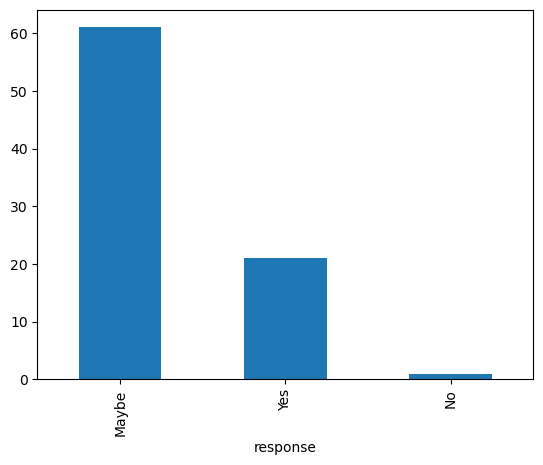

In [ ]:
df_es["response"].value_counts().plot(kind='bar')

In [ ]:
is_there_a_good_market(df_es)

Percentage of 'Yes' responses: 25.30%
Percentage of 'No' responses: 1.20%
Percentage of 'Maybe' responses: 73.49%
Percentage of 'N/A' responses: 0.00%
VERDICT: There is a good market for bottled gazpacho.


True

So how the target market compares with the Spanish benchmark?

In [ ]:
# compare df with df_es

# % of yes
percentage_yes = df["response"].value_counts(normalize=True).get("Yes", 0)
percentage_yes_es = df_es["response"].value_counts(normalize=True).get("Yes", 0)
print(f"Percentage of 'Yes' responses in the target market: {percentage_yes:.2%}")
print(f"Percentage of 'Yes' responses in Spain: {percentage_yes_es:.2%}")
# how much more likely are people in Spain to buy the product?
if percentage_yes != 0:
    print(f"Spanish people are {percentage_yes_es / percentage_yes:.2f} times more likely to buy the product.")

# % of no
percentage_no = df["response"].value_counts(normalize=True).get("No", 0)
percentage_no_es = df_es["response"].value_counts(normalize=True).get("No", 0)
print(f"Percentage of 'No' responses in the target market: {percentage_no:.2%}")
print(f"Percentage of 'No' responses in Spain: {percentage_no_es:.2%}")
# how much more likely are people in Spain to not buy the product?
if percentage_no != 0:
    print(f"Spanish people are {percentage_no_es / percentage_no:.2f} times more likely to not buy the product.")

Percentage of 'Yes' responses in the target market: 7.00%
Percentage of 'Yes' responses in Spain: 25.30%
Spanish people are 3.61 times more likely to buy the product.
Percentage of 'No' responses in the target market: 3.00%
Percentage of 'No' responses in Spain: 1.20%
Spanish people are 0.40 times more likely to not buy the product.


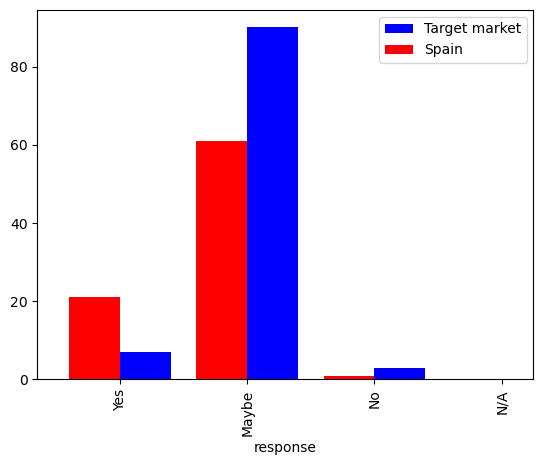

In [ ]:
# compare charts. Put both bars in the same plot, for easier comparison
# Need to order the labels in the chart.
fig, ax = plt.subplots()
df["response"].value_counts().reindex(["Yes", "Maybe", "No", "N/A"]).plot(kind='bar', color='blue', position=0, width=0.4, label="Target market", ax=ax)
df_es["response"].value_counts().reindex(["Yes", "Maybe", "No", "N/A"]).plot(kind='bar', color='red', position=1, width=0.4, label="Spain", ax=ax)
plt.legend()
plt.show()


## Other countries

Should we compute other nationalities? This might take a while, so we leave it as an option.

In [ ]:
if not compute_other_nationalities:
    control.end()
    raise KeyboardInterrupt

Here's a convenience function to perform the same analysis for other countries more easily.

In [ ]:
def market_research_simulation(nationality, population_size, results_extractor):
    factory = TinyPersonFactory(general_context(nationality=nationality))
    people = factory.generate_people(population_size, verbose=True)
    market = TinyWorld(f"Target audience ({nationality})", people, broadcast_if_no_target=False)
    control.checkpoint()

    market.broadcast(interviewer_introduction)
    market.broadcast(interviewer_main_question)
    market.run(1)
    control.checkpoint()
    
    results = results_extractor.extract_results_from_agents(people)
    df = pd.DataFrame(results)

    return df


### Brazil

In [ ]:
df_br = market_research_simulation("Brazilian", 
                                   population_size=population_size, 
                                   results_extractor=results_extractor)

Generated person 1/100: Lucas Almeida is a 28 year old Delivery Driver, Brazilian, currently living in Brazil. Lucas Almeida is not only dedicated to his work as a delivery driver but also possesses a vibrant personality that shines through in his interactions. He enjoys engaging with customers, often lightening the mood with his good sense of humor, even when faced with the stress of heavy traffic or difficult deliveries. Outside of work, Lucas is passionate about soccer and frequently plays with his childhood friend Carlos, while also exploring new culinary experiences and honing his guitar skills. His aspirations to delve into logistics and possibly start a small business reflect his ambition and desire for financial stability, which he navigates alongside the support of his girlfriend, Mariana.
Generated person 2/100: Fernanda Costa is a 52 year old School Teacher, Brazilian, currently living in Brazil. Fernanda Costa is not only a dedicated teacher but also a nurturing individual 

2024-11-28 12:51:53,557 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 12:51:53,557 - tinytroupe - ERROR - Could not generate person 53/100.


Generated person 54/100: Gabriel Costa-Souza da Silva is a 36 year old Delivery Driver, Brazilian, currently living in Brazil. Gabriel is not only dedicated to his work as a delivery driver but also possesses a vibrant personality that shines through in his interactions with customers. His friendly demeanor and great sense of humor help him navigate the pressures of his job, making even the busiest days more enjoyable. Outside of work, he finds joy in cooking traditional Brazilian dishes, often experimenting with new recipes that reflect his cultural heritage. Additionally, Gabriel's passion for soccer keeps him active and connected with friends like Carlos, while his supportive girlfriend Mariana inspires him to explore entrepreneurial opportunities in logistics management.
Generated person 55/100: Rafael Costa-Souza da Silva is a 41 year old Unemployed, Brazilian, currently living in Brazil. Rafael Costa-Souza da Silva is a resilient individual who, despite the challenges of unemploy

2024-11-28 13:01:52,910 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 13:01:52,911 - tinytroupe - ERROR - Could not generate person 78/100.
2024-11-28 13:02:40,320 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 13:02:40,321 - tinytroupe - ERROR - Could not generate person 79/100.
2024-11-28 13:03:30,034 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 13:03:30,034 - tinytroupe - ERROR - Could not generate person 80/100.
2024-11-28 13:04:17,848 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 13:04:17,849 - tinytroupe - ERROR - Could not generate person 81/100.
2024-11-28 13:05:05,885 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 13:05:05,886 - tinytroupe - ERROR - Could not generate person 82/100.
2024-11-28 13:05:57,245 - tinytroupe - ERROR - Could not generate an agent after 5 attempts.
2024-11-28 13:05:57,246 - tinytroupe 

USER --> Lucas Almeida: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please present yourself and also list your top-10 interests?

       + --> Fernanda Costa

       + --> Carlos Silva

       + --> ...others...

USER --> Lucas Almeida: [CONVERSATION] 
          >       Would you buy bottled gazpacho if you went to the supermarket today? Why yes, or
          > why not?      Please be honest, we are not here to judge you, but just to learn from
          > you.      We know these choices depend on many factors, but please make your best guess,
          > consider your current      situation in life, location, job and interests, and tell us
          > whether you would buy bottled gazpacho      or not. To make it easier, start your
          > response with "Yes, ", "No, " or "Maybe, ".

       + --> Fernanda Costa

       + --> Carlos Silva

       + --> ...others...

───────────────────────────────────── Target audience (Brazilian) step 1 of 1 ─────────────────────────────────────

Lucas Almeida acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Lucas Almeida acts: [THINK] 
                   > I need to introduce myself. My name is Lucas Almeida, I'm 28 years old, and I
                   > work as a delivery driver in São Paulo, Brazil. I enjoy playing soccer, trying
                   > new restaurants, and playing guitar. Now I need to list my top-10 interests: 1.
                   > Playing soccer, 2. Trying new cuisines, 3. Playing guitar, 4. Learning about
                   > logistics, 5. Exploring customer service roles, 6. Starting a small business,
                   > 7. Watching TV shows, 8. Playing video games, 9. Spending time with friends and
                   > family, 10. Listening to music.

Lucas Almeida acts: [TALK] 
                   > Hello! My name is Lucas Almeida, I'm 28 years old, and I work as a delivery
                   > driver here in São Paulo, Brazil. I have a variety of interests that keep me
                   > busy. Here are my top-10 interests: 1. Playing soccer, 2. Trying new cuisines,
                   > 3. Playing guitar, 4. Learning about logistics, 5. Exploring customer service
                   > roles, 6. Starting a small business, 7. Watching TV shows, 8. Playing video
                   > games, 9. Spending time with friends and family, and 10. Listening to music.

Lucas Almeida acts: [THINK] 
                   > Now I need to respond to the gazpacho question. I should consider my current
                   > situation and preferences. Given that I enjoy trying new foods, I might be open
                   > to buying bottled gazpacho, especially if it's convenient and fits my budget.

Lucas Almeida acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                   > I enjoy trying new foods, and gazpacho sounds refreshing, especially in this
                   > warm weather. However, it would depend on the price and whether it looks
                   > appealing. If it's affordable and looks good, I might give it a try!

Lucas Almeida acts: [DONE] 

Fernanda Costa acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation,
                    > location, job, and interests.

Fernanda Costa acts: [TALK] 
                    > Hello! My name is Fernanda Costa, I'm 52 years old, and I live in São Paulo,
                    > Brazil. I have been a school teacher for over 25 years, focusing on Portuguese
                    > and literature. I am passionate about education and strive to inspire my
                    > students. Here are my top-10 interests: 1. Educational reform, 2. New teaching
                    > strategies, 3. Literature, especially Brazilian authors, 4. Gardening, 5.
                    > Cooking traditional Brazilian dishes, 6. Reading novels, 7. Attending
                    > workshops on education, 8. Helping students who struggle with their studies,
                    > 9. Advocating for students' rights, and 10. Spending time with my family.

Fernanda Costa acts: [THINK] 
                    > Now I need to respond to the question about whether I would buy bottled
                    > gazpacho. I should consider my current situation, including my interests and
                    > lifestyle.

Fernanda Costa acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I found it appealing and
                    > convenient. Given my busy schedule as a teacher, I often look for quick meal
                    > options. However, I also enjoy making traditional dishes at home, so it would
                    > depend on the quality and taste of the bottled gazpacho. If it seems like a
                    > healthy and tasty option, I might go for it today.

Fernanda Costa acts: [DONE] 

Carlos Silva acts: [THINK] 
                  > I need to introduce myself and list my top-10 interests. I should also consider
                  > whether I would buy bottled gazpacho based on my current situation and
                  > preferences.

Carlos Silva acts: [TALK] 
                  > Hello! My name is Carlos Silva, I'm 34 years old, and I work as a construction
                  > worker in São Paulo, Brazil. I specialize in masonry and take pride in building
                  > homes and commercial spaces. Here are my top-10 interests: 1. Playing soccer
                  > with friends, 2. Cooking traditional Brazilian dishes, 3. Playing the guitar, 4.
                  > Learning about sustainable building practices, 5. Improving my project
                  > management skills, 6. Spending time with my wife Ana, 7. Collaborating with my
                  > best friend Roberto on projects, 8. Enjoying music, 9. Meeting friends at the
                  > local bar after work, and 10. Staying updated on construction safety practices.

Carlos Silva acts: [THINK] 
                  > Now I need to respond to the gazpacho question. I should consider my current
                  > situation and preferences before making a decision.

Carlos Silva acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho. It sounds refreshing and could
                  > be a quick meal option, especially after a long day at work. However, I also
                  > enjoy making my own food, so it would depend on how I feel that day and if I
                  > have the time to prepare something fresh myself.

Carlos Silva acts: [DONE] 

Tatiane Oliveira acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences.

Tatiane Oliveira acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences. My name is Tatiane Oliveira, I'm 40 years old, and I work
                      > as an administrative assistant in a law firm. My interests include reading
                      > novels, cooking traditional Brazilian dishes, spending time at the beach
                      > with my family, improving my office management skills, learning about legal
                      > procedures, networking with professionals in the legal field, and enjoying
                      > mysteries and thrillers.

Tatiane Oliveira acts: [TALK] 
                      > Hello, my name is Tatiane Oliveira. I'm 40 years old and I work as an
                      > administrative assistant in a law firm. Here are my top-10 interests: 1.
                      > Reading novels, especially mysteries and thrillers; 2. Cooking traditional
                      > Brazilian dishes; 3. Spending weekends at the beach with my family; 4.
                      > Improving my skills in office management; 5. Learning more about legal
                      > procedures; 6. Networking with other professionals in the legal field; 7.
                      > Helping clients and keeping everything organized; 8. Taking walks during
                      > lunch breaks to clear my mind; 9. Advocating for fairness in my workplace;
                      > 10. Enjoying family gatherings.

Tatiane Oliveira acts: [THINK] 
                      > Now that I've introduced myself and listed my interests, I need to respond
                      > to the gazpacho question. I should consider my current situation and
                      > preferences before answering.

Tatiane Oliveira acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy trying new foods, and it could be a refreshing option
                      > for a quick meal. However, it would depend on the price and whether it looks
                      > appealing. Since I have two children, convenience is important to me, but I
                      > also prefer fresh ingredients when possible.

Tatiane Oliveira acts: [DONE] 

Rafael Almeida da Silva acts: [TALK] 
                             > Hello! I'm Rafael Almeida da Silva, a 29-year-old freelance graphic
                             > designer from São Paulo, Brazil. I enjoy creating visual content for
                             > marketing campaigns and social media. My top-10 interests include: 1.
                             > Graphic design, 2. Digital marketing, 3. Photography, 4. Art
                             > exhibitions, 5. Cooking new recipes, 6. Collaborating with other
                             > creatives, 7. Exploring new software tools, 8. Jogging, 9. Meeting
                             > friends at cafés, and 10. Staying updated with design trends.

Rafael Almeida da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I went to the
                             > supermarket today. It really depends on a few factors like my mood,
                             > whether I'm looking for something quick and refreshing, and if I have
                             > the budget for it. I enjoy trying new foods, especially healthy
                             > options, so it could be a good choice for me.

Rafael Almeida da Silva acts: [TALK] 
                             > Hello! I'm Rafael Almeida da Silva, a 29-year-old freelance graphic
                             > designer from São Paulo, Brazil. I enjoy creating visual content for
                             > marketing campaigns and social media. My top-10 interests include: 1.
                             > Graphic design, 2. Digital marketing, 3. Photography, 4. Art
                             > exhibitions, 5. Cooking new recipes, 6. Collaborating with other
                             > creatives, 7. Exploring new software tools, 8. Jogging, 9. Meeting
                             > friends at cafés, and 10. Staying updated with design trends.

       + --> 

       + --> 

Juliana Santos acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation
                    > and preferences.

Juliana Santos acts: [THINK] 
                    > I need to introduce myself. My name is Juliana Santos, I'm 33 years old, and I
                    > work as a nurse in São Paulo, Brazil. I should also list my top-10 interests
                    > clearly. After that, I will respond to the gazpacho question based on my
                    > current situation and preferences.

Juliana Santos acts: [TALK] 
                    > Hello! My name is Juliana Santos, I'm 33 years old, and I work as a nurse in
                    > São Paulo, Brazil. Here are my top-10 interests: 1. Pediatric nursing, 2.
                    > Mental health care, 3. Community health initiatives, 4. Cooking traditional
                    > Brazilian dishes, 5. Hiking and exploring nature, 6. Photography, 7. Reading
                    > books, 8. Watching my favorite series, 9. Volunteering for health-related
                    > causes, and 10. Learning new recipes.

Juliana Santos acts: [THINK] 
                    > Now that I've introduced myself and listed my interests, I need to respond to
                    > the gazpacho question. I should consider my current situation and preferences
                    > before answering.

Juliana Santos acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                    > especially in the warm climate here in Brazil. However, it would depend on the
                    > price and whether it looks appealing. If I had time to make it myself, I might
                    > prefer that instead.

Juliana Santos acts: [DONE] 

Fernando Ribeiro acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences.

Fernando Ribeiro acts: [THINK] 
                      > I need to present myself clearly. My name is Fernando Ribeiro, I'm 50 years
                      > old, and I work as a factory worker in São Paulo, Brazil. I should also list
                      > my interests, which include learning about machinery maintenance, fishing on
                      > weekends, and watching soccer matches with my family. After that, I will
                      > respond to the gazpacho question based on my current situation.

Fernando Ribeiro acts: [TALK] 
                      > Hello, my name is Fernando Ribeiro. I'm 50 years old and I work as a factory
                      > worker in São Paulo, Brazil. I take pride in my job, even though it can be
                      > physically demanding. My interests include learning more about machinery
                      > maintenance, fishing on weekends to relax, and watching soccer matches with
                      > my family. I also enjoy spending time with my wife Maria and supporting my
                      > son Lucas in his engineering studies.

Fernando Ribeiro acts: [THINK] 
                      > Now I need to respond to the gazpacho question. I should consider my current
                      > situation and preferences. Given my lifestyle and interests, I might have a
                      > preference for fresh food over bottled options, but I should think about
                      > convenience as well.

Fernando Ribeiro acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if it seemed convenient and
                      > tasty. However, I generally prefer fresh food, especially since I enjoy
                      > cooking at home. If I saw a good brand that looked appealing, I might give
                      > it a try, but it would depend on the price and quality.

Fernando Ribeiro acts: [DONE] 

Mariana Costa-Souza acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Mariana Costa-Souza acts: [TALK] 
                         > Hello! My name is Mariana Costa-Souza. I'm 38 years old and I live in São
                         > Paulo, Brazil. I'm a single mother of two wonderful kids, Lucas and Ana.
                         > I work part-time as a waitress in a local diner, which keeps me busy but
                         > allows me to spend time with my children. Here are my top-10 interests:
                         > 1. Cooking traditional Brazilian dishes, 2. Reading romance novels, 3.
                         > Watching movies with my kids, 4. Improving my customer service skills, 5.
                         > Learning about nutrition, 6. Spending time outdoors at the park, 7.
                         > Exploring new recipes, 8. Engaging in family activities at home, 9.
                         > Playing soccer with Lucas, and 10. Encouraging Ana's drawing and painting
                         > skills.

Mariana Costa-Souza acts: [THINK] 
                         > Now that I've introduced myself and shared my interests, I need to think
                         > about my response to the gazpacho question. I should consider my current
                         > situation and preferences before answering.

Mariana Costa-Souza acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. It sounds like a refreshing option, especially since I often
                         > look for quick and healthy meal solutions for my family. However, it
                         > would depend on the price and whether it fits into my budget at the
                         > moment.

Mariana Costa-Souza acts: [DONE] 

Roberto Almeida da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Roberto Almeida da Silva acts: [TALK] 
                              > Hello, my name is Roberto Almeida da Silva. I am 45 years old and I
                              > work as a security guard in São Paulo. My interests include playing
                              > soccer, cooking traditional Brazilian dishes like feijoada, learning
                              > about personal safety techniques, and spending time with my family.
                              > I also enjoy watching soccer matches and would like to explore
                              > opportunities for advancement in my field.

Roberto Almeida da Silva acts: [THINK] 
                              > Now I need to consider whether I would buy bottled gazpacho. I
                              > should think about my current situation, my job, and my interests to
                              > make an informed decision.

Roberto Almeida da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I felt like
                              > having something refreshing and easy to prepare. However, it would
                              > depend on my mood and whether I have other meal options at home.
                              > Since I enjoy cooking, I might prefer to make something from scratch
                              > instead.

Roberto Almeida da Silva acts: [DONE] 

Ana Beatriz Lima acts: [TALK] 
                      > Hello! I'm Ana Beatriz Lima, a 27-year-old social media manager from São
                      > Paulo, Brazil. I enjoy creating engaging content and analyzing social media
                      > metrics. Here are my top-10 interests: 1. Photography, 2. Cooking, 3.
                      > Hiking, 4. Digital marketing, 5. Influencer marketing, 6. Data analytics, 7.
                      > Documentaries, 8. Traveling, 9. Graphic design, 10. Networking with
                      > professionals in my field.

Ana Beatriz Lima acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                      > especially in the warm climate here in Brazil. However, it would depend on
                      > the price and whether it looks appealing. If it's too expensive or doesn't
                      > seem fresh, I might skip it.

Ana Beatriz Lima acts: [TALK] 
                      > Hello! I'm Ana Beatriz Lima, a 27-year-old social media manager from São
                      > Paulo, Brazil. I enjoy creating engaging content and analyzing social media
                      > metrics. Here are my top-10 interests: 1. Photography, 2. Cooking, 3.
                      > Hiking, 4. Digital marketing, 5. Influencer marketing, 6. Data analytics, 7.
                      > Documentaries, 8. Traveling, 9. Graphic design, 10. Networking with
                      > professionals in my field.

       + --> 

       + --> 

Felipe Andrade acts: [THINK] 
                    > I need to introduce myself and list my top-10 interests. I should also
                    > consider whether I would buy bottled gazpacho based on my current situation.

Felipe Andrade acts: [TALK] 
                    > Hello! My name is Felipe Andrade, I'm 42 years old, and I live in São Paulo,
                    > Brazil. I'm a taxi driver, and I enjoy meeting new people every day. Here are
                    > my top-10 interests: 1. Playing soccer with friends, 2. Cooking traditional
                    > Brazilian dishes, 3. Listening to samba music, 4. Learning about customer
                    > service, 5. Exploring opportunities for becoming an independent driver, 6.
                    > Spending time with my family, 7. Watching soccer matches, 8. Chatting with
                    > fellow drivers at the café, 9. Discovering new places in São Paulo, and 10.
                    > Engaging in conversations with my passengers.

Felipe Andrade acts: [THINK] 
                    > Now that I've introduced myself and shared my interests, I need to consider
                    > whether I would buy bottled gazpacho. Given my current situation, I think
                    > about my lifestyle and preferences.

Felipe Andrade acts: [TALK] 
                    > Maybe, I would consider buying bottled gazpacho if I saw it in the
                    > supermarket. I enjoy trying new foods, and it could be a refreshing option,
                    > especially during the warmer months. However, it would depend on the price and
                    > whether I feel like making my own gazpacho at home instead.

Felipe Andrade acts: [DONE] 

Gabriela Nascimento acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Gabriela Nascimento acts: [TALK] 
                         > Hello! My name is Gabriela Nascimento, I'm 31 years old, and I live in
                         > São Paulo, Brazil. I work as a sales associate in a supermarket. Here are
                         > my top-10 interests: 1. Baking, 2. Gardening, 3. Spending time with
                         > family, 4. Cooking new recipes, 5. Learning about customer service
                         > strategies, 6. Exploring marketing trends, 7. Going to local parks, 8.
                         > Watching movies at home, 9. Listening to music while cooking, and 10.
                         > Trying out new coffee blends.

Gabriela Nascimento acts: [THINK] 
                         > Now I need to consider whether I would buy bottled gazpacho today. I
                         > should think about my current situation, preferences, and how it fits
                         > into my lifestyle.

Gabriela Nascimento acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho today. It sounds
                         > refreshing and convenient, especially if I'm looking for a quick meal
                         > option. However, it would depend on the price and whether I find a flavor
                         > that I like. Since I enjoy cooking, I might also prefer making my own
                         > gazpacho at home with fresh ingredients from my garden.

Gabriela Nascimento acts: [DONE] 

Ricardo Almeida da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Ricardo Almeida da Silva acts: [THINK] 
                              > I need to introduce myself. My name is Ricardo Almeida da Silva, I'm
                              > 55 years old, and I live in São Paulo, Brazil. I am a retired
                              > factory worker who enjoys gardening, volunteering, and cooking. Now,
                              > I should list my top-10 interests: 1) Gardening, 2) Cooking
                              > traditional Brazilian dishes, 3) Fishing with friends, 4) Mentoring
                              > young people, 5) Discussing labor rights, 6) Advocating for
                              > sustainable practices in manufacturing, 7) Watching soccer matches,
                              > 8) Reading history books, 9) Spending time with my family, and 10)
                              > Organizing community events.

Ricardo Almeida da Silva acts: [TALK] 
                              > Hello, my name is Ricardo Almeida da Silva. I'm 55 years old and I
                              > live in São Paulo, Brazil. I am a retired factory worker who
                              > dedicated over 30 years to the automotive industry. I enjoy
                              > gardening, cooking traditional Brazilian dishes, fishing with
                              > friends, mentoring young people, discussing labor rights, advocating
                              > for sustainable practices in manufacturing, watching soccer matches,
                              > reading history books, spending time with my family, and organizing
                              > community events.

Ricardo Almeida da Silva acts: [THINK] 
                              > Now I need to respond to the gazpacho question. I should consider my
                              > current situation and preferences. Given that I enjoy cooking and
                              > trying new foods, I might be open to buying bottled gazpacho,
                              > especially if it's a convenient option. However, I also prefer fresh
                              > ingredients from my garden. I will weigh these factors in my
                              > response.

Ricardo Almeida da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket. I enjoy cooking and trying new foods, but I also prefer
                              > fresh ingredients from my garden. If the bottled version is
                              > convenient and tastes good, I might give it a try.

Ricardo Almeida da Silva acts: [DONE] 

Claudio Pereira da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Claudio Pereira da Silva acts: [TALK] 
                              > Hello! My name is Claudio Pereira da Silva, I'm 60 years old and I
                              > live in São Paulo, Brazil. I am a retired bus driver with over 30
                              > years of experience in public transport. I enjoy gardening, cooking
                              > traditional Brazilian dishes, and playing dominoes with friends.
                              > Here are my top-10 interests: 1. Gardening, 2. Cooking, especially
                              > feijoada, 3. Playing dominoes, 4. Community service initiatives for
                              > public transport, 5. Discussing transportation policies, 6. Watching
                              > soccer matches, 7. Spending time with family, 8. Sharing stories
                              > from my driving days, 9. Learning about new recipes, and 10.
                              > Participating in local tournaments.

Claudio Pereira da Silva acts: [THINK] 
                              > Now that I've introduced myself and listed my interests, I need to
                              > consider whether I would buy bottled gazpacho. I should think about
                              > my current lifestyle and preferences.

Claudio Pereira da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I felt like
                              > having something refreshing and easy to prepare. However, I usually
                              > prefer making my own dishes at home, especially traditional
                              > Brazilian meals. It really depends on my mood and what I have
                              > planned for the day.

Claudio Pereira da Silva acts: [DONE] 

Patricia Gomes da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Patricia Gomes da Silva acts: [TALK] 
                             > Hello, my name is Patricia Gomes da Silva. I am 48 years old and I
                             > work as a housekeeper in São Paulo. I take pride in my work and enjoy
                             > taking care of the household chores. Here are my top-10 interests: 1.
                             > Gardening, 2. Cooking traditional Brazilian cuisine, 3. Listening to
                             > samba and bossa nova music, 4. Spending time with my grandchildren,
                             > 5. Learning about business management, 6. Improving my cooking skills
                             > for catering, 7. Visiting local markets for fresh produce, 8.
                             > Connecting with my family over the phone, 9. Reading about home
                             > organization tips, and 10. Volunteering in community events.

Patricia Gomes da Silva acts: [THINK] 
                             > Now I need to answer the question about whether I would buy bottled
                             > gazpacho. I should consider my current situation, my job, and my
                             > interests before making a decision.

Patricia Gomes da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I felt like having
                             > something refreshing and easy to prepare. However, I usually prefer
                             > making my own meals from fresh ingredients, especially since I enjoy
                             > cooking. It also depends on my budget and whether I find it on sale
                             > at the supermarket. If it's too expensive, I might skip it and make
                             > something else at home instead.

Patricia Gomes da Silva acts: [DONE] 

Roberta Almeida da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation.

Roberta Almeida da Silva acts: [TALK] 
                              > Hello! My name is Roberta Almeida da Silva, I'm 37 years old, and I
                              > live in São Paulo, Brazil. I'm a single mother of two children. My
                              > top-10 interests include: 1. Cooking, especially trying new recipes
                              > for my kids; 2. Reading novels; 3. Listening to samba and MPB music;
                              > 4. Learning new cleaning techniques; 5. Spending time outdoors with
                              > my children; 6. Exploring opportunities in childcare or education;
                              > 7. Engaging in science projects with my son; 8. Drawing and dancing
                              > with my daughter; 9. Budgeting and finding ways to save money; 10.
                              > Organizing fun activities at home.

Roberta Almeida da Silva acts: [THINK] 
                              > Now that I've introduced myself and listed my interests, I need to
                              > answer the question about bottled gazpacho. I should consider my
                              > current situation and how it affects my decision.

Roberta Almeida da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket. It could be a convenient option for a quick meal,
                              > especially on busy days when I don't have much time to cook.
                              > However, I would also think about the price and whether it's worth
                              > it compared to making my own gazpacho at home. Since I'm currently
                              > managing my budget carefully, I'd need to weigh those factors before
                              > making a decision.

Roberta Almeida da Silva acts: [DONE] 

Eduardo Lima da Silva acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Eduardo Lima da Silva acts: [TALK] 
                           > Hello! My name is Eduardo Lima da Silva, I'm 39 years old, and I live
                           > in São Paulo, Brazil. I'm a mechanic and I work in a small auto repair
                           > shop. I take pride in my work and enjoy helping my customers. Here are
                           > my top-10 interests: 1. Learning about electric vehicles, 2. Attending
                           > workshops on automotive technologies, 3. Playing soccer with friends,
                           > 4. Cooking traditional Brazilian dishes, 5. Spending time with my
                           > family, 6. Watching soccer matches, 7. Exploring new car repair
                           > techniques, 8. Engaging in community events, 9. Traveling within
                           > Brazil, and 10. Reading about automotive innovations.

Eduardo Lima da Silva acts: [THINK] 
                           > Now I need to answer the question about bottled gazpacho. I should
                           > consider my current situation, preferences, and whether it fits into my
                           > lifestyle.

Eduardo Lima da Silva acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho. It could be a
                           > convenient option for a quick meal, especially since I sometimes feel
                           > overwhelmed after work. However, I also enjoy cooking traditional
                           > dishes, so it would depend on my mood and how much time I have. If I'm
                           > looking for something easy and refreshing, I might go for it.

Eduardo Lima da Silva acts: [DONE] 

Marcos Oliveira da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Marcos Oliveira da Silva acts: [TALK] 
                              > Hello! My name is Marcos Oliveira da Silva, I'm 46 years old, and I
                              > work as a warehouse manager in São Paulo, Brazil. Here are my top-10
                              > interests: 1. Improving warehouse efficiency, 2. Networking with
                              > logistics professionals, 3. Learning about logistics software, 4.
                              > Fishing on weekends, 5. Cooking traditional Brazilian dishes, 6.
                              > Watching soccer matches, 7. Spending time with my family, 8.
                              > Exploring new recipes, 9. Reading about logistics trends, and 10.
                              > Traveling when I can.

Marcos Oliveira da Silva acts: [THINK] 
                              > Now that I've introduced myself and shared my interests, I need to
                              > consider whether I would buy bottled gazpacho. I should think about
                              > my current situation, preferences, and the practicality of buying
                              > it.

Marcos Oliveira da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket. It depends on a few factors like the price, the brand,
                              > and whether it looks fresh. Since I enjoy cooking and trying new
                              > things, I might be curious to give it a try, especially if it's a
                              > convenient option for a quick meal.

Marcos Oliveira da Silva acts: [DONE] 

Tatiane Ferreira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Tatiane Ferreira da Silva acts: [TALK] 
                               > Hello! My name is Tatiane Ferreira da Silva, I'm 29 years old, and
                               > I'm from Brazil. I work as a barista in São Paulo, where I enjoy
                               > making coffee and interacting with customers. Here are my top-10
                               > interests: 1. Coffee brewing techniques, 2. Exploring new coffee
                               > shops, 3. Reading contemporary fiction, 4. Photography, 5. Latte
                               > art, 6. Learning about different coffee beans, 7. Spending time
                               > with friends, 8. Visiting local parks, 9. Cooking new recipes, and
                               > 10. Traveling.

Tatiane Ferreira da Silva acts: [THINK] 
                               > Now that I've introduced myself and shared my interests, I need to
                               > consider whether I would buy bottled gazpacho. I should think about
                               > my current lifestyle, preferences, and the context of my job as a
                               > barista.

Tatiane Ferreira da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I saw it in the
                               > supermarket. I enjoy trying new foods, and gazpacho sounds
                               > refreshing, especially in the warm climate here in Brazil. However,
                               > it would depend on the brand and ingredients. If it looked
                               > appealing and healthy, I might give it a try!

Tatiane Ferreira da Silva acts: [DONE] 

Felipe Costa-Souza acts: [THINK] 
                        > I need to introduce myself and list my top-10 interests. I should also
                        > consider whether I would buy bottled gazpacho based on my current
                        > situation and preferences.

Felipe Costa-Souza acts: [THINK] 
                        > I need to introduce myself. My name is Felipe Costa-Souza, I'm 55 years
                        > old, and I live in São Paulo, Brazil. I am a retired construction worker
                        > who enjoys volunteering and mentoring young people. Now, I should list my
                        > top-10 interests: 1. Sustainable building practices, 2. Mentoring young
                        > people in trades, 3. Fishing, 4. Watching soccer matches, 5. Gardening, 6.
                        > Cooking traditional Brazilian meals, especially feijoada, 7. Learning
                        > about new construction technologies, 8. Spending time with family, 9.
                        > Reading newspapers in the morning, and 10. Discussing sports with friends.

Felipe Costa-Souza acts: [TALK] 
                        > Hello, my name is Felipe Costa-Souza. I'm 55 years old and I live in São
                        > Paulo, Brazil. I am a retired construction worker who enjoys volunteering
                        > and mentoring young people. Here are my top-10 interests: 1. Sustainable
                        > building practices, 2. Mentoring young people in trades, 3. Fishing, 4.
                        > Watching soccer matches, 5. Gardening, 6. Cooking traditional Brazilian
                        > meals, especially feijoada, 7. Learning about new construction
                        > technologies, 8. Spending time with family, 9. Reading newspapers in the
                        > morning, and 10. Discussing sports with friends.

Felipe Costa-Souza acts: [THINK] 
                        > Now I need to respond to the gazpacho question. I should consider my
                        > current situation and preferences regarding bottled gazpacho.

Felipe Costa-Souza acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                        > especially in the warm climate here in São Paulo. However, I prefer
                        > homemade meals, so it would depend on the quality and ingredients of the
                        > bottled version. If it seems healthy and tasty, I might give it a try!

Felipe Costa-Souza acts: [DONE] 

Mariana Alves da Silva acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Mariana Alves da Silva acts: [THINK] 
                            > I need to present myself clearly and list my interests. I also need to
                            > think about whether I would buy bottled gazpacho or not, considering
                            > my current life situation.

Mariana Alves da Silva acts: [TALK] 
                            > Hello! My name is Mariana Alves da Silva, I'm 31 years old, and I work
                            > as a social worker in São Paulo, Brazil. I am passionate about helping
                            > underprivileged families and advocating for children's rights. Here
                            > are my top-10 interests: 1. Community development, 2. Mental health
                            > support, 3. Children's rights advocacy, 4. Reading novels about social
                            > issues, 5. Cooking traditional Brazilian dishes, 6. Volunteering at
                            > local shelters, 7. Attending community meetings, 8. Crisis
                            > intervention, 9. Conflict resolution, and 10. Connecting families with
                            > resources.

Mariana Alves da Silva acts: [THINK] 
                            > Now that I've introduced myself and listed my interests, I need to
                            > consider the gazpacho question. I should think about whether I would
                            > buy bottled gazpacho based on my current situation and preferences.

Mariana Alves da Silva acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I found it
                            > appealing and convenient. As a busy social worker and a mother, I
                            > often look for quick meal options that are healthy. However, I also
                            > enjoy making traditional dishes at home, so it would depend on my mood
                            > and the availability of fresh ingredients.

Mariana Alves da Silva acts: [DONE] 

Roberto Ferreira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Roberto Ferreira da Silva acts: [TALK] 
                               > Hello! My name is Roberto Ferreira da Silva, I'm 54 years old, and
                               > I work as a taxi driver in São Paulo. I enjoy connecting with
                               > people and hearing their stories. Here are my top-10 interests: 1.
                               > Cooking traditional Brazilian dishes, especially feijoada; 2.
                               > Playing soccer with friends; 3. Music, particularly playing the
                               > guitar; 4. Learning about customer service techniques; 5.
                               > Discussing local history and culture; 6. Exploring new technologies
                               > for driving efficiency; 7. Spending time with my wife Lucia; 8.
                               > Collaborating with my best friend Carlos on music gigs; 9.
                               > Listening to podcasts while driving; 10. Enjoying a good cup of
                               > coffee in the morning.

Roberto Ferreira da Silva acts: [THINK] 
                               > Now I need to answer the question about whether I would buy bottled
                               > gazpacho. I should consider my current situation, my job as a taxi
                               > driver, and my interests.

Roberto Ferreira da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I felt like
                               > having something refreshing and easy to prepare. However, it really
                               > depends on my mood and whether I have time to make something fresh
                               > at home. Since I enjoy cooking, I might prefer making my own
                               > gazpacho instead of buying it.

Roberto Ferreira da Silva acts: [DONE] 

Luciana Ferreira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Luciana Ferreira da Silva acts: [TALK] 
                               > Hello! My name is Luciana Ferreira da Silva, I'm 37 years old, and
                               > I live in São Paulo, Brazil. I'm a single mother and work part-time
                               > as a cleaner. Here are my top-10 interests: 1. Cooking traditional
                               > Brazilian dishes, 2. Reading romance and drama novels, 3.
                               > Gardening, 4. Learning about eco-friendly cleaning products, 5.
                               > Improving my cleaning skills, 6. Spending time with my children at
                               > the park, 7. Exploring opportunities for better-paying jobs, 8.
                               > Developing time management skills, 9. Experimenting with new
                               > recipes, and 10. Connecting with other single mothers for support.

Luciana Ferreira da Silva acts: [THINK] 
                               > Now that I've introduced myself and shared my interests, I need to
                               > consider whether I would buy bottled gazpacho. Given my current
                               > situation, I might be inclined to think about convenience and
                               > health.

Luciana Ferreira da Silva acts: [TALK] 
                               > Yes, I would consider buying bottled gazpacho if I went to the
                               > supermarket today. It seems like a convenient option for a quick
                               > meal, especially since I often juggle cooking for my kids and
                               > managing my time. However, I would also think about the price and
                               > whether it fits into my budget right now.

Luciana Ferreira da Silva acts: [DONE] 

Thiago Almeida da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Thiago Almeida da Silva acts: [THINK] 
                             > I need to present myself clearly and list my top-10 interests. I
                             > should also think about my purchasing habits regarding bottled
                             > gazpacho, considering my current lifestyle and preferences.

Thiago Almeida da Silva acts: [TALK] 
                             > Hello! My name is Thiago Almeida da Silva, I'm 24 years old, and I'm
                             > currently a university student majoring in Environmental Science. I
                             > have a strong passion for sustainability and often participate in
                             > activities focused on environmental awareness. Here are my top-10
                             > interests: 1. Renewable energy solutions, 2. Sustainable practices,
                             > 3. Environmental policy and advocacy, 4. Conservation efforts, 5.
                             > Hiking and exploring nature, 6. Cooking healthy meals, 7.
                             > Photography, especially landscapes, 8. Volunteering for environmental
                             > causes, 9. Research methods in environmental studies, and 10. Social
                             > media for awareness campaigns.

Thiago Almeida da Silva acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > consider whether I would buy bottled gazpacho. I should think about
                             > my current lifestyle, preferences, and the factors that influence my
                             > purchasing decisions.

Thiago Almeida da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I found it
                             > appealing and convenient. Since I enjoy cooking healthy meals, I
                             > might be interested in trying it as a quick option. However, I also
                             > prefer fresh ingredients and might lean towards making my own
                             > gazpacho instead. It really depends on my mood and how busy I am
                             > today.

Thiago Almeida da Silva acts: [DONE] 

Gabriel Costa-Souza acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Gabriel Costa-Souza acts: [TALK] 
                         > Hello! My name is Gabriel Costa-Souza, I'm 39 years old, and I live in
                         > São Paulo, Brazil. I work as a warehouse worker at a logistics company.
                         > My top-10 interests include: 1. Playing soccer, 2. Cooking traditional
                         > Brazilian dishes, 3. Experimenting with new recipes, 4. Listening to
                         > samba music, 5. Learning about logistics management, 6. Improving my
                         > skills in inventory management software, 7. Spending time with my family,
                         > 8. Barbecuing with friends, 9. Helping my children with their homework,
                         > and 10. Enjoying outdoor activities.

Gabriel Costa-Souza acts: [THINK] 
                         > Now that I've introduced myself and listed my interests, I need to
                         > consider whether I would buy bottled gazpacho. I should think about my
                         > current situation, including my job and family life.

Gabriel Costa-Souza acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. It depends on a few factors like the price, the ingredients,
                         > and whether it looks fresh. Since I enjoy cooking and trying new things,
                         > I might be tempted to give it a try, especially if it's something my
                         > family would enjoy too.

Gabriel Costa-Souza acts: [DONE] 

Patricia Almeida da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

       + --> 

Patricia Almeida da Silva acts: [TALK] 
                               > Hello! My name is Patricia Almeida da Silva, I'm 46 years old, and
                               > I live in São Paulo, Brazil. I work as a housekeeper and take pride
                               > in my work. Here are my top-10 interests: 1. Gardening, 2. Cooking
                               > traditional Brazilian dishes, 3. Listening to samba music, 4.
                               > Reading novels about family and resilience, 5. Learning new
                               > cleaning techniques, 6. Spending time with my family, 7. Exploring
                               > professional development opportunities in home management, 8.
                               > Enjoying coffee breaks while catching up on chores, 9. Building
                               > rapport with clients, and 10. Sharing tips with my best friend
                               > Maria who is also a housekeeper.

Patricia Almeida da Silva acts: [THINK] 
                               > Now that I've introduced myself and shared my interests, I need to
                               > consider whether I would buy bottled gazpacho. I should think about
                               > my current situation, including my job and interests.

Patricia Almeida da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I found it
                               > appealing and convenient. Since I enjoy cooking and preparing
                               > meals, I might prefer making my own gazpacho with fresh ingredients
                               > from my garden. However, if I'm short on time or looking for a
                               > quick meal option, bottled gazpacho could be a good choice. It
                               > really depends on my schedule and how I'm feeling that day.

Patricia Almeida da Silva acts: [DONE] 

Marcio Ribeiro da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Marcio Ribeiro da Silva acts: [THINK] 
                             > I should start by introducing myself. My name is Marcio Ribeiro da
                             > Silva, I'm 50 years old, and I work as a bus driver in São Paulo.
                             > Now, I need to list my top-10 interests. They include: 1) playing
                             > soccer, 2) cooking traditional Brazilian dishes, especially feijoada,
                             > 3) learning about urban transportation systems, 4) attending
                             > workshops on customer service, 5) spending time with my
                             > grandchildren, 6) chatting with fellow drivers about sports and local
                             > news, 7) watching soccer matches, 8) exploring new recipes, 9)
                             > reading about public transport improvements, and 10) engaging in
                             > community events.

Marcio Ribeiro da Silva acts: [TALK] 
                             > Hello! My name is Marcio Ribeiro da Silva, I'm 50 years old, and I
                             > work as a bus driver in São Paulo. Here are my top-10 interests: 1)
                             > playing soccer, 2) cooking traditional Brazilian dishes like
                             > feijoada, 3) learning about urban transportation systems, 4)
                             > attending workshops on customer service, 5) spending time with my
                             > grandchildren, 6) chatting with fellow drivers about sports and local
                             > news, 7) watching soccer matches, 8) exploring new recipes, 9)
                             > reading about public transport improvements, and 10) engaging in
                             > community events.

Marcio Ribeiro da Silva acts: [THINK] 
                             > Now I need to answer the question about bottled gazpacho. Considering
                             > my current situation, I think about whether I would buy it or not. I
                             > enjoy cooking and trying new foods, but I'm not sure if bottled
                             > gazpacho fits into my usual meals. I should weigh the convenience
                             > against my preference for fresh food.

Marcio Ribeiro da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I saw it in the
                             > supermarket. I enjoy trying new foods, but I usually prefer fresh
                             > ingredients. If it seemed convenient and tasty, I might give it a
                             > try, especially on a hot day when I'm looking for something
                             > refreshing.

Marcio Ribeiro da Silva acts: [DONE] 

Ana Clara Ribeiro da Silva acts: [THINK] 
                                > I need to introduce myself and list my top-10 interests. I should
                                > also consider whether I would buy bottled gazpacho based on my
                                > current situation, location, job, and interests.

Ana Clara Ribeiro da Silva acts: [TALK] 
                                > Hello! My name is Ana Clara Ribeiro da Silva, I'm 29 years old,
                                > and I work as a Marketing Specialist in São Paulo, Brazil. I enjoy
                                > creating engaging content and analyzing market trends. Here are my
                                > top-10 interests: 1. Digital marketing strategies, 2. Data
                                > analytics, 3. Influencer marketing, 4. Cooking and experimenting
                                > with new recipes, 5. Painting, 6. Traveling and exploring new
                                > cultures, 7. Attending workshops on marketing trends, 8. Hosting
                                > dinner parties for friends, 9. Watching my favorite series, and
                                > 10. Taking walks in the park to clear my mind.

Ana Clara Ribeiro da Silva acts: [THINK] 
                                > Now that I've introduced myself and listed my interests, I need to
                                > respond to the gazpacho question. I should consider my current
                                > situation and preferences before answering.

Ana Clara Ribeiro da Silva acts: [TALK] 
                                > Maybe, I would consider buying bottled gazpacho if I saw it in the
                                > supermarket. I enjoy trying new foods, and gazpacho sounds
                                > refreshing, especially in a warm climate like Brazil. However, it
                                > would depend on the price and whether it looks appealing. If I
                                > have time to make it from scratch, I might prefer that instead.

Ana Clara Ribeiro da Silva acts: [DONE] 

Gabriela Almeida da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Gabriela Almeida da Silva acts: [TALK] 
                               > Hello! My name is Gabriela Almeida da Silva, I'm 34 years old, and
                               > I live in São Paulo, Brazil. I work as an Administrative
                               > Coordinator at a logistics company. Here are my top-10 interests:
                               > 1. Cooking traditional Brazilian dishes, 2. Reading historical
                               > fiction novels, 3. Exploring new software solutions for workplace
                               > efficiency, 4. Attending workshops on leadership and team
                               > management, 5. Spending time outdoors with my family, 6.
                               > Experimenting with new recipes, 7. Taking nature hikes on weekends,
                               > 8. Visiting local markets, 9. Improving communication tools at
                               > work, and 10. Helping my children with their homework.

Gabriela Almeida da Silva acts: [THINK] 
                               > Now that I've introduced myself and shared my interests, I need to
                               > consider whether I would buy bottled gazpacho. I should think about
                               > my current lifestyle, preferences, and the convenience of buying
                               > it.

Gabriela Almeida da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I were in the
                               > mood for something refreshing and easy to prepare. Given my busy
                               > schedule as an Administrative Coordinator, convenience is important
                               > to me. However, I also enjoy making fresh meals at home, so it
                               > would depend on how much time I have and whether I feel like
                               > cooking or not.

Gabriela Almeida da Silva acts: [DONE] 

Roberto Nascimento da Silva acts: [THINK] 
                                 > I need to introduce myself and list my top-10 interests. I should
                                 > also consider whether I would buy bottled gazpacho based on my
                                 > current situation and preferences.

Roberto Nascimento da Silva acts: [TALK] 
                                 > Hello, my name is Roberto Nascimento da Silva. I am 41 years old
                                 > and I work as a construction supervisor in São Paulo, Brazil. I
                                 > take pride in my work and enjoy leading my team on various
                                 > building projects. Here are my top-10 interests: 1. Learning
                                 > about new construction technologies, 2. Sustainable building
                                 > practices, 3. Networking with other professionals in the
                                 > construction industry, 4. Cooking traditional Brazilian dishes,
                                 > 5. Playing soccer with friends, 6. Woodworking and creating
                                 > furniture, 7. Spending time with my family, 8. Watching soccer
                                 > matches, 9. Reading about architecture, and 10. Traveling to
                                 > explore new cultures.

Roberto Nascimento da Silva acts: [THINK] 
                                 > Now that I've introduced myself and listed my interests, I need
                                 > to consider whether I would buy bottled gazpacho. Given my
                                 > current situation, I think about my lifestyle and preferences. I
                                 > enjoy cooking and trying new foods, but I also value fresh
                                 > ingredients. Bottled gazpacho might not appeal to me as much as
                                 > making it from scratch, especially since I love cooking
                                 > traditional dishes. However, if I'm busy or looking for
                                 > convenience, it could be a quick option.

Roberto Nascimento da Silva acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I were looking
                                 > for a quick and convenient meal option. However, I generally
                                 > prefer making it from scratch because I enjoy cooking and using
                                 > fresh ingredients. It really depends on how busy I am at the
                                 > moment and whether I'm in the mood for something homemade or
                                 > something quick.

Roberto Nascimento da Silva acts: [DONE] 

Claudia Ferreira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation.

Claudia Ferreira da Silva acts: [TALK] 
                               > Hello! My name is Claudia Ferreira da Silva, I'm 49 years old, and
                               > I live in São Paulo, Brazil. I'm a single mother and work part-time
                               > as a sales associate. My top-10 interests include: 1. Cooking
                               > traditional Brazilian dishes, 2. Spending time with my children, 3.
                               > Reading romance novels, 4. Improving my sales skills, 5. Learning
                               > about customer service, 6. Going to the park with my kids, 7.
                               > Organizing family movie nights, 8. Connecting with friends like
                               > Maria, 9. Exploring new recipes, and 10. Enjoying family
                               > gatherings.

Claudia Ferreira da Silva acts: [THINK] 
                               > Now I need to answer the question about whether I would buy bottled
                               > gazpacho. I should consider my current situation, including my
                               > budget and preferences.

Claudia Ferreira da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if it fits within
                               > my budget and if I think it would be a convenient option for a
                               > quick meal. However, I also enjoy making fresh meals at home, so it
                               > would depend on how I'm feeling that day and what my finances look
                               > like.

Claudia Ferreira da Silva acts: [DONE] 

Felipe Nascimento da Silva acts: [THINK] 
                                > I need to introduce myself and list my top-10 interests. I should
                                > also consider whether I would buy bottled gazpacho based on my
                                > current situation and preferences.

Felipe Nascimento da Silva acts: [TALK] 
                                > Hello! My name is Felipe Nascimento da Silva, I'm 36 years old,
                                > and I work as a warehouse worker in São Paulo, Brazil. I enjoy
                                > playing soccer, cooking traditional Brazilian dishes like
                                > feijoada, and spending time with my family. Here are my top-10
                                > interests: 1. Soccer, 2. Cooking, 3. Family gatherings, 4.
                                > Logistics management, 5. New technologies in warehouse operations,
                                > 6. Safety protocols at work, 7. Playing cards with friends, 8.
                                > Watching soccer matches on TV, 9. Learning about inventory
                                > management, and 10. Community events.

Felipe Nascimento da Silva acts: [THINK] 
                                > Now I need to answer the question about bottled gazpacho. I should
                                > consider my current situation, preferences, and whether I would
                                > buy it or not.

Felipe Nascimento da Silva acts: [TALK] 
                                > Maybe, I would consider buying bottled gazpacho if I saw it in the
                                > supermarket. I enjoy trying new foods, and it could be a
                                > refreshing option, especially during the warmer months. However,
                                > it would depend on the price and whether I feel like making my own
                                > gazpacho at home instead.

Felipe Nascimento da Silva acts: [DONE] 

Rafael Costa-Souza acts: [THINK] 
                        > I need to introduce myself and list my top-10 interests. I should also
                        > consider whether I would buy bottled gazpacho based on my current
                        > situation and preferences.

Rafael Costa-Souza acts: [THINK] 
                        > I need to present myself clearly and list my top-10 interests. I should
                        > also think about my response to the gazpacho question, considering my
                        > current situation and preferences.

Rafael Costa-Souza acts: [TALK] 
                        > Hello, my name is Rafael Costa-Souza. I'm 31 years old and currently
                        > living in São Paulo, Brazil. I am unemployed after losing my job as a
                        > warehouse worker. My top-10 interests include: 1. Logistics and warehouse
                        > management, 2. Digital marketing, 3. Project management, 4. Cooking
                        > traditional Brazilian dishes, 5. Listening to samba and MPB music, 6.
                        > Playing video games, 7. Attending job fairs and workshops, 8. Networking
                        > with others to improve my employability, 9. Learning new skills to enhance
                        > my career prospects, and 10. Spending time with family and friends.

Rafael Costa-Souza acts: [THINK] 
                        > Now that I've introduced myself and listed my interests, I need to think
                        > about my response to the gazpacho question. I should consider my current
                        > situation and preferences before answering.

Rafael Costa-Souza acts: [TALK] 
                        > Maybe, I would consider buying bottled gazpacho if I saw it in the
                        > supermarket. It depends on a few factors like my mood and whether I'm
                        > looking for something refreshing and easy to prepare. Since I'm currently
                        > unemployed, I tend to be more cautious with my spending, but if it seemed
                        > like a good option for a quick meal, I might go for it.

Rafael Costa-Souza acts: [DONE] 

Mariana Lopes da Silva acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Mariana Lopes da Silva acts: [TALK] 
                            > Hello! My name is Mariana Lopes da Silva, I'm 44 years old, and I live
                            > in São Paulo, Brazil. I work as an administrative assistant at a local
                            > non-profit organization. I take pride in my work and enjoy helping
                            > underprivileged communities. Here are my top-10 interests: 1. Cooking
                            > traditional Brazilian dishes, 2. Experimenting with new recipes, 3.
                            > Reading novels that explore social issues, 4. Gardening, 5. Improving
                            > my skills in office management, 6. Learning about non-profit
                            > management, 7. Community outreach strategies, 8. Spending time with my
                            > family, 9. Taking walks in the park during lunch breaks, and 10.
                            > Helping my children with their homework.

Mariana Lopes da Silva acts: [THINK] 
                            > Now I need to respond to the question about bottled gazpacho. I should
                            > consider my current situation and preferences before giving my answer.

Mariana Lopes da Silva acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I saw it in the
                            > supermarket. It could be a convenient option for a quick meal,
                            > especially on busy days when I don't have time to prepare something
                            > from scratch. However, I also enjoy making my own gazpacho at home
                            > with fresh ingredients, so it would depend on my mood and how much
                            > time I have. If I'm feeling particularly pressed for time, I might opt
                            > for the bottled version.

Mariana Lopes da Silva acts: [DONE] 

Lucas Ferreira da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Lucas Ferreira da Silva acts: [TALK] 
                             > Hello! My name is Lucas Ferreira da Silva, I'm 30 years old, and I
                             > work as a delivery driver in São Paulo. I enjoy meeting new people
                             > and navigating the busy streets of the city. Here are my top-10
                             > interests: 1. Playing soccer, 2. Cooking traditional Brazilian
                             > dishes, especially feijoada, 3. Listening to samba music, 4.
                             > Exploring logistics management, 5. Learning about sustainable
                             > delivery practices, 6. Using technology for route optimization, 7.
                             > Spending time with friends and family, 8. Watching TV shows in the
                             > evening, 9. Sharing tips with fellow drivers, and 10. Enjoying nature
                             > on weekends.

Lucas Ferreira da Silva acts: [THINK] 
                             > Now I need to answer the question about whether I would buy bottled
                             > gazpacho or not. I should consider my current situation, preferences,
                             > and lifestyle.

Lucas Ferreira da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I saw it in the
                             > supermarket. It sounds refreshing, especially in the warm climate
                             > here in Brazil. However, I might hesitate because I prefer making my
                             > own gazpacho at home with fresh ingredients. It really depends on the
                             > price and quality of the bottled version. If it’s affordable and
                             > looks good, I might give it a try!

Lucas Ferreira da Silva acts: [DONE] 

Ana Paula Mendes acts: [THINK] 
                      > I need to introduce myself and list my top-10 interests. I should also
                      > consider whether I would buy bottled gazpacho based on my current situation
                      > and preferences.

Ana Paula Mendes acts: [TALK] 
                      > Hello! My name is Ana Paula Mendes, I'm 37 years old, and I live in São
                      > Paulo, Brazil. I work as a Sales Manager at a retail company. Here are my
                      > top-10 interests: 1. Digital marketing strategies, 2. Leadership and team
                      > management workshops, 3. Retail technologies for customer experience, 4.
                      > Cooking traditional Brazilian dishes, 5. Experimenting with new recipes, 6.
                      > Reading thrillers and mysteries, 7. Hiking with my family, 8. Mentoring my
                      > team, 9. Customer service excellence, and 10. Exploring nature.

Ana Paula Mendes acts: [THINK] 
                      > Now I need to respond to the gazpacho question. I should consider my current
                      > situation, preferences, and whether I would buy bottled gazpacho or not.

Ana Paula Mendes acts: [TALK] 
                      > Maybe, I would consider buying bottled gazpacho if I saw it in the
                      > supermarket. I enjoy trying new foods, and gazpacho sounds refreshing,
                      > especially in the warm climate here in Brazil. However, it would depend on
                      > the brand and ingredients. If it looks healthy and appealing, I might give
                      > it a try!

Ana Paula Mendes acts: [DONE] 

Fernando Costa-Souza acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Fernando Costa-Souza acts: [TALK] 
                          > Hello, my name is Fernando Costa-Souza. I am 58 years old and I live in
                          > São Paulo, Brazil. I am a retired teacher with a passion for education
                          > and community service. Here are my top-10 interests: 1. Promoting
                          > literacy in underprivileged communities, 2. Attending workshops on adult
                          > education techniques, 3. Reading historical fiction, 4. Gardening, 5.
                          > Classical music, 6. Educational policies, 7. Public speaking, 8. Writing
                          > articles for local newspapers, 9. Engaging in discussions about history
                          > and technology with my son, and 10. Volunteering at community centers.

Fernando Costa-Souza acts: [THINK] 
                          > Now that I've introduced myself and listed my interests, I need to
                          > consider whether I would buy bottled gazpacho. Given my current
                          > situation, I enjoy cooking and trying new foods, but I also appreciate
                          > fresh ingredients. Bottled gazpacho might not appeal to me as much as
                          > making it from scratch, especially since I enjoy gardening and using
                          > fresh vegetables.

Fernando Costa-Souza acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I were in a hurry or
                          > wanted something convenient. However, I generally prefer making it
                          > myself using fresh ingredients from my garden. It allows me to control
                          > the flavors and enjoy the process of cooking, which is something I love.

Fernando Costa-Souza acts: [DONE] 

Isabel Santos acts: [THINK] 
                   > I need to introduce myself and list my top-10 interests. I should also consider
                   > whether I would buy bottled gazpacho based on my current situation and
                   > preferences.

Isabel Santos acts: [TALK] 
                   > Hello! My name is Isabel Santos, I'm 41 years old and I work as a housekeeper
                   > in São Paulo. I take pride in my work and enjoy creating a welcoming
                   > environment for the family I serve. Here are my top-10 interests: 1. Cooking
                   > traditional Brazilian dishes, 2. Listening to samba music, 3. Reading novels,
                   > 4. Learning new cleaning techniques, 5. Exploring home organization ideas, 6.
                   > Spending time with my family, 7. Gardening, 8. Watching movies, 9. Attending
                   > local festivals, and 10. Volunteering in my community.

Isabel Santos acts: [THINK] 
                   > Now I need to consider whether I would buy bottled gazpacho. Given my current
                   > financial situation and the fact that I enjoy cooking, I might prefer making it
                   > fresh at home rather than buying it bottled. However, if I'm feeling
                   > particularly busy or if it's a hot day, I might consider it for convenience.

Isabel Santos acts: [TALK] 
                   > Maybe, I would consider buying bottled gazpacho if I were feeling particularly
                   > busy or if it was a hot day. However, I usually prefer making it fresh at home
                   > since I enjoy cooking and it can be more economical for my family.

Isabel Santos acts: [DONE] 

Thiago Ribeiro da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Thiago Ribeiro da Silva acts: [TALK] 
                             > Hello! My name is Thiago Ribeiro da Silva, I'm 26 years old, and I'm
                             > currently living in São Paulo, Brazil. I recently graduated with a
                             > degree in Business Administration. My top-10 interests include: 1.
                             > Entrepreneurship, 2. Sustainable products, 3. Digital marketing
                             > strategies, 4. Cooking traditional Brazilian dishes, 5. Playing video
                             > games, 6. Watching documentaries about business leaders, 7.
                             > Networking and meeting new people, 8. Learning about new recipes, 9.
                             > Exploring local cafés, and 10. Attending workshops related to
                             > business.

Thiago Ribeiro da Silva acts: [THINK] 
                             > Now I need to respond to the gazpacho question. I should consider my
                             > current situation and preferences before making a decision.

Thiago Ribeiro da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I saw it in the
                             > supermarket. I enjoy trying new foods, and gazpacho sounds
                             > refreshing, especially in a warm climate like Brazil. However, it
                             > would depend on the price and whether it seems like a quality
                             > product. If I were feeling adventurous and wanted something different
                             > for lunch, I might go for it!

Thiago Ribeiro da Silva acts: [DONE] 

Mariana Ferreira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Mariana Ferreira da Silva acts: [TALK] 
                               > Hello! My name is Mariana Ferreira da Silva, I'm 34 years old, and
                               > I live in São Paulo, Brazil. I work as a customer service
                               > representative for a telecommunications company. Here are my top-10
                               > interests: 1. Cooking traditional Brazilian dishes, 2. Reading
                               > novels, especially mysteries and thrillers, 3. Gardening, 4.
                               > Learning about new technologies in customer service, 5. Improving
                               > my conflict resolution skills, 6. Spending quality time with my
                               > family, 7. Taking walks in the park during lunch breaks, 8.
                               > Exploring new recipes on weekends, 9. Advancing my career in
                               > customer service, and 10. Sharing cooking tips with my best friend
                               > Ana.

Mariana Ferreira da Silva acts: [THINK] 
                               > Now I need to respond to the question about bottled gazpacho. I
                               > should consider my current situation, preferences, and whether I
                               > would buy it or not.

Mariana Ferreira da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I found it
                               > appealing and convenient. Since I enjoy cooking and trying new
                               > recipes, having a ready-made option like gazpacho could be a
                               > refreshing addition to my meals, especially during the warmer
                               > months. However, it would depend on the price and quality of the
                               > product available at the supermarket today.

Mariana Ferreira da Silva acts: [DONE] 

Roberto Silva Santos acts: [THINK] 
                          > I need to introduce myself and list my top-10 interests. I should also
                          > consider whether I would buy bottled gazpacho based on my current
                          > situation and preferences.

Roberto Silva Santos acts: [TALK] 
                          > Hello! My name is Roberto Silva Santos, I'm 48 years old, and I'm a
                          > truck driver from Brazil. I enjoy the freedom of the open road, but I
                          > also miss my family when I'm away. Here are my top-10 interests: 1.
                          > Cooking traditional Brazilian dishes, 2. Fishing with my family, 3.
                          > Learning about logistics management, 4. Discussing new technologies for
                          > road safety, 5. Listening to music and podcasts during long drives, 6.
                          > Exploring new routes and shortcuts across Brazil, 7. Spending time with
                          > my wife Maria and best friend Carlos, 8. Watching movies during my
                          > downtime, 9. Attending truck shows and events, and 10. Reading about
                          > different cultures.

Roberto Silva Santos acts: [THINK] 
                          > Now that I've introduced myself and shared my interests, I need to
                          > consider whether I would buy bottled gazpacho. I should think about my
                          > current situation, preferences, and the context of my life as a truck
                          > driver.

Roberto Silva Santos acts: [TALK] 
                          > Maybe, I would consider buying bottled gazpacho if I saw it in the
                          > supermarket. It depends on a few factors like the price, the
                          > ingredients, and whether it looks fresh. Since I enjoy cooking, I might
                          > prefer making my own gazpacho at home, but if I'm looking for something
                          > quick and convenient after a long trip, bottled gazpacho could be a good
                          > option.

Roberto Silva Santos acts: [DONE] 

Julio Mendes da Silva acts: [THINK] 
                           > I need to introduce myself and list my top-10 interests. I should also
                           > consider whether I would buy bottled gazpacho based on my current
                           > situation and preferences.

Julio Mendes da Silva acts: [TALK] 
                           > Hello, my name is Julio Mendes da Silva. I'm 39 years old and I work as
                           > a construction foreman in São Paulo, Brazil. I take pride in my work
                           > and enjoy mentoring younger workers. Here are my top-10 interests: 1.
                           > Learning about new construction technologies, 2. Sustainable building
                           > practices, 3. Mentoring young workers, 4. Fishing on weekends, 5.
                           > Cooking traditional Brazilian dishes, 6. Spending time with family, 7.
                           > Exploring nature, 8. Attending local cultural events, 9. Reading about
                           > architecture, and 10. Watching football.

Julio Mendes da Silva acts: [THINK] 
                           > Now I need to answer the question about whether I would buy bottled
                           > gazpacho. I should consider my current lifestyle, preferences, and the
                           > context of my job and location.

Julio Mendes da Silva acts: [TALK] 
                           > Maybe, I would consider buying bottled gazpacho today. It depends on a
                           > few factors like my mood and whether I feel like preparing something
                           > fresh at home. Since I enjoy cooking, I might prefer making my own
                           > gazpacho with fresh ingredients. However, if I'm short on time or
                           > feeling lazy after a long day at the construction site, I might opt for
                           > the convenience of bottled gazpacho instead.

Julio Mendes da Silva acts: [DONE] 

Luciana Almeida da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Luciana Almeida da Silva acts: [TALK] 
                              > Hello! My name is Luciana Almeida da Silva, I'm 29 years old and I'm
                              > a graphic designer from São Paulo, Brazil. I love creating visual
                              > content and exploring new design concepts. Here are my top-10
                              > interests: 1. User experience (UX) design, 2. Digital art trends, 3.
                              > Visiting art galleries, 4. Painting landscapes, 5. Experimenting
                              > with different mediums, 6. Collaborating with clients on creative
                              > projects, 7. Learning new graphic design techniques, 8. Attending
                              > workshops and exhibitions, 9. Sketching ideas for new projects, and
                              > 10. Exploring nature for inspiration.

Luciana Almeida da Silva acts: [THINK] 
                              > Now that I've introduced myself and shared my interests, I need to
                              > consider whether I would buy bottled gazpacho. I should think about
                              > my current lifestyle, preferences, and the context of my location in
                              > São Paulo.

Luciana Almeida da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket. I enjoy trying new foods, and gazpacho sounds
                              > refreshing, especially in the warm climate of São Paulo. However, it
                              > would depend on the brand and ingredients. If it looks appealing and
                              > healthy, I might give it a try!

Luciana Almeida da Silva acts: [DONE] 

Roberto Costa-Souza acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation and preferences.

Roberto Costa-Souza acts: [TALK] 
                         > Hello! My name is Roberto Costa-Souza, I'm 46 years old, and I work as a
                         > mechanic in São Paulo, Brazil. I take pride in my work and enjoy learning
                         > about new automotive technologies. Here are my top-10 interests: 1.
                         > Fishing, 2. Cooking traditional Brazilian dishes, especially feijoada, 3.
                         > Learning about electric vehicles, 4. Attending workshops for car
                         > maintenance, 5. Spending time with family and friends, 6. Watching
                         > football matches, 7. Exploring nature, 8. Listening to music, 9.
                         > Traveling within Brazil, and 10. Reading about automotive innovations.

Roberto Costa-Souza acts: [THINK] 
                         > Now I need to answer the question about whether I would buy bottled
                         > gazpacho. I should consider my current situation, preferences, and the
                         > context of my life.

Roberto Costa-Souza acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I felt like having
                         > something refreshing and easy to prepare. However, it really depends on
                         > my mood and whether I have the time to make something fresh at home.
                         > Since I enjoy cooking, I might prefer making my own gazpacho instead of
                         > buying it.

Roberto Costa-Souza acts: [DONE] 

Tatiane Almeida da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Tatiane Almeida da Silva acts: [TALK] 
                              > Hello! My name is Tatiane Almeida da Silva, I'm 31 years old, and I
                              > live in São Paulo, Brazil. I work as a waitress in a busy
                              > restaurant. Here are my top-10 interests: 1. Cooking and trying new
                              > recipes, 2. Photography, 3. Dancing with friends, 4. Learning about
                              > food and beverage pairings, 5. Improving my customer service skills,
                              > 6. Aspiring to manage a restaurant or open my own café, 7. Exploring
                              > different cuisines, 8. Spending quality time with family and
                              > friends, 9. Engaging in market research to understand customer
                              > preferences, and 10. Enjoying the vibrant culture of Brazil.

Tatiane Almeida da Silva acts: [THINK] 
                              > Now that I've introduced myself and shared my interests, I need to
                              > respond to the gazpacho question. I should consider my current
                              > situation and preferences before answering.

Tatiane Almeida da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket. I enjoy trying new foods and flavors, and gazpacho
                              > sounds refreshing, especially in the warm climate here in Brazil.
                              > However, it would depend on the price and whether I have time to
                              > make it myself at home. If it's reasonably priced and looks
                              > appealing, I might go for it!

Tatiane Almeida da Silva acts: [DONE] 

Gabriel Nascimento da Silva acts: [THINK] 
                                 > I need to introduce myself and list my top-10 interests. I should
                                 > also consider whether I would buy bottled gazpacho based on my
                                 > current situation and preferences.

Gabriel Nascimento da Silva acts: [TALK] 
                                 > Hello! My name is Gabriel Nascimento da Silva, I'm 26 years old,
                                 > and I'm from Brazil. I work as a barber in São Paulo. Here are my
                                 > top-10 interests: 1. Advanced hairstyling techniques, 2. Men's
                                 > grooming products, 3. Opening my own barbershop, 4. Playing
                                 > soccer on weekends, 5. Cooking traditional Brazilian dishes, 6.
                                 > Playing the guitar, 7. Learning about new haircut trends, 8.
                                 > Connecting with clients and hearing their stories, 9. Exploring
                                 > different cultures through food, and 10. Staying fit with
                                 > workouts.

Gabriel Nascimento da Silva acts: [THINK] 
                                 > Now I need to answer the question about whether I would buy
                                 > bottled gazpacho. I should consider my current situation,
                                 > location, and interests before making a decision.

Gabriel Nascimento da Silva acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I saw it in
                                 > the supermarket. I enjoy trying new foods, and gazpacho sounds
                                 > refreshing, especially in the warm climate here in Brazil.
                                 > However, it would depend on the price and whether it looks
                                 > appealing. If it's affordable and looks good, I might give it a
                                 > try!

Gabriel Nascimento da Silva acts: [DONE] 

Mariana Costa-Souza da Silva acts: [THINK] 
                                  > I need to introduce myself and list my top-10 interests. I
                                  > should also consider whether I would buy bottled gazpacho based
                                  > on my current situation and preferences.

Mariana Costa-Souza da Silva acts: [TALK] 
                                  > Hello! My name is Mariana Costa-Souza da Silva, I'm 29 years
                                  > old, and I live in São Paulo, Brazil. I work as a customer
                                  > service representative at a telecommunications company. Here are
                                  > my top-10 interests: 1. Cooking and experimenting with new
                                  > recipes, 2. Reading mystery novels, 3. Photography, 4. Improving
                                  > my conflict resolution skills, 5. Learning about customer
                                  > relationship management software, 6. Aspiring to move into a
                                  > managerial role within customer service, 7. Spending time with
                                  > family and friends, 8. Listening to music while cooking, 9.
                                  > Taking short walks during my lunch break, and 10. Discussing
                                  > books with my best friend Ana.

Mariana Costa-Souza da Silva acts: [THINK] 
                                  > Now I need to answer the question about whether I would buy
                                  > bottled gazpacho or not. I should consider my current situation,
                                  > preferences, and lifestyle.

Mariana Costa-Souza da Silva acts: [TALK] 
                                  > Yes, I would consider buying bottled gazpacho if I went to the
                                  > supermarket today. I enjoy trying new foods, and gazpacho is a
                                  > refreshing option, especially in the warm climate of São Paulo.
                                  > However, it would depend on the price and whether I have time to
                                  > prepare a fresh version at home. If it's reasonably priced and
                                  > looks appealing, I would likely buy it.

Mariana Costa-Souza da Silva acts: [DONE] 

Felipe Santos da Silva acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Felipe Santos da Silva acts: [TALK] 
                            > Hello! My name is Felipe Santos da Silva, I'm 41 years old, and I'm
                            > currently living in São Paulo, Brazil. I used to work as a warehouse
                            > worker, but I'm currently unemployed. Here are my top-10 interests: 1.
                            > Logistics management, 2. Supply chain optimization, 3. Inventory
                            > control systems, 4. Cooking traditional Brazilian dishes, especially
                            > feijoada, 5. Watching soccer matches, 6. Reading novels, 7. Networking
                            > with former colleagues, 8. Exploring different industries for job
                            > opportunities, 9. Learning new skills related to my profession, and
                            > 10. Spending time with my family.

Felipe Santos da Silva acts: [THINK] 
                            > Now that I've introduced myself and listed my interests, I need to
                            > consider whether I would buy bottled gazpacho. Given my current
                            > situation, I might be cautious about spending money on something I can
                            > make at home.

Felipe Santos da Silva acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I felt like having
                            > something refreshing and easy to prepare. However, I usually prefer
                            > making my own meals at home, especially traditional dishes that
                            > connect me with my culture. It really depends on my mood and whether
                            > I'm looking for convenience or a home-cooked meal.

Felipe Santos da Silva acts: [DONE] 

Sergio Almeida da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Sergio Almeida da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences. My name is Sergio Almeida da
                             > Silva, I'm 54 years old, and I'm a retired police officer living in
                             > São Paulo, Brazil. My interests include community safety initiatives,
                             > youth mentorship programs, law enforcement history, public speaking,
                             > fishing, cooking traditional Brazilian dishes, reading crime novels,
                             > spending time with family, watching soccer matches, and volunteering.

Sergio Almeida da Silva acts: [TALK] 
                             > Hello, my name is Sergio Almeida da Silva. I'm 54 years old and a
                             > retired police officer living in São Paulo, Brazil. I have a strong
                             > passion for community safety initiatives and youth mentorship
                             > programs. My interests also include law enforcement history, public
                             > speaking, fishing, cooking traditional Brazilian dishes, reading
                             > crime novels, spending time with family, watching soccer matches, and
                             > volunteering at local community centers.

Sergio Almeida da Silva acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > respond to the gazpacho question. I should consider my current
                             > situation and preferences regarding bottled gazpacho.

Sergio Almeida da Silva acts: [TALK] 
                             > Considering my current situation and preferences, I would say "Maybe"
                             > regarding buying bottled gazpacho. While I appreciate the convenience
                             > of ready-made options, I prefer making fresh gazpacho at home using
                             > my own ingredients. It allows me to control the flavors and ensure
                             > it's made with love, especially when I'm cooking for my family.

Sergio Almeida da Silva acts: [DONE] 

Claudia Ribeiro da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation and preferences.

Claudia Ribeiro da Silva acts: [TALK] 
                              > Hello! My name is Claudia Ribeiro da Silva. I am 45 years old and I
                              > live in São Paulo, Brazil. I work part-time as a cleaner to support
                              > my family, and I am a single mother. My top-10 interests include: 1.
                              > Cooking traditional Brazilian dishes, 2. Reading romance novels, 3.
                              > Gardening, 4. Learning new cleaning techniques, 5. Spending time
                              > with my children, 6. Improving my customer service skills, 7.
                              > Watching mystery movies, 8. Engaging in fun activities with my kids,
                              > 9. Exploring new recipes, and 10. Connecting with friends and
                              > family.

Claudia Ribeiro da Silva acts: [THINK] 
                              > Now I need to respond to the question about whether I would buy
                              > bottled gazpacho. I should consider my current situation, including
                              > my job, location, and interests.

Claudia Ribeiro da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho. It depends on a few
                              > factors. Since I am a single mother and often manage a tight budget,
                              > I would weigh the convenience of having a ready-made meal against
                              > the cost. If it fits within my budget and I think my kids would
                              > enjoy it, I might go for it. However, I also love cooking and might
                              > prefer to make something fresh at home instead.

Claudia Ribeiro da Silva acts: [DONE] 

Eduardo Ferreira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Eduardo Ferreira da Silva acts: [TALK] 
                               > Hello! My name is Eduardo Ferreira da Silva, I'm 38 years old, and
                               > I live in São Paulo, Brazil. I work as a construction worker, and I
                               > take pride in the structures I help create. Here are my top-10
                               > interests: 1. Playing soccer, 2. Fishing, 3. Cooking traditional
                               > Brazilian dishes, 4. Learning about sustainable building practices,
                               > 5. Improving my project management skills, 6. Spending time with
                               > family and friends, 7. Watching movies, 8. Traveling to new places,
                               > 9. Attending local festivals, and 10. Exploring nature.

Eduardo Ferreira da Silva acts: [THINK] 
                               > Now I need to answer the question about whether I would buy bottled
                               > gazpacho. I should consider my current situation, job, and
                               > interests before making a decision.

Eduardo Ferreira da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I found it
                               > appealing and convenient. Since I enjoy cooking, I might prefer
                               > making my own gazpacho from fresh ingredients. However, if I'm
                               > looking for something quick and easy after a long day at work,
                               > bottled gazpacho could be a good option. It really depends on my
                               > mood and how much time I have to prepare meals.

Eduardo Ferreira da Silva acts: [DONE] 

Ana Clara Gomes da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation, location, job, and interests.

Ana Clara Gomes da Silva acts: [TALK] 
                              > Hello! My name is Ana Clara Gomes da Silva, I'm 32 years old, and I
                              > work as a social worker in São Paulo, Brazil. I am passionate about
                              > helping underprivileged families and advocating for children's
                              > rights. Here are my top-10 interests: 1. Child welfare policies, 2.
                              > Crisis intervention, 3. Community development initiatives, 4.
                              > Reading novels about social issues, 5. Cooking traditional Brazilian
                              > dishes, 6. Gardening, 7. Volunteering in local organizations, 8.
                              > Attending workshops on social justice, 9. Learning about different
                              > cultures, and 10. Spending quality time with my family.

Ana Clara Gomes da Silva acts: [THINK] 
                              > Now that I've introduced myself and shared my interests, I need to
                              > consider whether I would buy bottled gazpacho. Given my busy
                              > lifestyle as a social worker and my interest in cooking, I might
                              > prefer making it fresh at home rather than buying it bottled.
                              > However, if I'm short on time or looking for convenience, I might
                              > consider it. I should weigh these factors carefully before
                              > responding.

Ana Clara Gomes da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I were really
                              > pressed for time or looking for convenience. However, I generally
                              > prefer making it myself because I enjoy cooking and it allows me to
                              > control the ingredients. Since I'm a social worker and often busy,
                              > convenience is appealing, but I also value the freshness of homemade
                              > food.

Ana Clara Gomes da Silva acts: [DONE] 

Gabriel Costa-Souza da Silva acts: [THINK] 
                                  > I need to introduce myself and list my top-10 interests. I
                                  > should also consider whether I would buy bottled gazpacho based
                                  > on my current situation and preferences.

Gabriel Costa-Souza da Silva acts: [THINK] 
                                  > I need to present myself clearly and list my interests. I should
                                  > also think about whether I would buy bottled gazpacho. Given my
                                  > current situation, I might consider factors like my job and
                                  > personal preferences.

Gabriel Costa-Souza da Silva acts: [TALK] 
                                  > Hello! My name is Gabriel Costa-Souza da Silva, I'm 36 years
                                  > old, and I live in São Paulo, Brazil. I work as a delivery
                                  > driver. Here are my top-10 interests: 1. Cooking traditional
                                  > Brazilian dishes, 2. Playing soccer with friends, 3. Learning
                                  > about logistics management, 4. Exploring opportunities to start
                                  > my own delivery service, 5. Experimenting with new recipes, 6.
                                  > Spending time with my girlfriend Mariana, 7. Hanging out with my
                                  > childhood friend Carlos, 8. Watching soccer games on TV, 9.
                                  > Reading about efficient route planning, and 10. Enjoying nature
                                  > during weekend outings.

Gabriel Costa-Souza da Silva acts: [THINK] 
                                  > Now that I've introduced myself and listed my interests, I need
                                  > to respond to the gazpacho question. I should consider my
                                  > current situation and preferences before answering.

Gabriel Costa-Souza da Silva acts: [TALK] 
                                  > Maybe, I would consider buying bottled gazpacho if I saw it in
                                  > the supermarket. I enjoy trying new foods, and gazpacho sounds
                                  > refreshing, especially in the warm climate here in São Paulo.
                                  > However, it would depend on the price and whether I feel like
                                  > making my own version at home instead.

Gabriel Costa-Souza da Silva acts: [DONE] 

Rafael Costa-Souza da Silva acts: [THINK] 
                                 > I need to introduce myself and list my top-10 interests. I should
                                 > also consider whether I would buy bottled gazpacho based on my
                                 > current situation and preferences.

Rafael Costa-Souza da Silva acts: [TALK] 
                                 > Hello! My name is Rafael Costa-Souza da Silva, I'm 41 years old,
                                 > and I'm currently living in São Paulo, Brazil. I am unemployed at
                                 > the moment, having lost my job as a warehouse worker. I am
                                 > actively seeking new opportunities in logistics and warehouse
                                 > management. Here are my top-10 interests: 1. Logistics
                                 > management, 2. Supply chain optimization, 3. Sustainable
                                 > practices in warehousing, 4. E-commerce fulfillment centers, 5.
                                 > Cooking traditional Brazilian dishes, 6. Listening to samba
                                 > music, 7. Gardening, 8. Attending workshops to enhance my skills,
                                 > 9. Networking with others in my field, and 10. Supporting friends
                                 > who are also job hunting.

Rafael Costa-Souza da Silva acts: [THINK] 
                                 > Now I need to answer the question about whether I would buy
                                 > bottled gazpacho or not, considering my current situation and
                                 > preferences.

Rafael Costa-Souza da Silva acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I saw it in
                                 > the supermarket. It depends on a few factors like price, quality,
                                 > and whether it fits into my current meal plans. Since I enjoy
                                 > cooking traditional dishes, I might prefer to make my own
                                 > gazpacho at home. However, if I'm looking for convenience or a
                                 > quick meal option, bottled gazpacho could be appealing.

Rafael Costa-Souza da Silva acts: [DONE] 

Julio Cesar Almeida da Silva acts: [THINK] 
                                  > I need to introduce myself and list my top-10 interests. I
                                  > should also consider whether I would buy bottled gazpacho based
                                  > on my current situation and preferences.

Julio Cesar Almeida da Silva acts: [TALK] 
                                  > Hello! My name is Julio Cesar Almeida da Silva, I'm 45 years
                                  > old, and I'm a truck driver from Brazil. I enjoy the freedom of
                                  > the open road and take pride in my work. Here are my top-10
                                  > interests: 1. Cooking traditional Brazilian dishes, 2. Fishing,
                                  > 3. Learning about logistics management, 4. Discussing
                                  > transportation technology, 5. Spending time with family, 6.
                                  > Exploring new places while driving, 7. Meeting fellow drivers
                                  > and sharing stories, 8. Enjoying regional foods during my
                                  > breaks, 9. Watching documentaries about nature, and 10.
                                  > Listening to music while on the road.

Julio Cesar Almeida da Silva acts: [THINK] 
                                  > Now I need to respond to the gazpacho question. I should
                                  > consider my current situation and preferences before answering.

Julio Cesar Almeida da Silva acts: [TALK] 
                                  > Maybe, I would consider buying bottled gazpacho if I saw it in
                                  > the supermarket. I enjoy trying new foods, and gazpacho sounds
                                  > refreshing, especially in the warm climate here in Brazil.
                                  > However, it would depend on the price and whether it looks
                                  > appealing. If it's affordable and looks good, I might give it a
                                  > try!

Julio Cesar Almeida da Silva acts: [DONE] 

Sofia Almeida da Silva acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Sofia Almeida da Silva acts: [THINK] 
                            > I need to present myself clearly and list my top-10 interests. I
                            > should also think about whether I would buy bottled gazpacho based on
                            > my current situation and preferences.

Sofia Almeida da Silva acts: [TALK] 
                            > Hello! My name is Sofia Almeida da Silva, I'm 26 years old, and I live
                            > in São Paulo, Brazil. I work as a barista at a popular café where I
                            > enjoy making coffee and interacting with customers. Here are my top-10
                            > interests: 1. Coffee brewing techniques, 2. Sustainable sourcing, 3.
                            > Art and painting, 4. Exploring new neighborhoods, 5. Community
                            > engagement, 6. Local markets, 7. Street art, 8. Attending community
                            > events, 9. Experimenting with new coffee recipes, and 10. Social media
                            > marketing.

Sofia Almeida da Silva acts: [THINK] 
                            > Now that I've introduced myself and shared my interests, I need to
                            > answer the question about bottled gazpacho. I should consider my
                            > current situation and preferences before responding.

Sofia Almeida da Silva acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I found it
                            > appealing and convenient. Since I enjoy exploring new flavors and
                            > healthy options, it could be a refreshing choice. However, I might
                            > also prefer to make it fresh at home if I have the time and
                            > ingredients available.

Sofia Almeida da Silva acts: [DONE] 

André Lima da Silva acts: [TALK] 
                         > Hello! My name is André Lima da Silva, I'm 48 years old, and I'm
                         > currently living in São Paulo, Brazil. I used to work as a factory
                         > supervisor but I'm currently unemployed. My top-10 interests include: 1.
                         > Logistics management, 2. Supply chain optimization, 3. Project management
                         > in manufacturing, 4. Sustainable practices in industry, 5. Cooking
                         > traditional Brazilian meals, especially feijoada, 6. Gardening, 7.
                         > Reading historical novels, 8. Spending time with my family, 9. Exploring
                         > new recipes, and 10. Learning about new technologies in manufacturing.

André Lima da Silva acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I went to the
                         > supermarket today. It really depends on a few factors like my mood, the
                         > weather, and whether I'm looking for something quick and refreshing.
                         > Since I enjoy cooking, I might prefer making it fresh at home, but if I'm
                         > short on time or want something convenient, bottled gazpacho could be a
                         > good option.

André Lima da Silva acts: [DONE] 

Isabella Ferreira da Silva acts: [THINK] 
                                > I need to introduce myself and list my top-10 interests. I should
                                > also consider whether I would buy bottled gazpacho based on my
                                > current situation, location, job, and interests.

Isabella Ferreira da Silva acts: [TALK] 
                                > Hello! My name is Isabella Ferreira da Silva, and I'm 31 years
                                > old. I'm a marketing analyst based in São Paulo, Brazil. I enjoy
                                > analyzing market trends and consumer behavior to help shape
                                > effective marketing strategies. Here are my top-10 interests: 1.
                                > Digital marketing strategies, 2. Social media analytics, 3.
                                > Consumer psychology, 4. Data visualization tools, 5. Experimenting
                                > with new recipes, 6. Hosting small dinner parties, 7. Hiking and
                                > exploring nature trails, 8. Reading fiction, 9. Staying updated on
                                > market trends, and 10. Cooking while listening to music.

Isabella Ferreira da Silva acts: [THINK] 
                                > Now that I've introduced myself and shared my interests, I need to
                                > consider whether I would buy bottled gazpacho. I should think
                                > about my current lifestyle, preferences, and the context of being
                                > in Brazil.

Isabella Ferreira da Silva acts: [TALK] 
                                > Maybe, I would consider buying bottled gazpacho if I saw it in the
                                > supermarket. I enjoy trying new foods, and gazpacho sounds
                                > refreshing, especially in the warm climate of Brazil. However, it
                                > would depend on the brand and ingredients. If it looks healthy and
                                > appealing, I might give it a try!

Isabella Ferreira da Silva acts: [DONE] 

Fernando Almeida da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Fernando Almeida da Silva acts: [TALK] 
                               > Hello! My name is Fernando Almeida da Silva, I'm 53 years old, and
                               > I live in São Paulo, Brazil. I am a retired factory worker with a
                               > passion for mentoring young people and advocating for workers'
                               > rights. Here are my top-10 interests: 1. Labor rights advocacy, 2.
                               > Machinery maintenance, 3. Community service initiatives, 4.
                               > Gardening, 5. Fishing, 6. Cooking traditional Brazilian dishes,
                               > especially feijoada and moqueca, 7. Reading historical novels about
                               > Brazil's past, 8. Volunteering at local organizations, 9. Spending
                               > time with my family, and 10. Reminiscing with former colleagues.

Fernando Almeida da Silva acts: [THINK] 
                               > Now that I've introduced myself and shared my interests, I need to
                               > consider whether I would buy bottled gazpacho. I should think about
                               > my current lifestyle, preferences, and the context of my shopping
                               > habits.

Fernando Almeida da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I were in the
                               > mood for something refreshing and easy to prepare. However, I
                               > usually prefer making my own dishes from fresh ingredients,
                               > especially since I enjoy cooking traditional meals for my family.
                               > It really depends on how busy I am and whether I have the time to
                               > prepare something from scratch.

Fernando Almeida da Silva acts: [DONE] 

Tatiane Ribeiro da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation.

Tatiane Ribeiro da Silva acts: [TALK] 
                              > Hello! My name is Tatiane Ribeiro da Silva, I'm 34 years old, and I
                              > live in São Paulo, Brazil. I work as an administrative assistant at
                              > a law firm. Here are my top-10 interests: 1. Cooking traditional
                              > Brazilian dishes, 2. Experimenting with new recipes, 3. Reading
                              > novels, especially mysteries and thrillers, 4. Gardening and
                              > cultivating herbs and vegetables, 5. Improving my skills in office
                              > management, 6. Learning about new technologies for workplace
                              > efficiency, 7. Spending time with my family, 8. Helping my children
                              > with their homework, 9. Taking walks during lunch breaks to clear my
                              > mind, and 10. Aspiring to advance into a managerial position within
                              > my firm.

Tatiane Ribeiro da Silva acts: [THINK] 
                              > Now I need to answer the question about whether I would buy bottled
                              > gazpacho or not. I should consider my current situation, including
                              > my interests and lifestyle.

Tatiane Ribeiro da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket today. It depends on a few factors like the price, the
                              > ingredients, and whether it looks appealing. I enjoy cooking and
                              > making fresh meals, but sometimes I appreciate the convenience of
                              > ready-made options, especially if they are healthy and tasty.
                              > However, I might also prefer to make my own gazpacho at home with
                              > fresh ingredients from my garden.

Tatiane Ribeiro da Silva acts: [DONE] 

Lucas Henrique da Silva acts: [TALK] 
                             > Hello! I'm Lucas Henrique da Silva, a 30-year-old sales
                             > representative from Brazil. I enjoy meeting new people and have a
                             > competitive spirit. My top-10 interests include: 1. Digital marketing
                             > strategies, 2. Trade shows and networking events, 3. New technologies
                             > for customer engagement, 4. Playing video games, 5. Cooking
                             > traditional Brazilian dishes, 6. Soccer, 7. Building client
                             > relationships, 8. Negotiation techniques, 9. Learning about
                             > electronics, and 10. Exploring new recipes.

Lucas Henrique da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I went to the
                             > supermarket today. It really depends on a few factors like my mood,
                             > whether I'm looking for something quick and refreshing, and if I have
                             > the budget for it. I enjoy cooking, but sometimes convenience wins
                             > out, especially after a long day at work.

Lucas Henrique da Silva acts: [DONE] 

Mariana Oliveira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation, location, job, and interests.

Mariana Oliveira da Silva acts: [TALK] 
                               > Hello! My name is Mariana Oliveira da Silva, I'm 39 years old, and
                               > I work as a social worker in São Paulo, Brazil. I am passionate
                               > about helping families in need and advocating for children's
                               > rights. Here are my top-10 interests: 1. Child psychology, 2.
                               > Trauma-informed care, 3. Community programs, 4. Policy reform
                               > related to social services, 5. Cooking traditional Brazilian
                               > dishes, 6. Reading novels that explore social issues, 7. Gardening,
                               > 8. Attending community meetings, 9. Supporting marginalized
                               > communities, and 10. Collaborating with local organizations.

Mariana Oliveira da Silva acts: [THINK] 
                               > Now I need to respond to the question about whether I would buy
                               > bottled gazpacho. I should consider my current situation, location,
                               > job, and interests before making a decision.

Mariana Oliveira da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I saw it in the
                               > supermarket today. I enjoy trying new foods, and gazpacho is a
                               > refreshing option, especially in the warm climate of São Paulo.
                               > However, I might also think about whether I have the time to
                               > prepare fresh gazpacho at home or if I prefer to make something
                               > else. It really depends on my mood and schedule for the day.

Mariana Oliveira da Silva acts: [DONE] 

Roberto Silva da Costa acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Roberto Silva da Costa acts: [TALK] 
                            > Hello! My name is Roberto Silva da Costa, and I am a 50-year-old
                            > retired factory worker from Brazil. I dedicated over 30 years to the
                            > automotive industry, and now I enjoy mentoring young workers at the
                            > community center. Here are my top-10 interests: 1. Mentoring young
                            > workers, 2. Discussing advancements in factory technology, 3.
                            > Advocating for better working conditions, 4. Fishing, 5. Gardening, 6.
                            > Cooking traditional Brazilian dishes, especially feijoada, 7. Spending
                            > time with my grandchildren, 8. Reading newspapers in the morning, 9.
                            > Volunteering at community centers, and 10. Enjoying walks in the park.

Roberto Silva da Costa acts: [THINK] 
                            > Now that I've introduced myself and listed my interests, I need to
                            > consider whether I would buy bottled gazpacho. I should think about my
                            > current lifestyle, preferences, and the context of my life.

Roberto Silva da Costa acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I found it
                            > appealing and convenient. However, I prefer fresh ingredients and
                            > making my own dishes, especially since I enjoy cooking traditional
                            > meals for my family. If I were in a hurry or looking for something
                            > quick, I might opt for it, but generally, I lean towards preparing my
                            > own food.

Roberto Silva da Costa acts: [DONE] 

Claudio Nascimento da Silva acts: [THINK] 
                                 > I need to introduce myself and list my top-10 interests. I should
                                 > also consider whether I would buy bottled gazpacho based on my
                                 > current situation and preferences.

Claudio Nascimento da Silva acts: [THINK] 
                                 > I need to present myself clearly. My name is Claudio Nascimento
                                 > da Silva, I'm 45 years old, and I work as a truck driver in
                                 > Brazil. I enjoy spending time with my family, cooking traditional
                                 > Brazilian meals, and fishing on weekends. My top interests
                                 > include logistics management, transportation technologies,
                                 > fishing, cooking, music, podcasts, family time, exploring new
                                 > places while driving, meeting new people on the road, and
                                 > learning about different cultures.

Claudio Nascimento da Silva acts: [TALK] 
                                 > Hello! My name is Claudio Nascimento da Silva, I'm 45 years old,
                                 > and I work as a truck driver in Brazil. I enjoy spending time
                                 > with my family, cooking traditional Brazilian meals, and fishing
                                 > on weekends. My top interests include logistics management,
                                 > transportation technologies, fishing, cooking, music, podcasts,
                                 > family time, exploring new places while driving, meeting new
                                 > people on the road, and learning about different cultures.

Claudio Nascimento da Silva acts: [THINK] 
                                 > Now I need to answer the question about bottled gazpacho. I
                                 > should consider my current situation, location, job, and
                                 > interests to provide an honest response.

Claudio Nascimento da Silva acts: [TALK] 
                                 > Maybe, I would consider buying bottled gazpacho if I saw it in
                                 > the supermarket. It could be a refreshing option, especially
                                 > during the warmer months. However, I usually prefer to make my
                                 > own meals at home, so it would depend on my mood and whether I'm
                                 > looking for something quick and easy.

Claudio Nascimento da Silva acts: [DONE] 

Ana Carolina Mendes da Silva acts: [THINK] 
                                  > I need to introduce myself and list my top-10 interests. I
                                  > should also consider whether I would buy bottled gazpacho based
                                  > on my current situation and preferences.

Ana Carolina Mendes da Silva acts: [TALK] 
                                  > Hello! My name is Ana Carolina Mendes da Silva, I'm 29 years
                                  > old, and I'm a graphic designer from São Paulo, Brazil. I love
                                  > creating visual content and exploring new design trends. Here
                                  > are my top-10 interests: 1. Sustainable design practices, 2.
                                  > Typography, 3. Painting, 4. Photography, 5. Hiking in nature, 6.
                                  > Attending design workshops, 7. Cooking traditional Brazilian
                                  > dishes, 8. Experimenting with new recipes, 9. Art galleries and
                                  > studios, and 10. Collaborating with other designers.

Ana Carolina Mendes da Silva acts: [THINK] 
                                  > Now that I've introduced myself and shared my interests, I need
                                  > to respond to the gazpacho question. I should consider my
                                  > current situation and preferences before answering.

Ana Carolina Mendes da Silva acts: [TALK] 
                                  > Maybe, I would consider buying bottled gazpacho if I saw it in
                                  > the supermarket. I enjoy trying new foods, and gazpacho sounds
                                  > refreshing, especially in the warm climate here in Brazil.
                                  > However, it would depend on the price and whether it looks
                                  > appealing. If it's a good quality brand and reasonably priced, I
                                  > might go for it!

Ana Carolina Mendes da Silva acts: [DONE] 

Felipe Costa-Souza da Silva acts: [THINK] 
                                 > I need to introduce myself and list my top-10 interests. I should
                                 > also consider whether I would buy bottled gazpacho based on my
                                 > current situation and preferences.

Felipe Costa-Souza da Silva acts: [THINK] 
                                 > I need to present myself clearly and list my top-10 interests. I
                                 > should also think about my purchasing decision regarding bottled
                                 > gazpacho, considering my current life situation and preferences.

Felipe Costa-Souza da Silva acts: [TALK] 
                                 > Hello! My name is Felipe Costa-Souza da Silva, I'm 35 years old,
                                 > and I work as a Sales Executive in Brazil. I specialize in
                                 > consumer electronics and enjoy connecting with clients. Here are
                                 > my top-10 interests: 1. Learning new sales techniques, 2.
                                 > Attending trade shows, 3. Developing leadership skills, 4.
                                 > Playing soccer, 5. Cooking traditional Brazilian dishes, 6.
                                 > Traveling to explore local cultures, 7. Networking with
                                 > colleagues, 8. Keeping up with industry news, 9. Experimenting
                                 > with new recipes, and 10. Spending time with my family.

Felipe Costa-Souza da Silva acts: [THINK] 
                                 > Now that I've introduced myself and shared my interests, I need
                                 > to consider whether I would buy bottled gazpacho. Given my
                                 > current situation, I think about my lifestyle and preferences.

Felipe Costa-Souza da Silva acts: [TALK] 
                                 > Yes, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new foods and flavors, and
                                 > gazpacho is a refreshing option, especially in the warm climate
                                 > here in Brazil. However, I would also think about the quality and
                                 > ingredients of the product before making a purchase.

Felipe Costa-Souza da Silva acts: [DONE] 

Julio Cesar Ferreira da Silva acts: [THINK] 
                                   > I need to introduce myself and list my top-10 interests. I
                                   > should also consider whether I would buy bottled gazpacho based
                                   > on my current situation and preferences.

Julio Cesar Ferreira da Silva acts: [THINK] 
                                   > I need to present myself clearly and list my interests. I
                                   > should also think about my response to the gazpacho question. I
                                   > am Julio, a warehouse worker from Brazil, and I enjoy cooking,
                                   > soccer, and fishing. My top interests include supply chain
                                   > management, logistics, cooking traditional dishes, playing
                                   > soccer, and spending time with family.

Julio Cesar Ferreira da Silva acts: [TALK] 
                                   > Hello! My name is Julio Cesar Ferreira da Silva, I'm 41 years
                                   > old, and I work as a warehouse worker here in São Paulo,
                                   > Brazil. I enjoy cooking, especially traditional Brazilian
                                   > dishes like feijoada. I also love playing soccer on weekends
                                   > with my friends and spending time fishing with my family. My
                                   > top interests include supply chain management, logistics,
                                   > cooking, soccer, fishing, learning about new technologies for
                                   > warehouse efficiency, discussing inventory management best
                                   > practices, and enjoying time with my wife Maria and my best
                                   > friend Carlos.

Julio Cesar Ferreira da Silva acts: [THINK] 
                                   > Now that I've introduced myself and shared my interests, I need
                                   > to respond to the gazpacho question. I should consider my
                                   > current situation and preferences before answering.

Julio Cesar Ferreira da Silva acts: [TALK] 
                                   > Maybe, I would consider buying bottled gazpacho if I saw it in
                                   > the supermarket. I enjoy trying new foods, and gazpacho sounds
                                   > refreshing, especially in the warm weather here in Brazil.
                                   > However, it would depend on the price and whether it looks
                                   > appealing. If it's affordable and looks good, I might give it a
                                   > try!

Julio Cesar Ferreira da Silva acts: [DONE] 

Mariana Ribeiro da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current life situation, location, job, and interests.

Mariana Ribeiro da Silva acts: [THINK] 
                              > I need to present myself and list my top-10 interests. I should also
                              > think about my response to the gazpacho question, considering my
                              > current situation and preferences.

Mariana Ribeiro da Silva acts: [THINK] 
                              > I need to introduce myself. My name is Mariana Ribeiro da Silva, I'm
                              > 34 years old, and I live in São Paulo, Brazil. I work as a part-time
                              > waitress and I have two children. Now, I should list my top-10
                              > interests: 1) Cooking traditional Brazilian dishes, 2) Spending time
                              > outdoors with my kids, 3) Improving customer service skills, 4)
                              > Learning about restaurant management, 5) Exploring catering
                              > opportunities, 6) Playing games with my children, 7) Experimenting
                              > with new recipes, 8) Visiting parks on weekends, 9) Reading about
                              > parenting tips, and 10) Engaging in community events.

Mariana Ribeiro da Silva acts: [TALK] 
                              > Hello! My name is Mariana Ribeiro da Silva, I'm 34 years old, and I
                              > live in São Paulo, Brazil. I work as a part-time waitress and I have
                              > two children. Here are my top-10 interests: 1) Cooking traditional
                              > Brazilian dishes, 2) Spending time outdoors with my kids, 3)
                              > Improving customer service skills, 4) Learning about restaurant
                              > management, 5) Exploring catering opportunities, 6) Playing games
                              > with my children, 7) Experimenting with new recipes, 8) Visiting
                              > parks on weekends, 9) Reading about parenting tips, and 10) Engaging
                              > in community events.

Mariana Ribeiro da Silva acts: [THINK] 
                              > Now I need to respond to the gazpacho question. I should consider my
                              > current situation and preferences regarding bottled gazpacho.

Mariana Ribeiro da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I saw it in the
                              > supermarket. It depends on a few factors like the price, the
                              > ingredients, and whether it looks fresh. Since I enjoy cooking and
                              > trying new things, I might be curious to give it a try, especially
                              > if it's a convenient option for a quick meal with my kids.

Mariana Ribeiro da Silva acts: [THINK] 
                              > I have just introduced myself and shared my top-10 interests. Now, I
                              > need to reflect on my response to the gazpacho question and how it
                              > aligns with my lifestyle.

       + --> 

       + --> 

Gabriela Costa-Souza da Silva acts: [TALK] 
                                   > Hello! I'm Gabriela Costa-Souza da Silva, a 29-year-old
                                   > Marketing Coordinator from Brazil. I work in a local food
                                   > company that specializes in organic products. My top-10
                                   > interests include: 1. Cooking, 2. Hiking, 3. Photography, 4.
                                   > Digital marketing trends, 5. Consumer behavior research, 6.
                                   > Sustainable practices, 7. Hosting dinner parties, 8. Exploring
                                   > nature trails, 9. Attending workshops, and 10. Branding
                                   > strategies.

Gabriela Costa-Souza da Silva acts: [TALK] 
                                   > Maybe, I would consider buying bottled gazpacho if I saw it in
                                   > the supermarket. I enjoy healthy and convenient food options,
                                   > and gazpacho is a refreshing choice, especially in warm
                                   > weather. However, I would also think about the ingredients and
                                   > whether it's made with organic produce, as that aligns with my
                                   > values. If it meets those criteria, I would likely buy it.

Gabriela Costa-Souza da Silva acts: [DONE] 

Ricardo Oliveira da Silva acts: [THINK] 
                               > I need to introduce myself and list my top-10 interests. I should
                               > also consider whether I would buy bottled gazpacho based on my
                               > current situation and preferences.

Ricardo Oliveira da Silva acts: [THINK] 
                               > I should start by introducing myself. My name is Ricardo Oliveira
                               > da Silva, I'm 50 years old, and I live in São Paulo, Brazil. I am a
                               > retired factory worker with a passion for community service and
                               > mentoring young workers. Now, I need to list my top-10 interests:
                               > 1. Advocating for labor rights, 2. Machinery maintenance, 3.
                               > Community service initiatives, 4. Fishing, 5. Gardening, 6. Cooking
                               > traditional Brazilian dishes, especially feijoada, 7. Spending time
                               > with family during gatherings, 8. Sharing stories with former
                               > colleagues, 9. Volunteering at community centers, and 10. Enjoying
                               > nature.

Ricardo Oliveira da Silva acts: [TALK] 
                               > Hello! My name is Ricardo Oliveira da Silva, I'm 50 years old, and
                               > I live in São Paulo, Brazil. I am a retired factory worker who
                               > dedicated over 30 years to the automotive industry. I enjoy
                               > volunteering at community centers and mentoring young workers. Here
                               > are my top-10 interests: 1. Advocating for labor rights, 2.
                               > Machinery maintenance, 3. Community service initiatives, 4.
                               > Fishing, 5. Gardening, 6. Cooking traditional Brazilian dishes,
                               > especially feijoada, 7. Spending time with family during
                               > gatherings, 8. Sharing stories with former colleagues, 9.
                               > Volunteering at community centers, and 10. Enjoying nature.

Ricardo Oliveira da Silva acts: [THINK] 
                               > Now I need to respond to the question about bottled gazpacho. I
                               > should consider my current situation, preferences, and whether I
                               > would buy it or not.

Ricardo Oliveira da Silva acts: [TALK] 
                               > Maybe, I would consider buying bottled gazpacho if I saw it in the
                               > supermarket. I enjoy trying new foods, and it could be a refreshing
                               > option, especially during the warmer months. However, I also prefer
                               > fresh homemade dishes, so it would depend on the price and quality
                               > of the bottled version. If it seems convenient and tasty, I might
                               > give it a try!

Ricardo Oliveira da Silva acts: [DONE] 

Ana Luiza Ferreira da Silva acts: [THINK] 
                                 > I need to introduce myself and list my top-10 interests. I should
                                 > also consider whether I would buy bottled gazpacho based on my
                                 > current situation and preferences.

Ana Luiza Ferreira da Silva acts: [TALK] 
                                 > Hello! My name is Ana Luiza Ferreira da Silva, I'm 41 years old,
                                 > and I live in São Paulo, Brazil. I work as an administrative
                                 > assistant at a local law firm. Here are my top-10 interests: 1.
                                 > Cooking traditional Brazilian dishes, 2. Reading novels,
                                 > especially mysteries and thrillers, 3. Gardening, 4. Learning
                                 > about office management and legal procedures, 5. Exploring new
                                 > technologies for workplace efficiency, 6. Spending time with my
                                 > family, 7. Helping my children with their homework, 8. Taking
                                 > short walks during lunch breaks, 9. Improving my skills in
                                 > communication and problem-solving, and 10. Engaging in social
                                 > activities with friends.

Ana Luiza Ferreira da Silva acts: [THINK] 
                                 > Now I need to respond to the gazpacho question. I should consider
                                 > my current situation and preferences before making a decision.

Ana Luiza Ferreira da Silva acts: [TALK] 
                                 > Yes, I would consider buying bottled gazpacho if I went to the
                                 > supermarket today. I enjoy trying new foods, and gazpacho sounds
                                 > refreshing, especially in the warm climate here in Brazil.
                                 > However, it would depend on the price and whether it looks
                                 > appealing on the shelf.

Ana Luiza Ferreira da Silva acts: [DONE] 

Eduardo Martins da Silva acts: [THINK] 
                              > I need to introduce myself and list my top-10 interests. I should
                              > also consider whether I would buy bottled gazpacho based on my
                              > current situation.

Eduardo Martins da Silva acts: [TALK] 
                              > Hello! My name is Eduardo Martins da Silva, I'm 47 years old, and I
                              > live in São Paulo, Brazil. I work as a taxi driver, which allows me
                              > to meet many interesting people every day. Here are my top-10
                              > interests: 1. Cooking traditional Brazilian dishes, 2. Watching
                              > soccer matches, 3. Playing guitar, 4. Listening to music and
                              > podcasts while driving, 5. Learning about customer service
                              > techniques, 6. Exploring ride-sharing opportunities, 7. Spending
                              > time with my family, 8. Sharing stories with my passengers, 9.
                              > Navigating the streets of São Paulo, and 10. Enjoying local culture
                              > and events.

Eduardo Martins da Silva acts: [THINK] 
                              > Now that I've introduced myself and shared my interests, I need to
                              > consider the question about bottled gazpacho. I should think about
                              > my current situation and whether it would make sense to buy it.

Eduardo Martins da Silva acts: [TALK] 
                              > Maybe, I would consider buying bottled gazpacho if I found it
                              > appealing and convenient. Since I enjoy cooking, I might prefer
                              > making my own gazpacho at home. However, if I'm looking for
                              > something quick and easy after a long day of driving, bottled
                              > gazpacho could be a good option. It really depends on my mood and
                              > how much time I have today.

Eduardo Martins da Silva acts: [DONE] 

Claudio Santos da Silva acts: [THINK] 
                             > I need to introduce myself and list my top-10 interests. I should
                             > also consider whether I would buy bottled gazpacho based on my
                             > current situation and preferences.

Claudio Santos da Silva acts: [TALK] 
                             > Hello! My name is Claudio Santos da Silva, I'm 55 years old, and I
                             > live in São Paulo, Brazil. I am a retired construction worker with
                             > over 30 years of experience in the field. I enjoy mentoring young
                             > workers and sharing my knowledge about construction techniques and
                             > safety practices. Here are my top-10 interests: 1. Gardening, 2.
                             > Cooking traditional Brazilian meals, especially feijoada, 3. Fishing,
                             > 4. Mentoring young construction workers, 5. Sustainable building
                             > practices, 6. Spending time with my grandchildren, 7. Reading
                             > newspapers, 8. Participating in community workshops, 9. Learning
                             > about eco-friendly materials, and 10. Enjoying family gatherings.

Claudio Santos da Silva acts: [THINK] 
                             > Now that I've introduced myself and shared my interests, I need to
                             > consider whether I would buy bottled gazpacho. I should think about
                             > my current situation, preferences, and the context of my life.

Claudio Santos da Silva acts: [TALK] 
                             > Maybe, I would consider buying bottled gazpacho if I were in the mood
                             > for something refreshing and easy to prepare. However, I usually
                             > prefer making my own dishes from fresh ingredients, especially since
                             > I enjoy cooking and gardening. If I had the ingredients at home, I'd
                             > likely make my own gazpacho instead.

Claudio Santos da Silva acts: [DONE] 

Marcos Silva acts: [TALK] 
                  > Hello! My name is Marcos Silva, I'm 39 years old, and I work as a security guard
                  > in São Paulo, Brazil. I enjoy cooking, playing soccer, and watching action
                  > movies. Here are my top-10 interests: 1. Cooking traditional Brazilian dishes,
                  > 2. Playing soccer with friends, 3. Watching soccer matches, 4. Learning about
                  > personal safety techniques, 5. Exploring emergency response protocols, 6.
                  > Watching action movies, 7. Spending time with family, 8. Engaging in community
                  > activities, 9. Reading about security advancements, 10. Playing video games
                  > occasionally.

Marcos Silva acts: [TALK] 
                  > Maybe, I would consider buying bottled gazpacho if I saw it in the supermarket.
                  > I enjoy trying new foods, and gazpacho sounds refreshing, especially in the warm
                  > climate here in Brazil. However, I might also think about whether it's worth the
                  > price compared to making it at home. If it's convenient and tastes good, I could
                  > be tempted to buy it.

Marcos Silva acts: [DONE] 

Julio Cesar Nascimento acts: [THINK] 
                            > I need to introduce myself and list my top-10 interests. I should also
                            > consider whether I would buy bottled gazpacho based on my current
                            > situation and preferences.

Julio Cesar Nascimento acts: [TALK] 
                            > Hello! My name is Julio Cesar Nascimento, I'm 45 years old, and I live
                            > in São Paulo, Brazil. I work as a warehouse supervisor. Here are my
                            > top-10 interests: 1. Improving warehouse management systems, 2.
                            > Learning about inventory optimization techniques, 3. Enhancing my
                            > leadership skills, 4. Cooking traditional Brazilian dishes, especially
                            > feijoada, 5. Playing soccer with friends, 6. Gardening and growing
                            > herbs and vegetables, 7. Spending quality time with my family, 8.
                            > Exploring logistics technology, 9. Engaging in market research like
                            > this one, and 10. Enjoying outdoor activities.

Julio Cesar Nascimento acts: [THINK] 
                            > Now that I've introduced myself and shared my interests, I need to
                            > consider whether I would buy bottled gazpacho. I should think about my
                            > current lifestyle, preferences, and the context of this market
                            > research.

Julio Cesar Nascimento acts: [TALK] 
                            > Maybe, I would consider buying bottled gazpacho if I were looking for
                            > a quick and refreshing meal option. However, I usually prefer making
                            > my own dishes at home, especially traditional Brazilian ones. It
                            > really depends on my mood and whether I have the time to cook or not.

Julio Cesar Nascimento acts: [DONE] 

Tatiane Costa-Souza acts: [THINK] 
                         > I need to introduce myself and list my top-10 interests. I should also
                         > consider whether I would buy bottled gazpacho based on my current
                         > situation.

Tatiane Costa-Souza acts: [THINK] 
                         > I need to present myself and list my top-10 interests. I should also
                         > think about whether I would buy bottled gazpacho based on my current life
                         > situation.

Tatiane Costa-Souza acts: [TALK] 
                         > Hello! My name is Tatiane Costa-Souza, I'm 36 years old, and I live in
                         > São Paulo, Brazil. I'm a single mother and work part-time as a cleaner. I
                         > love spending time with my children and creating a nurturing environment
                         > for them. Here are my top-10 interests: 1. Cooking traditional Brazilian
                         > dishes, 2. Reading romance novels, 3. Learning new cleaning techniques,
                         > 4. Spending time outdoors with my kids, 5. Exploring new recipes, 6.
                         > Watching movies, 7. Gardening, 8. Listening to music, 9. Volunteering in
                         > my community, and 10. Learning about business management to start my own
                         > cleaning business one day.

Tatiane Costa-Souza acts: [THINK] 
                         > Now that I've introduced myself and shared my interests, I need to
                         > respond to the question about bottled gazpacho. I should consider my
                         > current situation and preferences before answering.

Tatiane Costa-Souza acts: [TALK] 
                         > Maybe, I would consider buying bottled gazpacho if I saw it in the
                         > supermarket. It could be a convenient option for a quick meal, especially
                         > on busy days when I don't have much time to cook. However, I also enjoy
                         > making my own gazpacho at home with fresh ingredients, so it would depend
                         > on my mood and how much time I have. If I'm feeling particularly tired or
                         > pressed for time, I might lean towards the bottled option.

Tatiane Costa-Souza acts: [DONE] 

Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I saw it in the supermarket. I enjoy trying new foods, and gazpacho sounds refreshing, especially in this warm weather. However, it would depend on the price and whether it looks appealing. If it\'s affordable and looks good, I might give it a try!"}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider buying bottled gazpacho if I found it appealing and convenient. Given my busy schedule as a teacher, I often look for quick meal options. However, I also enjoy making traditional dishes at home, so it would depend on the quality and taste of the bottled gazpacho. If it seems like a healthy and tasty option, I might go for it today."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Maybe", "justification": "It sounds refreshing

In [ ]:
df_br

response                                      justification
0     Maybe  I would consider buying bottled gazpacho if I ...
1     Maybe  I would consider buying bottled gazpacho if I ...
2     Maybe  It sounds refreshing and could be a quick meal...
3     Maybe  I would consider buying bottled gazpacho if I ...
4     Maybe  I would consider buying bottled gazpacho if I ...
..      ...                                                ...
71    Maybe  I would consider buying bottled gazpacho if I ...
72    Maybe  I would consider buying bottled gazpacho if I ...
73    Maybe  I would consider buying bottled gazpacho if I ...
74    Maybe  I would consider buying bottled gazpacho if I ...
75    Maybe  I would consider buying bottled gazpacho if I ...

[76 rows x 2 columns]

<Axes: xlabel='response'>

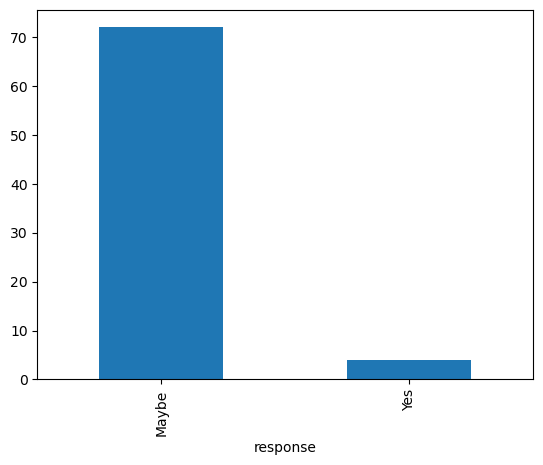

In [ ]:
df_br["response"].value_counts().plot(kind='bar')

In [ ]:
is_there_a_good_market(df_br)

Percentage of 'Yes' responses: 5.26%
Percentage of 'No' responses: 0.00%
Percentage of 'Maybe' responses: 94.74%
Percentage of 'N/A' responses: 0.00%
VERDICT: There is not a good market for bottled gazpacho.


False

In [ ]:
control.end()